In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Versión notebook

In [2]:
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance
from astropy.cosmology import WMAP7

In [3]:
'''!pip install ipyaladin'''
import ipyaladin as ipyal 

In [4]:

from astroquery.ned import Ned
from astroquery.irsa_dust import IrsaDust

C:\Users\elcar\AppData\Local\Temp\ipykernel_14320\3884534221.py:1: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  from astroquery.ned import Ned
C:\Users\elcar\AppData\Local\Temp\ipykernel_14320\3884534221.py:2: DeprecationWarning: the ``irsa_dust`` module has been moved to astroquery.ipac.irsa.irsa_dust, please update your imports.
  from astroquery.irsa_dust import IrsaDust


In [5]:
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets

In [6]:

import psycopg2

In [7]:
import requests

In [8]:
from alerce.core import Alerce
client = Alerce()

In [9]:
# color blind friendly green and red 
colors = {1: '#56E03A', 2: '#D42F4B'} 

Primero, nos conectamos a la base de datos

In [10]:
url = "https://raw.githubusercontent.com/alercebroker/usecases/master/alercereaduser_v4.json"
params = requests.get(url).json()['params']

In [11]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

Hacemos la query obteniendo los siguientes datos de la tabla object

In [12]:
query='''
SELECT
    object.oid, object.meanra, object.meandec, object.ndet,
    object.firstMJD, object.deltajd, object.g_r_max,
    probability.classifier_name, probability.class_name,
    probability.ranking, probability.probability
FROM
    object INNER JOIN probability
    ON object.oid=probability.oid
WHERE
    probability.classifier_name='lc_classifier' 
    AND object.oid IN 
(
SELECT
    oid
FROM
    probability
WHERE
    classifier_name='lc_classifier'
    AND class_name IN ('SNIa', 'SNIbc', 'SNII', 'SLSN')
    AND ranking=1
    AND probability > 0.5
)
'''

SNe = pd.read_sql_query(query, conn)
print(SNe.shape)
SNe.set_index('oid', inplace=True)
SNe.head()

c:\Users\elcar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(43575, 11)


meanra   meandec  ndet      firstmjd    deltajd   g_r_max  \
oid                                                                           
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   

             classifier_name class_name  ranking  probability  
oid                                                            
ZTF22abkzwso   lc_classifier        AGN       15     0.000140  
ZTF22abkzwso   lc_classifier     Blazar       11     0.000952  
ZTF22abkzwso   lc_classifier        CEP        7     0.003880  
ZTF22abkzwso   lc_classifier    CV/Nova        5     0.011592  
ZTF22abkzwso   lc_classifier       DSCT        8     0.002600

In [13]:
SNe.loc[SNe.iloc[[0]].index]

meanra   meandec  ndet      firstmjd    deltajd   g_r_max  \
oid                                                                           
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   
ZTF22abkzwso  111.539685  6.642854    17  59853.495671  35.948252 -0.177183   

             classifier_name      class_name  ranking  probability  
oid                                                                 
ZTF22abkzwso   lc_classifier             AGN       15     0.000140  
ZTF22abkzwso   lc_classifier          Blazar       11     0.000952  
ZTF22abkzwso   lc_classifier             CEP        7     0.003880  
ZTF22abkzwso   lc_classifier         CV/Nova        5     0.011592  
ZTF22abkzwso   lc_classifier            DSCT        8     0.002600  
ZTF22abkzwso   lc_classifier               E       10     0.002240  
ZTF22abkzwso   lc_classifier             LPV       13     0.000480  
ZTF22abkzwso   lc_classifier  Periodic-Other        9     0.002360  
ZTF22abkzwso   lc_classifier             QSO       14     0.000476  
ZTF22abkzwso   lc_classifier             RRL        6     0.008440  
ZTF22abkzwso   lc_classifier            SLSN        2     0.179676  
ZTF22abkzwso   lc_classifier            SNIa        1     0.508116  
ZTF22abkzwso   lc_classifier           SNIbc        3     0.154560  
ZTF22abkzwso   lc_classifier            SNII        4     0.123648  
ZTF22abkzwso   lc_classifier             YSO       12     0.000840

In [14]:
SNe_p = SNe.pivot(columns="class_name")#, values=['probability', 'ranking'])
SNe_p.head()

meanra                                                  \
class_name           AGN      Blazar         CEP     CV/Nova        DSCT   
oid                                                                        
ZTF17aadcbei   97.807231   97.807231   97.807231   97.807231   97.807231   
ZTF18aadaexi  125.241561  125.241561  125.241561  125.241561  125.241561   
ZTF18aadlaxo  120.648992  120.648992  120.648992  120.648992  120.648992   
ZTF18aadvwyz   89.043010   89.043010   89.043010   89.043010   89.043010   
ZTF18aadzfso  106.823654  106.823654  106.823654  106.823654  106.823654   

                                                                             \
class_name             E         LPV Periodic-Other         QSO         RRL   
oid                                                                           
ZTF17aadcbei   97.807231   97.807231      97.807231   97.807231   97.807231   
ZTF18aadaexi  125.241561  125.241561     125.241561  125.241561  125.241561   
ZTF18aadlaxo  120.648992  120.648992     120.648992  120.648992  120.648992   
ZTF18aadvwyz   89.043010   89.043010      89.043010   89.043010   89.043010   
ZTF18aadzfso  106.823654  106.823654     106.823654  106.823654  106.823654   

              ... probability                                               \
class_name    ...           E       LPV Periodic-Other       QSO       RRL   
oid           ...                                                            
ZTF17aadcbei  ...    0.001960  0.000600       0.001280  0.000264  0.008760   
ZTF18aadaexi  ...    0.000280  0.000040       0.000180  0.000000  0.001012   
ZTF18aadlaxo  ...    0.001472  0.000544       0.010016  0.000072  0.000736   
ZTF18aadvwyz  ...    0.000752  0.000160       0.001456  0.001176  0.000704   
ZTF18aadzfso  ...    0.000000  0.000000       0.000000  0.000096  0.000000   

                                                                
class_name        SLSN      SNII      SNIa     SNIbc       YSO  
oid                                                             
ZTF17aadcbei  0.042152  0.086220  0.538396  0.291232  0.000880  
ZTF18aadaexi  0.063872  0.095808  0.504988  0.333332  0.000000  
ZTF18aadlaxo  0.056840  0.070560  0.558600  0.294000  0.000456  
ZTF18aadvwyz  0.076752  0.086592  0.580560  0.240096  0.002568  
ZTF18aadzfso  0.063744  0.119520  0.527880  0.284856  0.000312  

[5 rows x 135 columns]

Ahora buscaremos desde la tabla magstat los datos que necesitamos

In [15]:
mask = (SNe_p.ranking.SNIa == 1)

query='''
SELECT
    *
FROM
    magstat
WHERE
    oid in (%s)
''' % ",".join(["'%s'" % oid for oid in SNe_p.loc[mask].index])
all_detections = pd.read_sql_query(query, conn)

print(all_detections.shape)
all_detections.head()

c:\Users\elcar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(3848, 28)


oid  fid  stellar  corrected  ndet  ndubious  dmdt_first  \
0  ZTF17aadcbei    1    False      False    22         0   -0.619748   
1  ZTF17aadcbei    2    False      False    24         0   -1.444878   
2  ZTF18aadaexi    1    False      False     7         4   -0.295468   
3  ZTF18aadaexi    2    False       True     4         0   -0.227054   
4  ZTF18aadlaxo    1    False       True    11         0   -0.008033   

   dm_first  sigmadm_first   dt_first  ...  magmedian_corr  magmax_corr  \
0 -1.954744     -20.262540   3.038148  ...             NaN          NaN   
1 -1.520000     -19.937320   0.964525  ...             NaN          NaN   
2 -0.737956     -20.261162   1.854745  ...       17.626450    17.835085   
3 -1.533942     -20.330927   6.023113  ...       17.993822    18.134071   
4 -0.473600     -20.291176  23.836205  ...       17.162638    17.406130   

   magmin_corr  magsigma_corr  maglast_corr  magfirst_corr   firstmjd  \
0          NaN            NaN           NaN            NaN  58437.440   
1          NaN            NaN           NaN            NaN  58435.332   
2    17.561138       0.119450     17.835085            NaN  59267.246   
3    16.862253       0.594258     18.043768      18.134071  59271.258   
4    17.039974       0.132546     17.339497      17.406130  59251.266   

     lastmjd      step_id_corr  saturation_rate  
0  59940.280             1.1.6              NaN  
1  59940.320             1.1.6              NaN  
2  59293.156  correction_0.0.1              0.0  
3  59281.223  correction_0.0.1              0.0  
4  59276.215  correction_0.0.1              0.0  

[5 rows x 28 columns]

In [16]:
#Usaremos solo un filtro (realmente podemos hacer todo lo que viene acá cambiando el filtro del 1 al 2)
all_detections=all_detections[all_detections['fid']==1]

In [17]:
#Tenemos la tabla magstat con todas las supernovas SNe Ia , ahora debemos graficar la cantidad de supernova por detecciones.

Text(0, 0.5, 'Number of SNe Ia')

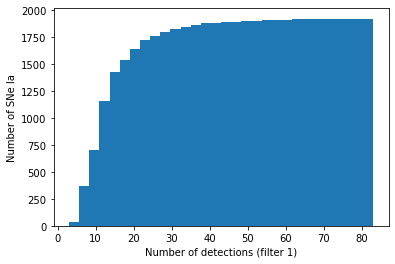

In [18]:
fig,ax=plt.subplots()
ax.hist(all_detections.ndet,bins=30,cumulative=True)
ax.set_xlabel('Number of detections (filter 1)')
ax.set_ylabel('Number of SNe Ia')

Aquí debemos elegir cual será nuestro threshold para la cantidad mínima de detecciones.

Ahora debemos extraer la diferencia entre la magnitud inicial y la magnitud mínima (mas brillante -> menos magnitud). Esto para lograr una buena muestra. Buscamos supernovas que tengan una diferencia sustancial.

In [19]:
all_detections.insert(2,'delta_mag',np.abs(all_detections.magfirst-all_detections.magmin),True)
all_detections

oid  fid  delta_mag  stellar  corrected  ndet  ndubious  \
0     ZTF17aadcbei    1   0.000000    False      False    22         0   
2     ZTF18aadaexi    1   1.008817    False      False     7         4   
4     ZTF18aadlaxo    1   1.907360    False       True    11         0   
6     ZTF18aadvwyz    1   1.361967    False       True     9         0   
8     ZTF18aadzfso    1   1.371363    False       True    12         0   
...            ...  ...        ...      ...        ...   ...       ...   
3838  ZTF22abyjewt    1   1.120203    False      False     9         0   
3840  ZTF22abyjfgt    1   1.104580    False      False     6         0   
3842  ZTF22abyjttn    1   1.223840    False      False     7         0   
3844  ZTF22abynjjf    1   1.154182    False      False     6         0   
3846  ZTF22abyrqec    1   0.613472    False       True     6         0   

      dmdt_first  dm_first  sigmadm_first  ...  magmedian_corr  magmax_corr  \
0      -0.619748 -1.954744     -20.262540  ...             NaN          NaN   
2      -0.295468 -0.737956     -20.261162  ...       17.626450    17.835085   
4      -0.008033 -0.473600     -20.291176  ...       17.162638    17.406130   
6      -0.035487 -0.380445     -20.629192  ...       18.320470    18.509783   
8      -0.053835 -0.804001     -20.495455  ...       17.720926    17.840158   
...          ...       ...            ...  ...             ...          ...   
3838   -0.181239 -1.745117     -20.287449  ...             NaN          NaN   
3840   -0.246087 -3.258387     -20.557474  ...             NaN          NaN   
3842   -0.190732 -2.541460     -20.645521  ...             NaN          NaN   
3844   -0.064388 -1.009480     -20.536945  ...             NaN          NaN   
3846   -0.201571 -1.093196     -19.819000  ...       18.397444    19.263186   

      magmin_corr  magsigma_corr  maglast_corr  magfirst_corr   firstmjd  \
0             NaN            NaN           NaN            NaN  58437.440   
2       17.561138       0.119450     17.835085            NaN  59267.246   
4       17.039974       0.132546     17.339497      17.406130  59251.266   
6       18.118813            NaN     18.464983      18.509783  59171.410   
8       17.475610            NaN     17.816620      17.840158  58876.188   
...           ...            ...           ...            ...        ...   
3838          NaN            NaN           NaN            NaN  59922.293   
3840          NaN            NaN           NaN            NaN  59923.414   
3842          NaN            NaN           NaN            NaN  59922.434   
3844          NaN            NaN           NaN            NaN  59923.406   
3846    18.078104       0.460625     19.263186      18.606394  59928.200   

        lastmjd        step_id_corr  saturation_rate  
0     59940.280               1.1.6              NaN  
2     59293.156    correction_0.0.1              0.0  
4     59276.215    correction_0.0.1              0.0  
6     59196.402  bulk_version_0.0.1              0.0  
8     58909.184  bulk_version_0.0.1              0.0  
...         ...                 ...              ...  
3838  59956.254               1.1.6              NaN  
3840  59958.305               1.1.6              NaN  
3842  59957.406               1.1.6              NaN  
3844  59951.380               1.1.6              NaN  
3846  59958.270               1.1.6              0.0  

[1923 rows x 29 columns]

Ahora veamos la distribución de la diferencia entre las magnitudes

Text(0, 0.5, 'Number of SNe Ia')

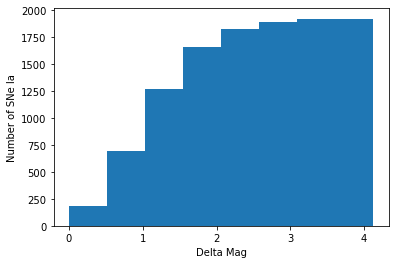

In [20]:
fig,ax=plt.subplots()
ax.hist(all_detections.delta_mag,bins=8,cumulative=True)
ax.set_xlabel('Delta Mag')
ax.set_ylabel('Number of SNe Ia')

Este gráfico nos muestra la cantidad de supernovas que se ubican en cada rango de delta_mag. Vemos que el máximo se encuentra entre las 0.5 y 1.5 magnitudes. Ahora hay que ver cuales supernovas tienen un número de detecciones decente y además que tienen una diferencia de magnitudes inicial decente.

In [21]:
#Comencemos filtrando a las supernovas con un delta mag muy chico. 
all_detections=all_detections[all_detections['delta_mag']>2.]

all_detections

oid  fid  delta_mag  stellar  corrected  ndet  ndubious  \
14    ZTF18aahsuyl    1   2.003700    False       True    28         0   
30    ZTF18aatjfoe    1   2.070253    False      False    19        15   
36    ZTF18aawmeiw    1   2.667930    False       True    29         0   
44    ZTF18aayivxm    1   2.003909    False       True     8         0   
46    ZTF18aayjyub    1   3.258325    False      False    24         0   
...            ...  ...        ...      ...        ...   ...       ...   
3773  ZTF22abrboyl    1   2.046088    False      False     7         0   
3775  ZTF22abscvex    1   3.031093    False       True    25         1   
3802  ZTF22abuqitl    1   2.302075    False       True     8         0   
3818  ZTF22abvkkgu    1   3.116843    False      False     8         0   
3824  ZTF22abvrtgj    1   2.024570    False      False     7         0   

      dmdt_first  dm_first  sigmadm_first  ...  magmedian_corr  magmax_corr  \
14      0.007575  0.019700     -20.554031  ...       18.665546    19.245169   
30     -0.073748 -0.493600     -20.618849  ...       18.023504    18.681046   
36     -0.130275 -0.503200     -20.202526  ...       17.309189    18.505580   
44      0.030380 -0.089060     -20.476273  ...       18.703924    19.778204   
46     -0.034590 -0.311140     -20.515167  ...             NaN          NaN   
...          ...       ...            ...  ...             ...          ...   
3773   -0.055806 -0.304000     -20.424862  ...             NaN          NaN   
3775    0.011845  0.060300     -20.100124  ...       17.560846    19.322214   
3802    0.000891 -0.195303     -20.200650  ...       18.511053    20.040268   
3818   -0.005165 -0.361682     -20.364470  ...             NaN          NaN   
3824    0.005987 -0.106000     -19.969810  ...             NaN          NaN   

      magmin_corr  magsigma_corr  maglast_corr  magfirst_corr   firstmjd  \
14      18.329810       0.283355     19.180730      19.245169  59317.240   
30      17.778734       0.296610     18.681046            NaN  59311.370   
36      16.693333       0.483862     17.404608      17.472631  59849.195   
44      18.416529            NaN     18.857119      19.778204  58276.223   
46            NaN            NaN           NaN            NaN  58276.260   
...           ...            ...           ...            ...        ...   
3773          NaN            NaN           NaN            NaN  59880.395   
3775    17.266956       0.743672     19.114456      19.322214  59880.230   
3802    17.894201       0.712450     19.018099      20.040268  59901.297   
3818          NaN            NaN           NaN            NaN  59903.370   
3824          NaN            NaN           NaN            NaN  59904.380   

        lastmjd        step_id_corr  saturation_rate  
14    59348.258    correction_0.0.1              0.0  
30    59362.220    correction_0.0.1              0.0  
36    59898.110               1.1.6              0.0  
44    58304.200  bulk_version_0.0.1              0.0  
46    58348.160  bulk_version_0.0.1              NaN  
...         ...                 ...              ...  
3773  59910.434               1.1.6              NaN  
3775  59934.164               1.1.6              0.0  
3802  59933.305               1.1.6              0.0  
3818  59937.445               1.1.6              NaN  
3824  59934.254               1.1.6              NaN  

[302 rows x 29 columns]

Tenemos 114 supernovas las cuales cumplen el requisito de la delta_mag.
Ahora debemos de ver cuantas detecciones tiene cada supernova entre la primera detección y la detección en la que se consiguió la magnitud mínima (mayor brillo)

In [22]:
SN_det = client.query_detections('ZTF18aawmeiw', format='pandas')
SN_det = SN_det.sort_values("mjd")
SN_det=SN_det[SN_det['fid']==1]
magmin=all_detections[all_detections['oid']=='ZTF18aawmeiw']['magmin'].values[0]
print(magmin)
SN_det

17.26957


tid           mjd               candid  fid            pid  diffmaglim  \
0   ztf  59849.195810  2095195815115015009    1  2095195815115   20.427500   
1   ztf  59849.197257  2095197256215015014    1  2095197256215   20.454400   
3   ztf  59851.195104  2097195106215015018    1  2097195106215   20.427315   
4   ztf  59853.157361  2099157366215015017    1  2099157366215   20.614042   
5   ztf  59853.160231  2099160235115015011    1  2099160235115   20.708725   
10  ztf  59855.227026  2101227026215015008    1  2101227026215   20.154500   
13  ztf  59857.239514  2103239515115015009    1  2103239515115   19.697178   
14  ztf  59857.260336  2103260336215015004    1  2103260336215   19.653425   
15  ztf  59859.183484  2105183485115015011    1  2105183485115   19.700754   
16  ztf  59859.184433  2105184436215015019    1  2105184436215   19.657703   
19  ztf  59861.187222  2107187225115015006    1  2107187225115   19.356115   
20  ztf  59862.182373  2108182376215015005    1  2108182376215   19.383030   
21  ztf  59864.134954  2110134956215015016    1  2110134956215   20.028023   
22  ztf  59865.198542  2111198545115015007    1  2111198545115   19.847076   
23  ztf  59866.217407  2112217406215015010    1  2112217406215   19.700250   
25  ztf  59870.123171  2116123176215015016    1  2116123176215   20.505386   
26  ztf  59870.124109  2116124105115015008    1  2116124105115   20.537886   
33  ztf  59874.178935  2120178935115015017    1  2120178935115   20.539892   
34  ztf  59874.179873  2120179876215015012    1  2120179876215   20.420680   
36  ztf  59877.220961  2123220966215015013    1  2123220966215   19.676350   
38  ztf  59878.185926  2124185925115015015    1  2124185925115   20.322395   
40  ztf  59879.204826  2125204826215015015    1  2125204826215   19.907192   
41  ztf  59881.120127  2127120126215015015    1  2127120126215   20.295938   
45  ztf  59887.152697  2133152695115015008    1  2133152695115   19.605318   
46  ztf  59887.207245  2133207246215015032    1  2133207246215   19.171762   
47  ztf  59889.124410  2135124406215015009    1  2135124406215   19.405502   
48  ztf  59889.124896  2135124895115015003    1  2135124895115   19.404879   
54  ztf  59896.153090  2142153096215015012    1  2142153096215   19.475285   
55  ztf  59898.111319  2144111316215015011    1  2144111316215   20.241835   

    isdiffpos   nid    distnr     magpsf  ...  magapbig  sigmagapbig  \
0           1  2095  1.230450  19.937500  ...   19.9449       0.3418   
1           1  2095  1.227900  19.833100  ...   20.1892       0.4165   
3           1  2097  1.300109  18.975140  ...   18.8032       0.1183   
4           1  2099  1.257382  18.361544  ...   18.3337       0.0695   
5           1  2099  1.306177  18.396847  ...   18.3249       0.0632   
10          1  2101  1.250370  17.932800  ...   17.9171       0.0699   
13          1  2103  1.260720  17.625620  ...   17.7934       0.0917   
14          1  2103  1.245659  17.630133  ...   17.4573       0.0677   
15          1  2105  1.242802  17.483961  ...   17.3314       0.0612   
16          1  2105  1.270582  17.492167  ...   17.4751       0.0706   
19          1  2107  1.252022  17.423260  ...   17.2337       0.0720   
20          1  2108  1.276687  17.269570  ...   17.2653       0.0746   
21          1  2110  1.257274  17.286234  ...   17.2551       0.0421   
22          1  2111  1.279296  17.317940  ...   17.2270       0.0456   
23          1  2112  1.241450  17.310951  ...   17.2706       0.0504   
25          1  2116  1.210843  17.425266  ...   17.4004       0.0328   
26          1  2116  1.314574  17.411192  ...   17.4269       0.0322   
33          1  2120  1.263104  17.577627  ...   17.5507       0.0354   
34          1  2120  1.231017  17.593740  ...   17.5741       0.0397   
36          1  2123  1.211796  17.826323  ...   17.9168       0.0745   
38          1  2124  1.221692  17.929060  ...   17.9511       0.0593   
40          1  2125  1.286231  17.928673  ...   18.0640       0.0760   
41     

In [23]:
magmin=all_detections[all_detections['oid']=='ZTF18aawmeiw']['magmin']


Tenemos la tabla de detecciones para esta supernova. Debemos comparar la magnitud mínima e intentar compararla con las detecciones que tenemos. Por ejemplo, la magnitud mínima de esta supernova es de 17.26957 (ver tabla de all_detections) por lo tanto, hubieron 12 detecciones entre la primera y la actual (en el filtro 1).

In [24]:
#Primero, creemos un array de python con todas las supernovas.
oids=all_detections['oid']
oids.to_numpy()
oids.shape
ndets_bmin=[] #Number of detections before minimum
dts=[]
mjdfirsts=[]
mjdmins=[]
for oid in oids:
    print('Searching for detections of the SNe', oid)
    SN_det=client.query_detections(oid,format='pandas')#Obtenemos las detecciones de esa supernova.
    SN_det=SN_det[SN_det['fid']==1] #Filtramos 
    magmin=all_detections[all_detections['oid']==oid]['magmin'].values[0] #Obtenemos la magnitud mínima. Ahora debemos buscarla en las detecciones.)
    print('The minimum magnitude is', magmin)
    SN_det.reset_index() #Reseteamos indices.
    index=SN_det.index[SN_det['magpsf']==magmin].values[0]  #Recuperamos el índice (notar que como reseteamos, es como haber contado)
    print('Founded detection in the ' , index, ' detection')
    ndets_bmin.append(index) #Guardamos el índice
    #Para conseguir el dt debemos ver la fecha de la primera detección y la fecha de la detección en la minima
    mjdfirst=all_detections[all_detections['oid']==oid]['firstmjd'].values[0] #fecha de la primera detección
    mjdmin=SN_det[SN_det['magpsf']==magmin]['mjd'].values[0] #fecha de la detección mínima
    mjdmins.append(mjdmin)
    mjdfirsts.append(mjdfirst)
    print('First detection date:' , mjdfirst , '|| Date of the minimum: ' , mjdmin)
    dt=mjdmin-mjdfirst
    dts.append(dt)
    print('La diferencia de tiempo entre la primera detección y la mínima es' ,dt)
    #Crearemos un array de numpy para poder guardar las fechas para usarlas después en ZTF forced photometry
    print('=====================================================================================================================')
ndets_bmin=np.array(ndets_bmin)
dts=np.array(dts)
mjdfirsts=np.array(mjdfirsts)
mjdmins=np.array(mjdmins)

Searching for detections of the SNe ZTF18aahsuyl
The minimum magnitude is 18.7542
Founded detection in the  20  detection
First detection date: 59317.24 || Date of the minimum:  59329.317569400184
La diferencia de tiempo entre la primera detección y la mínima es 12.077569400185894
Searching for detections of the SNe ZTF18aatjfoe
The minimum magnitude is 18.250547
Founded detection in the  13  detection
First detection date: 59311.37 || Date of the minimum:  59325.37288190005
La diferencia de tiempo entre la primera detección y la mínima es 14.002881900050852
Searching for detections of the SNe ZTF18aawmeiw
The minimum magnitude is 17.26957
Founded detection in the  20  detection
First detection date: 59849.195 || Date of the minimum:  59862.18237269996
La diferencia de tiempo entre la primera detección y la mínima es 12.987372699957632
Searching for detections of the SNe ZTF18aayivxm
The minimum magnitude is 18.594631
Founded detection in the  7  detection
First detection date: 58276.2

In [25]:
all_detections.insert(2,'dt',dts)

Haremos un histograma para ver la distribución de las detecciones

Text(0, 0.5, 'Numero de curvas')

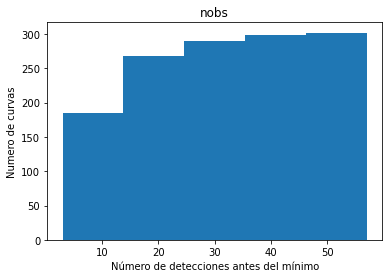

In [26]:
fig,ax=plt.subplots()
ax.hist(ndets_bmin,bins=5,cumulative=True)
ax.set_title('nobs')
ax.set_xlabel('Número de detecciones antes del mínimo')
ax.set_ylabel('Numero de curvas')

Text(0, 0.5, 'Numero de curvas')

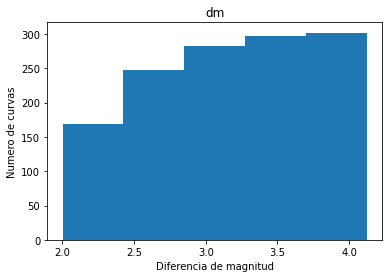

In [27]:
dms=all_detections['delta_mag']
fig,ax=plt.subplots()
ax.hist(dms,bins=5,cumulative=True)
ax.set_title('dm')
ax.set_xlabel('Diferencia de magnitud')
ax.set_ylabel('Numero de curvas')

(0.0, 30.0)

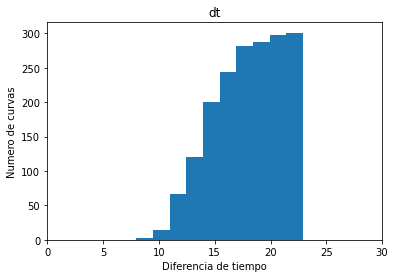

In [28]:
dts=all_detections[all_detections['dt']<=30]['dt']
fig,ax=plt.subplots()
ax.hist(dts,bins=10,cumulative=True)
ax.set_title('dt')
ax.set_xlabel('Diferencia de tiempo')
ax.set_ylabel('Numero de curvas')
ax.set_xlim(0,30)

Ahora tenemos todo lo que necesitamos. Debemos escoger algunos thresholds para comenzar a filtrar a las supernovas que nos interesan

Ahora hay que ver como filtramos , pero por ejemplo, aquí hay un filtro propuesto.


In [29]:
n_min=15
dt_min=10
dm_min=2. #Ya habíamos filtrado las magnitudes.
#Con ello conseguiremos una lista de oids de supernova para poder pedir a ZTF

In [30]:

all_detections.insert(4,'nobs',ndets_bmin)
all_detections.insert(5,'mjdfirsts',mjdfirsts)
all_detections.insert(6,'mjdmins',mjdmins)


In [31]:
#Ahora debemos elegir a las supernovas
filtered_SNe=all_detections.loc[(all_detections['nobs']>=n_min) & (all_detections['dt']>= dt_min)]
filtered_SNe

oid  fid         dt  delta_mag  nobs  mjdfirsts       mjdmins  \
14    ZTF18aahsuyl    1  12.077569   2.003700    20  59317.240  59329.317569   
36    ZTF18aawmeiw    1  12.987373   2.667930    20  59849.195  59862.182373   
46    ZTF18aayjyub    1  17.945938   3.258325    17  58276.260  58294.205938   
100   ZTF18abkhcwl    1  16.002685   3.506355    15  58327.170  58343.172685   
170   ZTF18acnbeuu    1  17.989528   2.215878    17  58432.477  58450.466528   
...            ...  ...        ...        ...   ...        ...           ...   
3633  ZTF22abjagqj    1  16.952373   2.238686    18  59850.480  59867.432373   
3635  ZTF22abjeeqt    1  13.954616   2.101520    16  59851.258  59865.212616   
3641  ZTF22abjpcjy    1  15.978345   2.934172    20  59850.465  59866.443345   
3653  ZTF22abkjegi    1  12.050861   2.230970    19  59852.344  59864.394861   
3775  ZTF22abscvex    1  15.045313   3.031093    16  59880.230  59895.275313   

      stellar  corrected  ndet  ...  magmedian_corr  magmax_corr  magmin_corr  \
14      False       True    28  ...       18.665546    19.245169    18.329810   
36      False       True    29  ...       17.309189    18.505580    16.693333   
46      False      False    24  ...             NaN          NaN          NaN   
100     False      False    21  ...             NaN          NaN          NaN   
170     False      False    14  ...             NaN          NaN          NaN   
...       ...        ...   ...  ...             ...          ...          ...   
3633    False      False    25  ...             NaN          NaN          NaN   
3635    False       True    23  ...       19.026070    19.877686    18.225985   
3641    False      False    26  ...             NaN          NaN          NaN   
3653    False      False    25  ...       18.749748    19.342447    18.276516   
3775    False       True    25  ...       17.560846    19.322214    17.266956   

      magsigma_corr  maglast_corr  magfirst_corr   firstmjd    lastmjd  \
14         0.283355     19.180730      19.245169  59317.240  59348.258   
36         0.483862     17.404608      17.472631  59849.195  59898.110   
46              NaN           NaN            NaN  58276.260  58348.160   
100             NaN           NaN            NaN  58327.170  58386.117   
170             NaN           NaN            NaN  58432.477  58468.434   
...             ...           ...            ...        ...        ...   
3633            NaN           NaN            NaN  59850.480  59940.266   
3635       0.545171           NaN      19.877686  59851.258  59883.227   
3641            NaN           NaN            NaN  59850.465  59908.293   
3653       0.349310     19.293896            NaN  59852.344  59882.223   
3775       0.743672     19.114456      19.322214  59880.230  59934.164   

            step_id_corr  saturation_rate  
14      correction_0.0.1              0.0  
36                 1.1.6              0.0  
46    bulk_version_0.0.1              NaN  
100   bulk_version_0.0.1              NaN  
170   bulk_version_0.0.1              NaN  
...                  ...              ...  
3633               1.1.6              NaN  
3635               1.1.6              0.0  
3641               1.1.6              NaN  
3653               1.1.6              0.0  
3775               1.1.6              0.0  

[102 rows x 33 columns]

Ahora tenemos las supernovas que cumplen estos requisitos

In [32]:
oids=filtered_SNe['oid']
oids.to_numpy()
#Tenemos un arreglo de oids que podemos buscar en ZTF

array(['ZTF18aahsuyl', 'ZTF18aawmeiw', 'ZTF18aayjyub', 'ZTF18abkhcwl',
       'ZTF18acnbeuu', 'ZTF19abaosan', 'ZTF19abitbcj', 'ZTF19abjibet',
       'ZTF19abmylxw', 'ZTF19abopflp', 'ZTF19abowcic', 'ZTF19abwaohs',
       'ZTF19acbpzir', 'ZTF19aclofmz', 'ZTF19acnjwgm', 'ZTF19acnkeji',
       'ZTF19acrdqej', 'ZTF20aaavvlv', 'ZTF20aaevbvv', 'ZTF20aahfobk',
       'ZTF20aahkgcz', 'ZTF20aajcbhr', 'ZTF20aakrgsq', 'ZTF20aaomtwl',
       'ZTF20aavrloz', 'ZTF20aavzlxm', 'ZTF20aawoojh', 'ZTF20aaxmfue',
       'ZTF20aaxndzx', 'ZTF20abarsvz', 'ZTF20abatmsa', 'ZTF20abbhyxu',
       'ZTF20abbozif', 'ZTF20abccojn', 'ZTF20abdtiti', 'ZTF20abeljuj',
       'ZTF20abewogd', 'ZTF20abgpksj', 'ZTF20abkacis', 'ZTF20abmzfql',
       'ZTF20abnwldu', 'ZTF20aboquuv', 'ZTF20abpglei', 'ZTF20abpvolc',
       'ZTF20abthxfr', 'ZTF20abtnpwt', 'ZTF20abucvpo', 'ZTF20abupbub',
       'ZTF20abvtldf', 'ZTF20abvtozi', 'ZTF20abwavab', 'ZTF20abwcnhm',
       'ZTF20abxfiev', 'ZTF20acauthg', 'ZTF20acbovrt', 'ZTF20acbttnt',
      

In [33]:
query='''
SELECT
    oid, candid, mjd, fid, magpsf, sigmapsf
FROM
    detection
WHERE
    oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
all_detections_selected = pd.read_sql_query(query, conn)
all_detections_selected.set_index(['candid'], inplace=True)
print(all_detections_selected.shape)
all_detections_selected.head()

c:\Users\elcar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(7460, 5)


oid           mjd  fid     magpsf  sigmapsf
candid                                                                   
1563239460315015012  ZTF18aahsuyl  59317.239468    1  20.757900  0.184169
1563239460315025012  ZTF18aahsuyl  59317.239468    1  20.757900  0.184169
1563239941415015014  ZTF18aahsuyl  59317.239942    1  20.500662  0.214339
1563239941415025014  ZTF18aahsuyl  59317.239942    1  20.500700  0.214339
1567255720315015005  ZTF18aahsuyl  59321.255729    1  19.611319  0.114977

Text(0.5, 1.0, 'Curvas de luz de las supernovas seleccionadas')

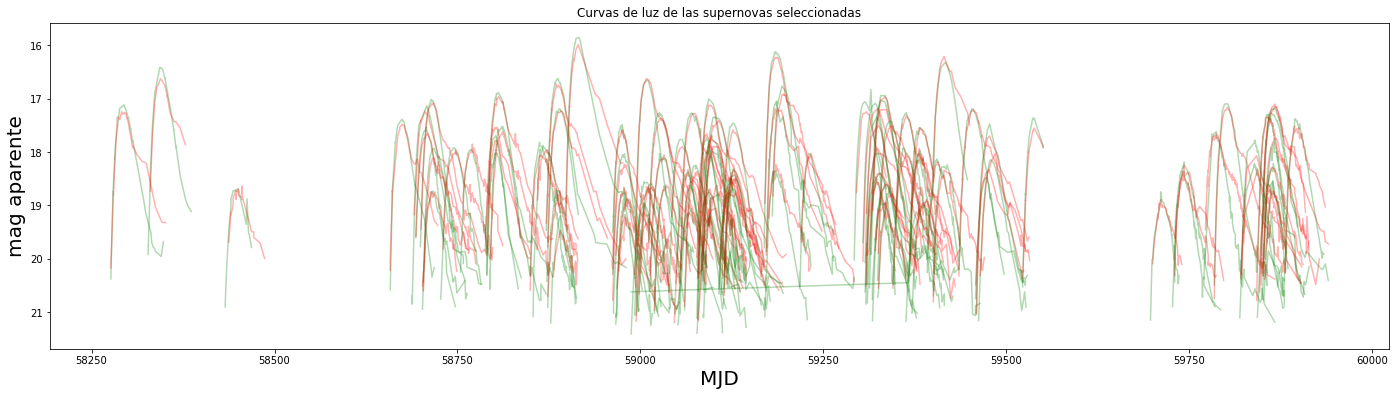

In [34]:
mask = all_detections_selected.oid.isin(SNe_p.loc[(SNe_p.probability.SNIa > 0.5)].index)
def plotobject(df):
    df.groupby(["fid"]).apply(
        lambda df: 
        ax.plot(df.mjd, df.magpsf, alpha=0.3, c='g' if df.fid.unique()==1 else 'r'))
fig, ax = plt.subplots(figsize=(24, 6))
all_detections_selected.loc[mask].groupby(["oid"]).apply(plotobject)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel("MJD", fontsize=20)
ax.set_ylabel("mag aparente", fontsize=20)
ax.set_title('Curvas de luz de las supernovas seleccionadas')

Ahora probemos con alguna curva de luz usando fotometría forzada. Para ello, podemos hacerlo por python usando el módulo requests

Desde la tabla objects podemos pedir las coordenadas de un objeto. 

In [35]:
query='''
SELECT
    oid,meanra,meandec
FROM
    object
WHERE
    oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
SNe_ZTF_coords = pd.read_sql_query(query, conn)


query='''
SELECT
    oid,firstmjd,lastmjd,fid
FROM
    magstat
WHERE
    oid in (%s)
''' % ",".join(["'%s'" % oid for oid in oids])
SNe_ZTF_dates = pd.read_sql_query(query, conn)

SNe_ZTF=pd.merge(SNe_ZTF_coords,SNe_ZTF_dates[SNe_ZTF_dates['fid']==1],on='oid',how='inner')

SNe_ZTF

c:\Users\elcar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\elcar\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


oid      meanra    meandec   firstmjd    lastmjd  fid
0    ZTF18aahsuyl  184.515466  29.943758  59317.240  59348.258    1
1    ZTF18aawmeiw  266.811183  64.263980  59849.195  59898.110    1
2    ZTF18aayjyub  200.116572  62.300819  58276.260  58348.160    1
3    ZTF18abkhcwl  236.529609  29.733477  58327.170  58386.117    1
4    ZTF18acnbeuu  142.422305  49.212517  58432.477  58468.434    1
..            ...         ...        ...        ...        ...  ...
97   ZTF22abjagqj   95.024335  49.291717  59850.480  59940.266    1
98   ZTF22abjeeqt  340.699597   4.148556  59851.258  59883.227    1
99   ZTF22abjpcjy   66.282437   0.978495  59850.465  59908.293    1
100  ZTF22abkjegi   24.454572  40.297654  59852.344  59882.223    1
101  ZTF22abscvex    7.151024 -20.535358  59880.230  59934.164    1

[102 rows x 6 columns]

Ahora tenemos todo lo necesario para poder pedir las LC's a ZTF Forced Photometry. Pidamos alguna para probar.

In [36]:
def mjd_to_jd(mjd):
  jd = mjd+2400000.5
  return str(jd)

Pedimos todos los datos a ZTF 

In [37]:
'''#Pedimos todos los datos a ZTF ##Ya corrí este código, lo comento para no pedir las mismas supernovas a ZTF otra vez.
for oid in oids:
  print('Request for ',  oid , 'in progress'  )
  meanra=SNe_ZTF[SNe_ZTF['oid']==oid].meanra.values[0]
  meandec=SNe_ZTF[SNe_ZTF['oid']==oid].meandec.values[0]
  firstmjd=SNe_ZTF[SNe_ZTF['oid']==oid].firstmjd.values[0]-30
  lastmjd=SNe_ZTF[SNe_ZTF['oid']==oid].lastmjd.values[0]
  print('Data: MeanRA :' , meanra )
  print('Data: MeanDEC :' , meandec )
  print('Data: FirstMJD :' , firstmjd )
  print('Data: LastMJD :' , lastmjd )
  r=requests.get('https://ztfweb.ipac.caltech.edu/cgi-bin/requestForcedPhotometry.cgi',
                 auth=('ztffps', 'dontgocrazy!'), params={'ra': str(meanra)
                 , 'dec': str(meandec), 'jdstart': str(mjd_to_jd(firstmjd)), 'jdend': str(mjd_to_jd(lastmjd)),
                  'email': 'sebastian.monteiro@ug.uchile.cl', 'userpass': 'brmt446'})'''


"#Pedimos todos los datos a ZTF ##Ya corrí este código, lo comento para no pedir las mismas supernovas a ZTF otra vez.\nfor oid in oids:\n  print('Request for ',  oid , 'in progress'  )\n  meanra=SNe_ZTF[SNe_ZTF['oid']==oid].meanra.values[0]\n  meandec=SNe_ZTF[SNe_ZTF['oid']==oid].meandec.values[0]\n  firstmjd=SNe_ZTF[SNe_ZTF['oid']==oid].firstmjd.values[0]-30\n  lastmjd=SNe_ZTF[SNe_ZTF['oid']==oid].lastmjd.values[0]\n  print('Data: MeanRA :' , meanra )\n  print('Data: MeanDEC :' , meandec )\n  print('Data: FirstMJD :' , firstmjd )\n  print('Data: LastMJD :' , lastmjd )\n  r=requests.get('https://ztfweb.ipac.caltech.edu/cgi-bin/requestForcedPhotometry.cgi',\n                 auth=('ztffps', 'dontgocrazy!'), params={'ra': str(meanra)\n                 , 'dec': str(meandec), 'jdstart': str(mjd_to_jd(firstmjd)), 'jdend': str(mjd_to_jd(lastmjd)),\n                  'email': 'sebastian.monteiro@ug.uchile.cl', 'userpass': 'brmt446'})"

In [38]:
'''r = requests.get('https://ztfweb.ipac.caltech.edu/cgi-bin/requestForcedPhotometry.cgi',
                 auth=('ztffps', 'dontgocrazy!'), params={'ra': '184.515466'
                 , 'dec': '29.943758', 'jdstart': str(firstmjd), 'jdend': str(lastmjd),
                  'email': 'sebastian.monteiro@ug.uchile.cl', 'userpass': 'brmt446'})'''

"r = requests.get('https://ztfweb.ipac.caltech.edu/cgi-bin/requestForcedPhotometry.cgi',\n                 auth=('ztffps', 'dontgocrazy!'), params={'ra': '184.515466'\n                 , 'dec': '29.943758', 'jdstart': str(firstmjd), 'jdend': str(lastmjd),\n                  'email': 'sebastian.monteiro@ug.uchile.cl', 'userpass': 'brmt446'})"

In [39]:
archivos=os.listdir('LCs')
len(archivos)

100

dirección: LCs/forcedphotometry_req00017007_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 1


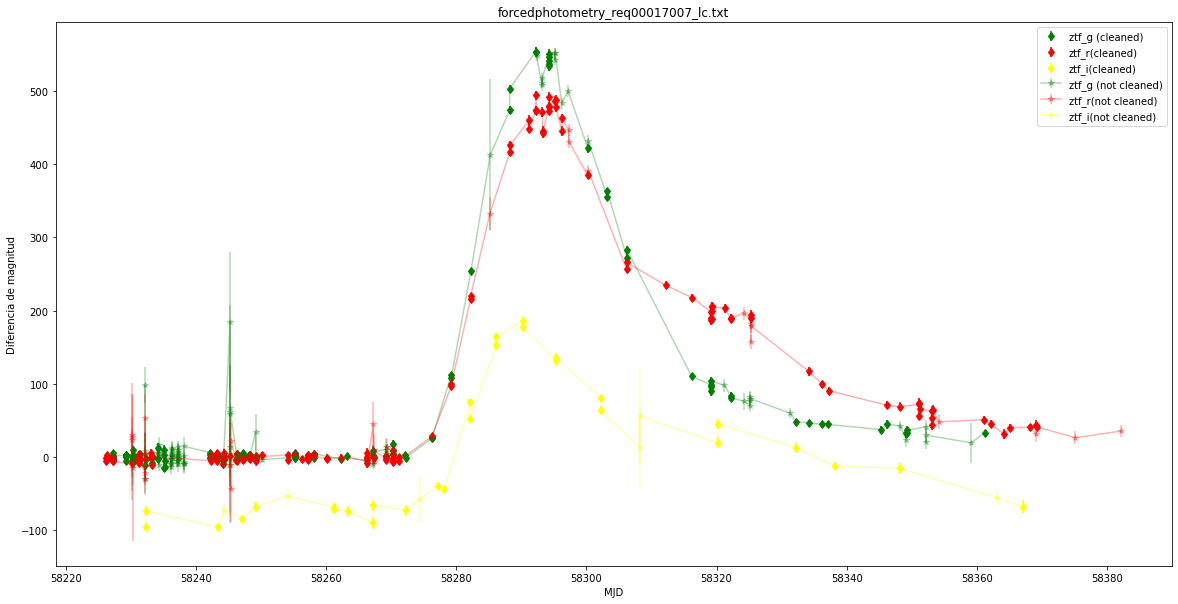

dirección: LCs/forcedphotometry_req00017047_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 2


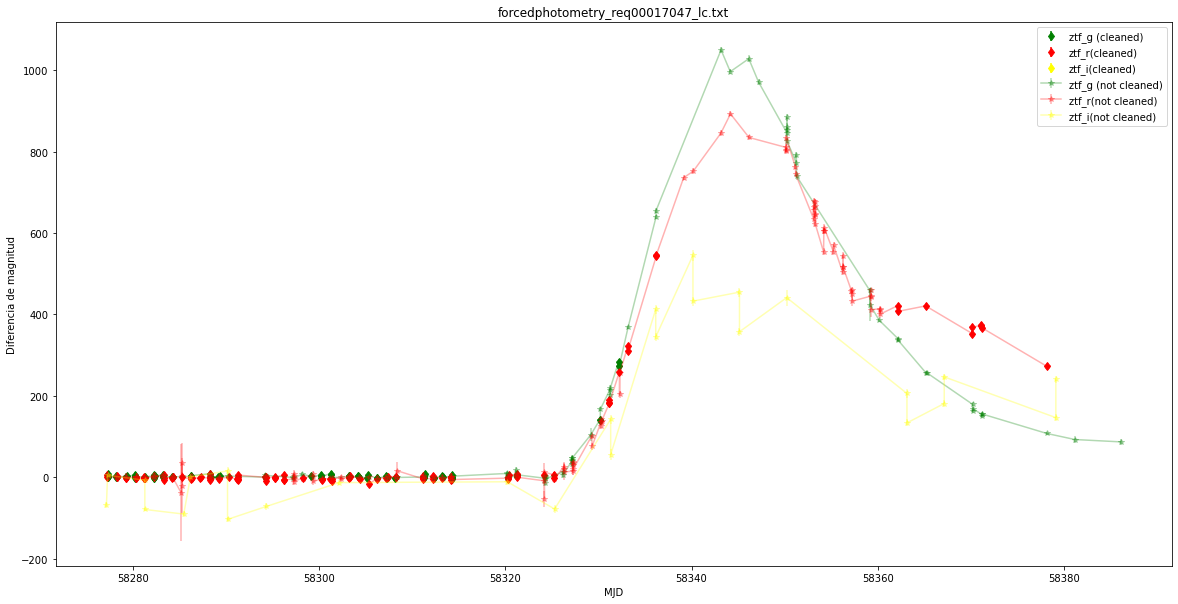

dirección: LCs/forcedphotometry_req00017936_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 3


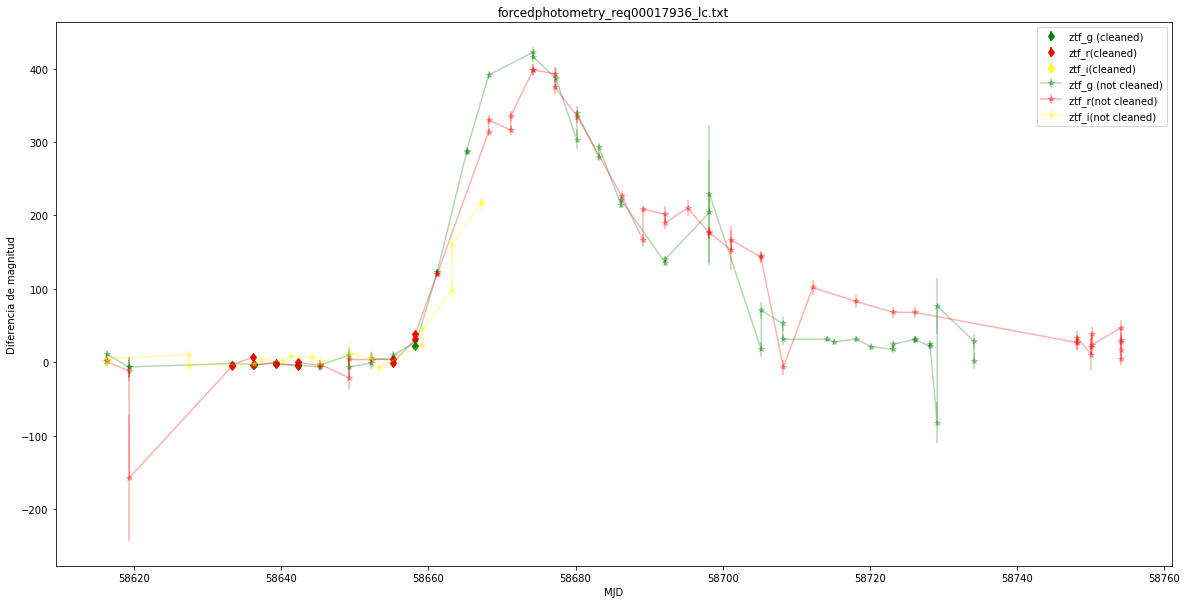

dirección: LCs/forcedphotometry_req00018146_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 4


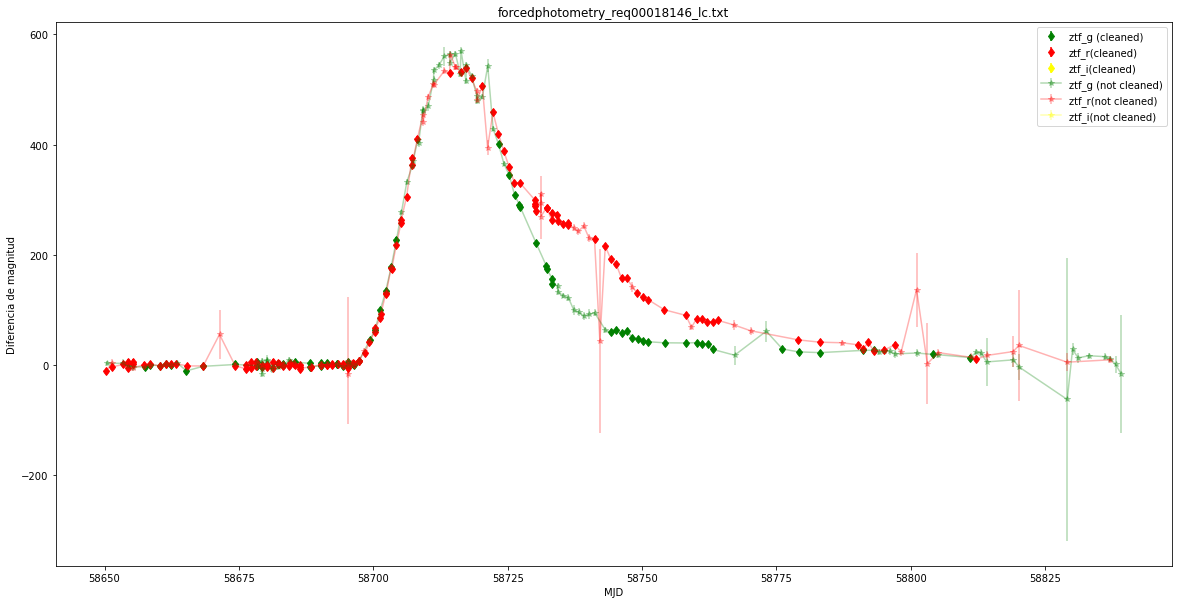

dirección: LCs/forcedphotometry_req00018147_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 5


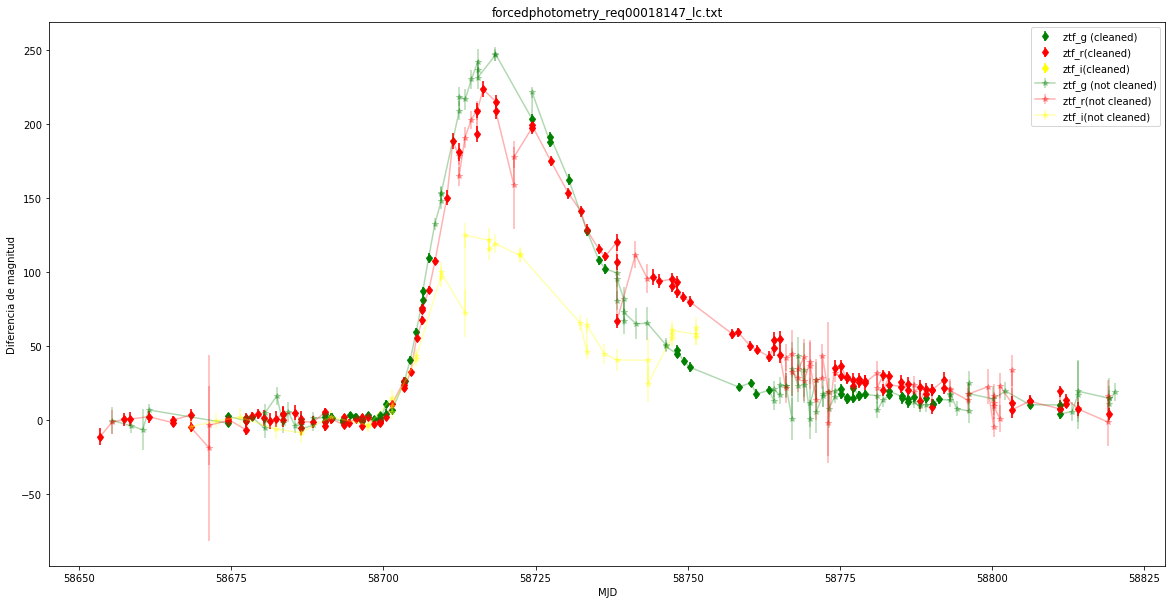

dirección: LCs/forcedphotometry_req00018168_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 6


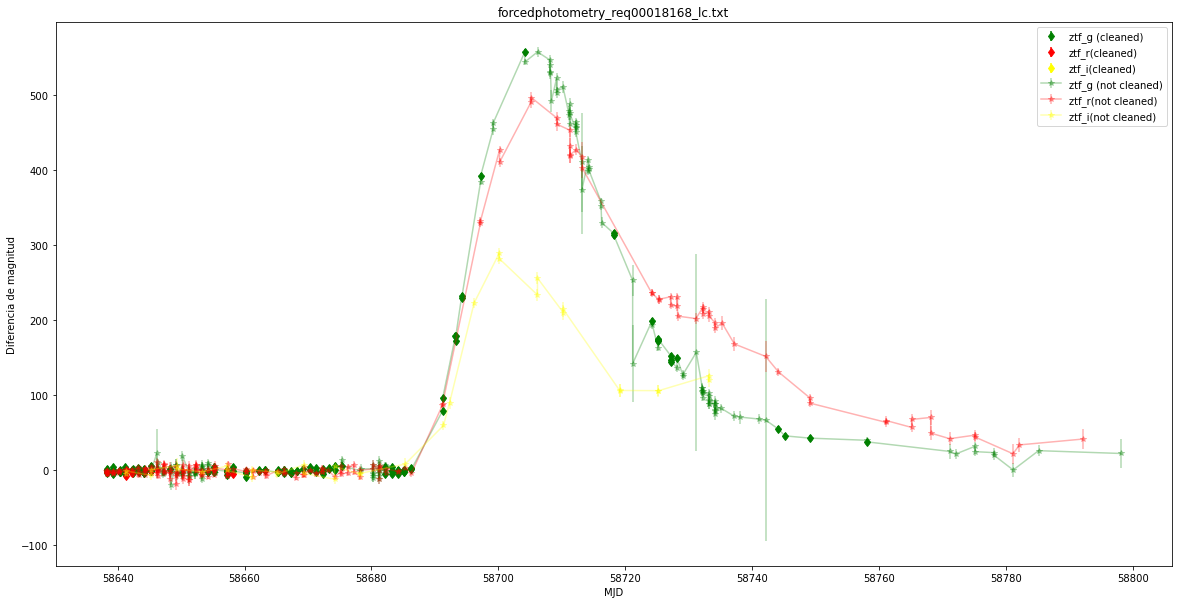

dirección: LCs/forcedphotometry_req00018194_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 7


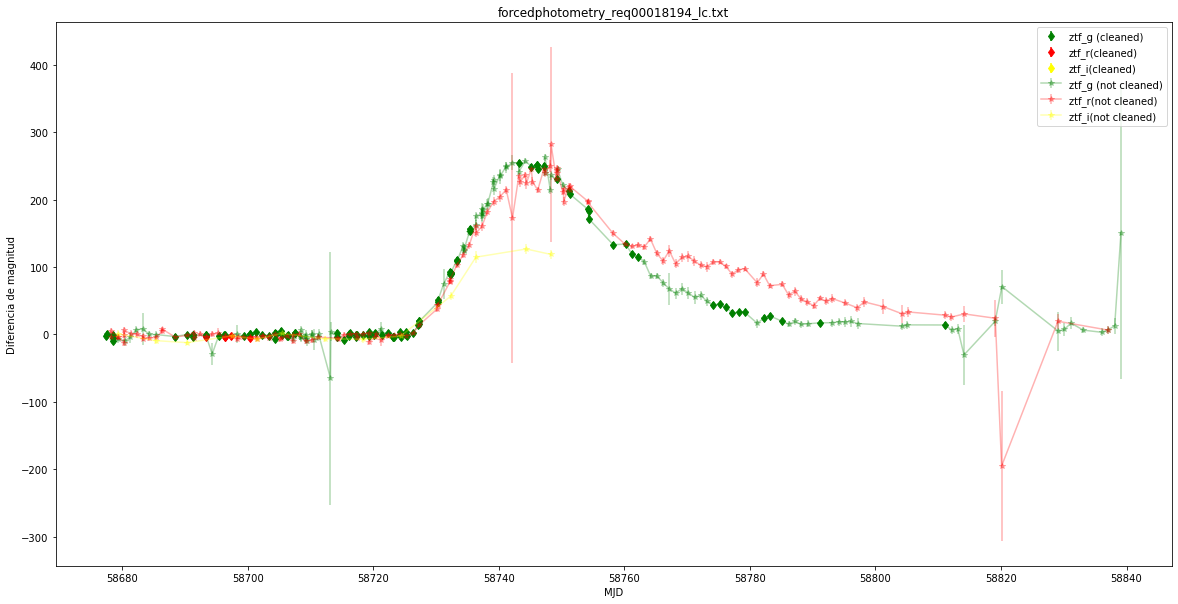

dirección: LCs/forcedphotometry_req00018198_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 8


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_

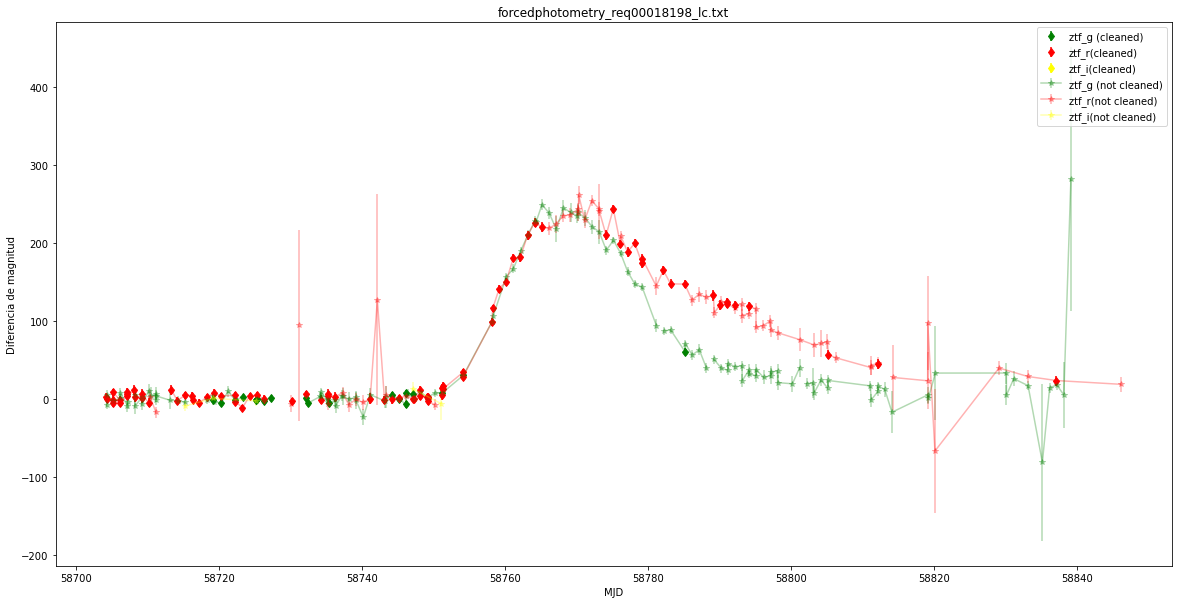

dirección: LCs/forcedphotometry_req00018354_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 9


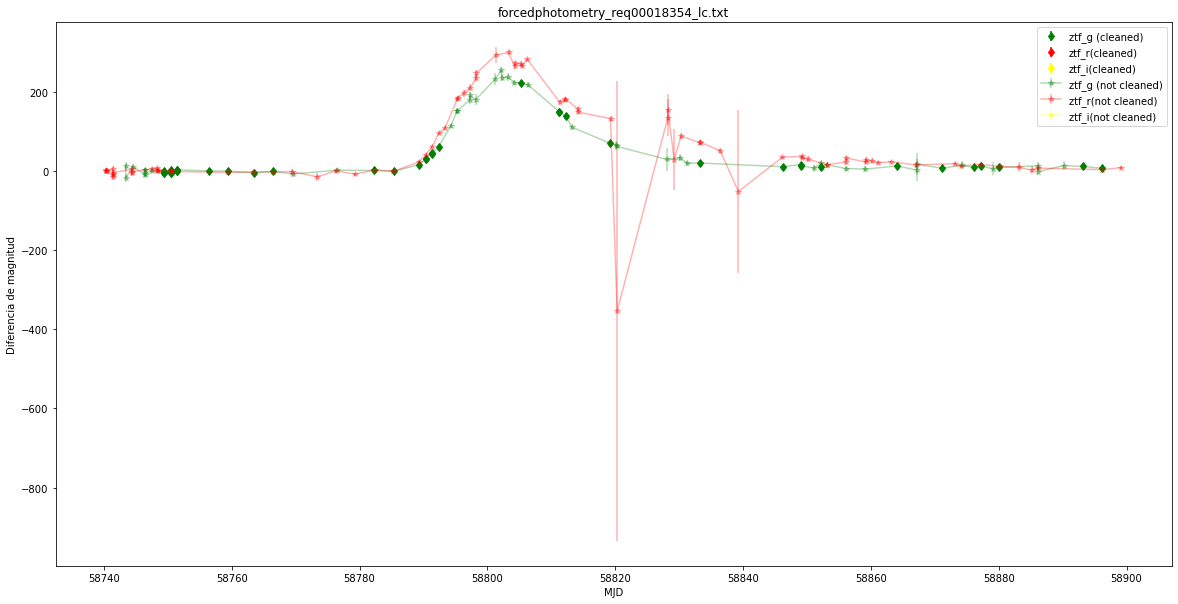

dirección: LCs/forcedphotometry_req00018361_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 10


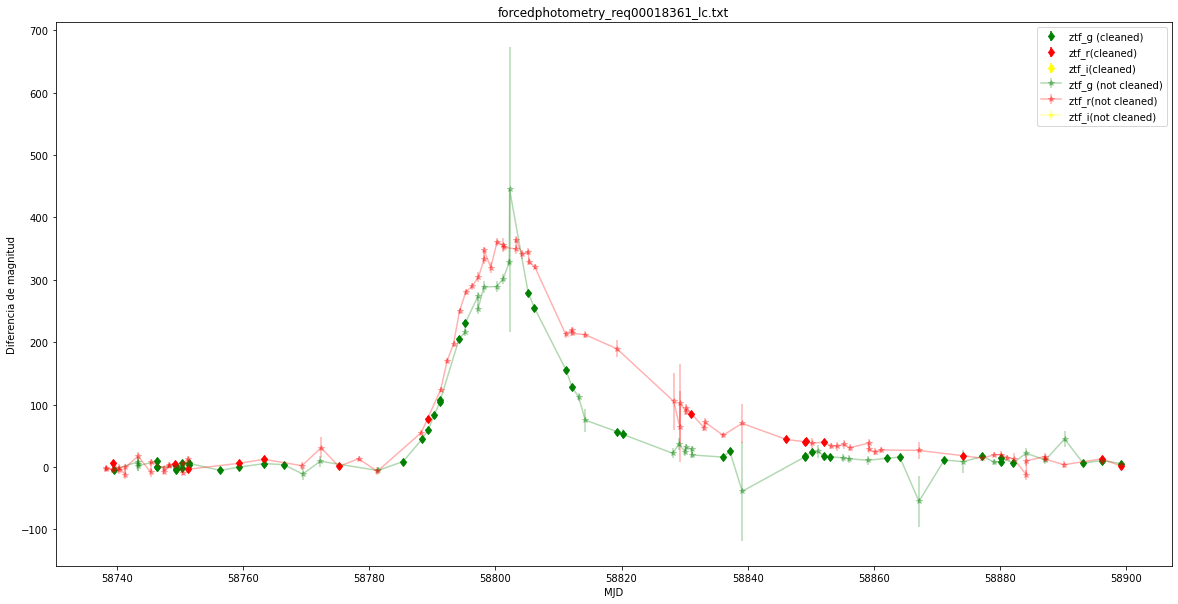

dirección: LCs/forcedphotometry_req00018368_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 11


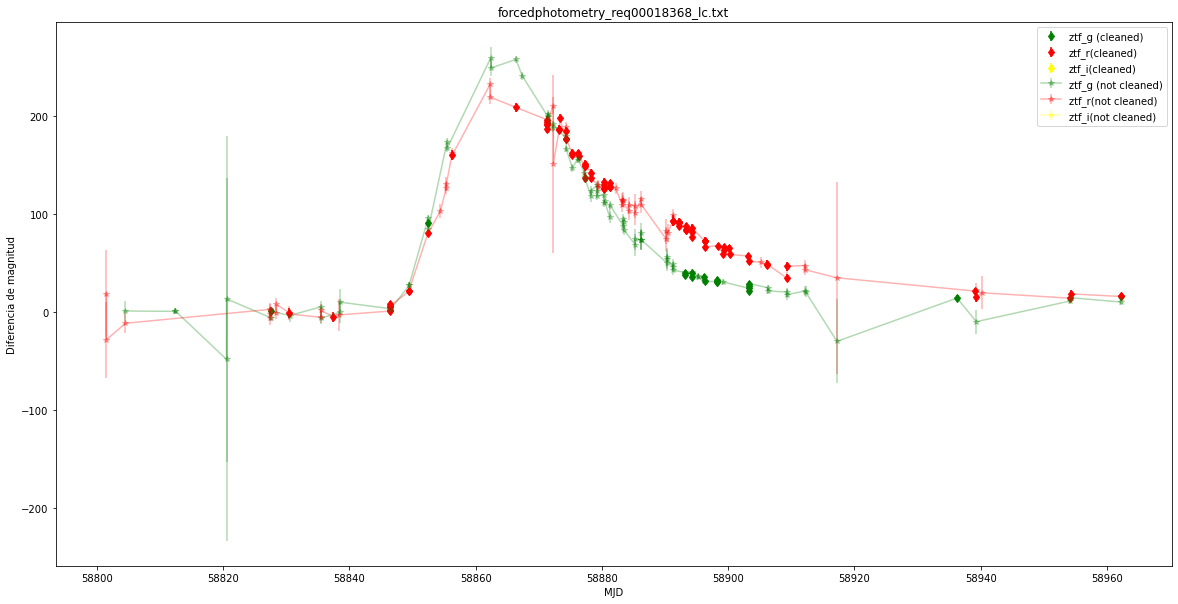

dirección: LCs/forcedphotometry_req00018375_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 12


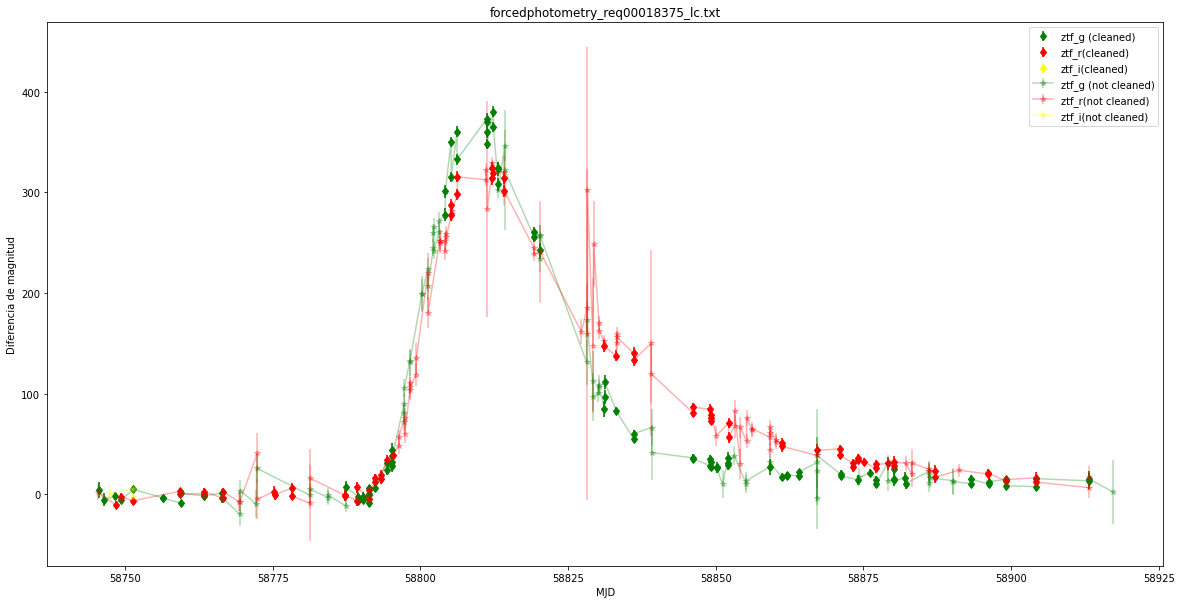

dirección: LCs/forcedphotometry_req00018407_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 13


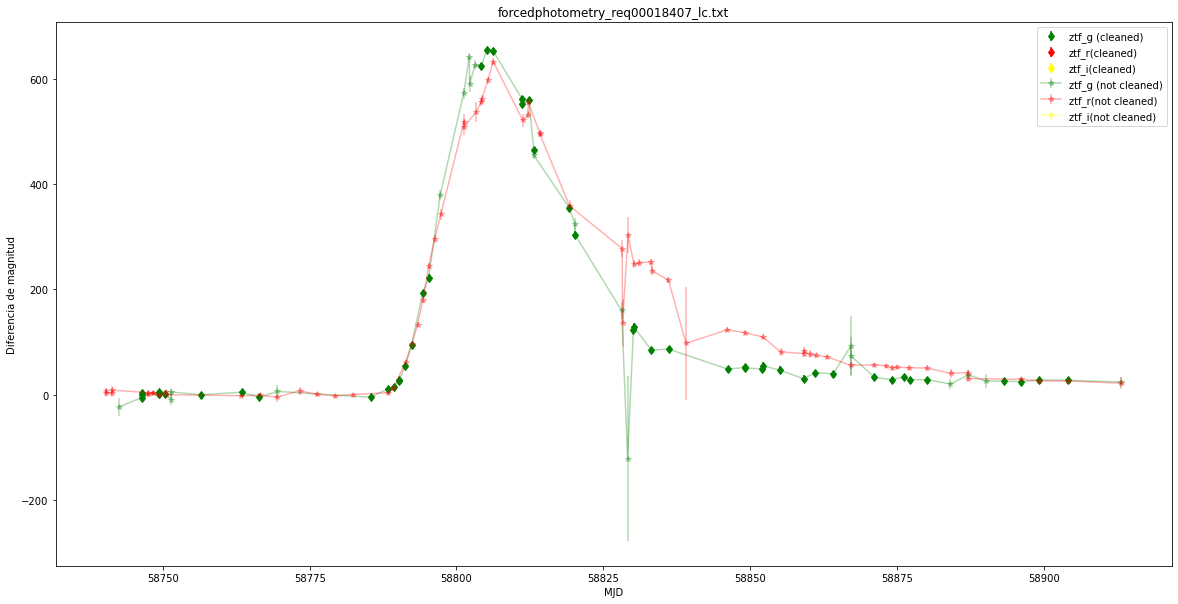

dirección: LCs/forcedphotometry_req00018446_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 14


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


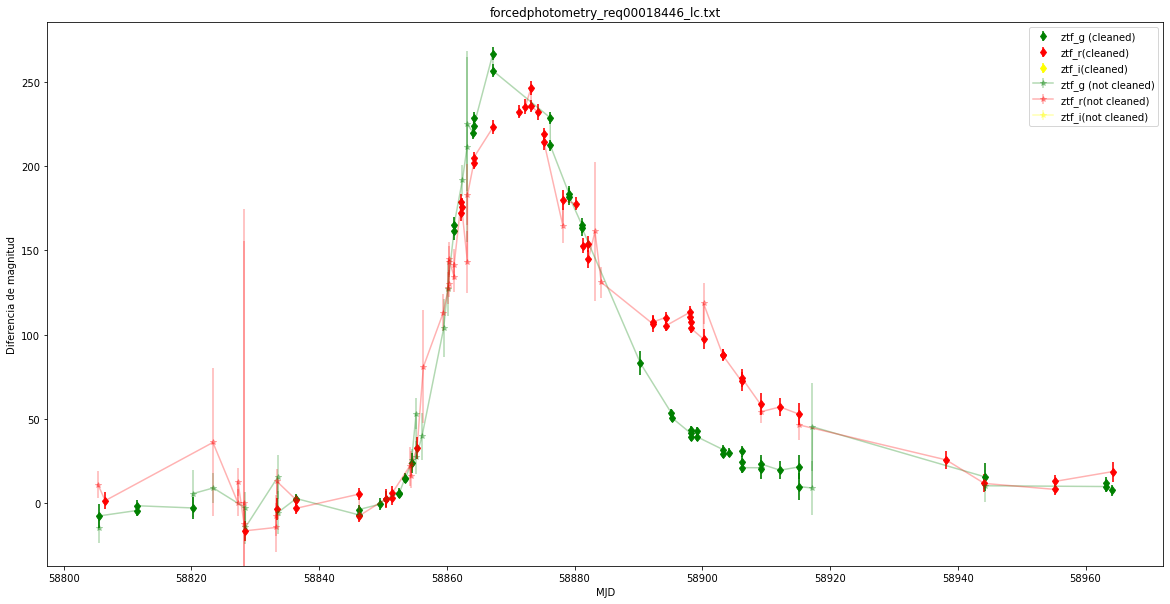

dirección: LCs/forcedphotometry_req00018493_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 15


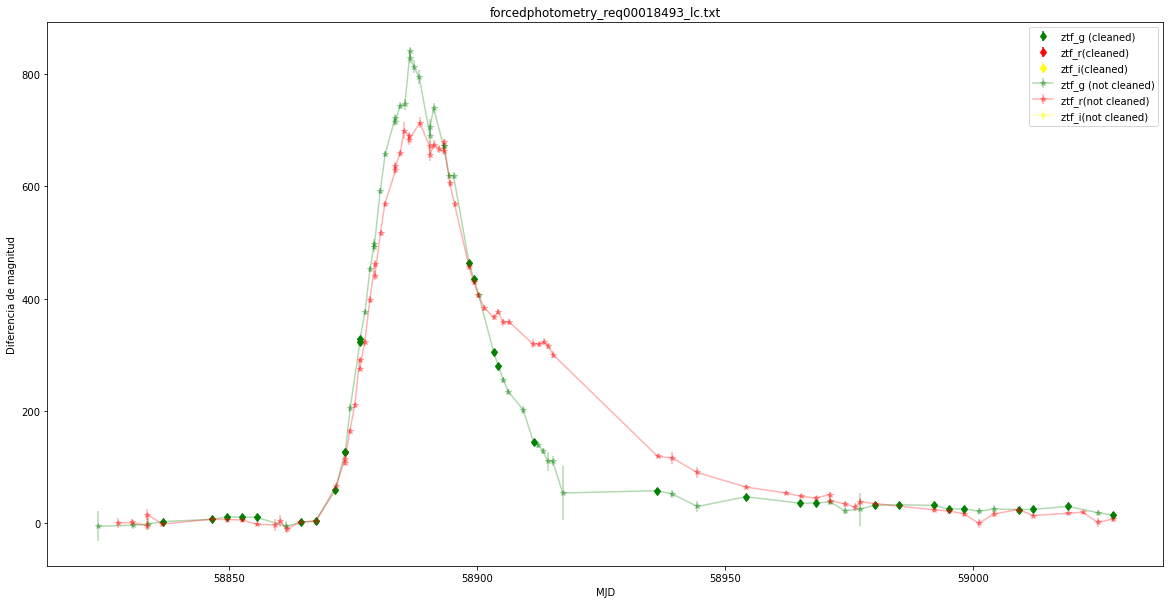

dirección: LCs/forcedphotometry_req00018508_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 16


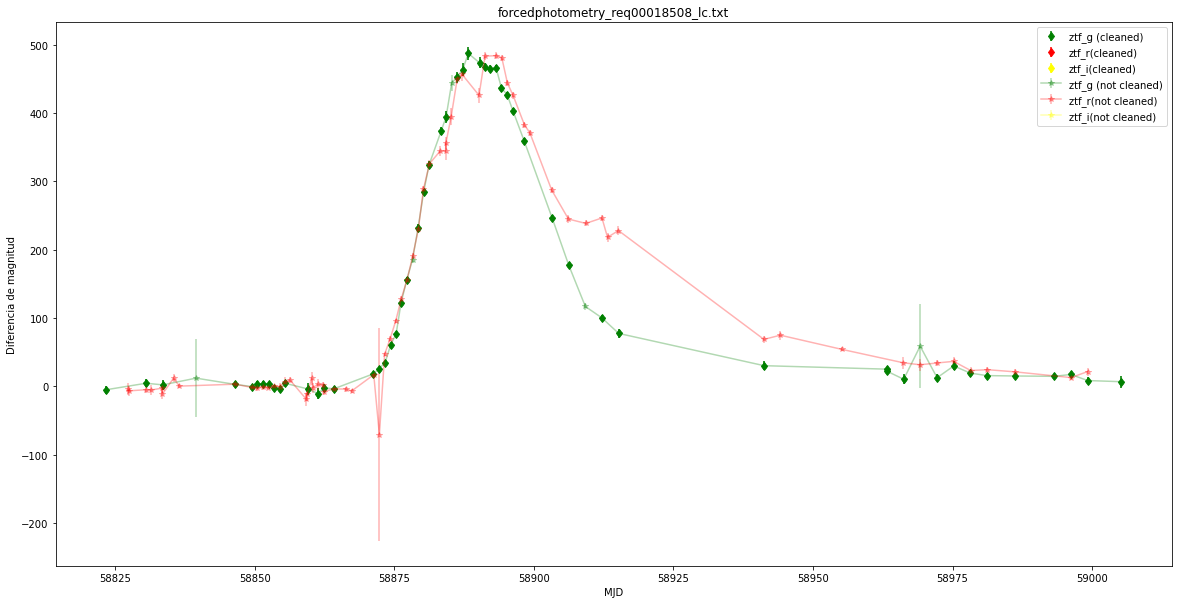

dirección: LCs/forcedphotometry_req00018567_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 17


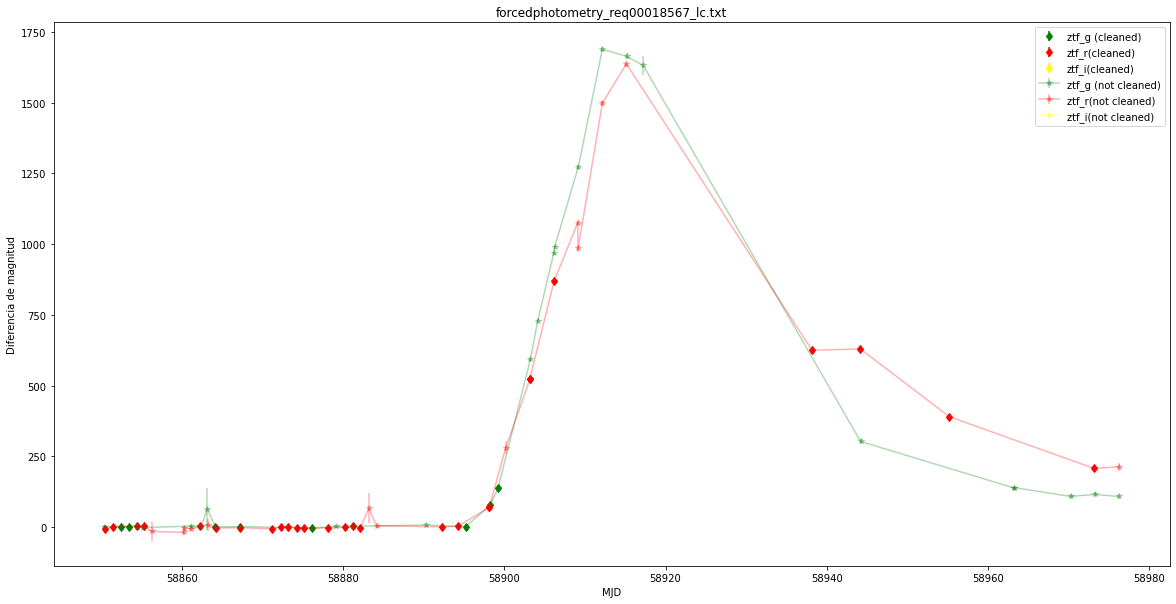

dirección: LCs/forcedphotometry_req00018578_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 18


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


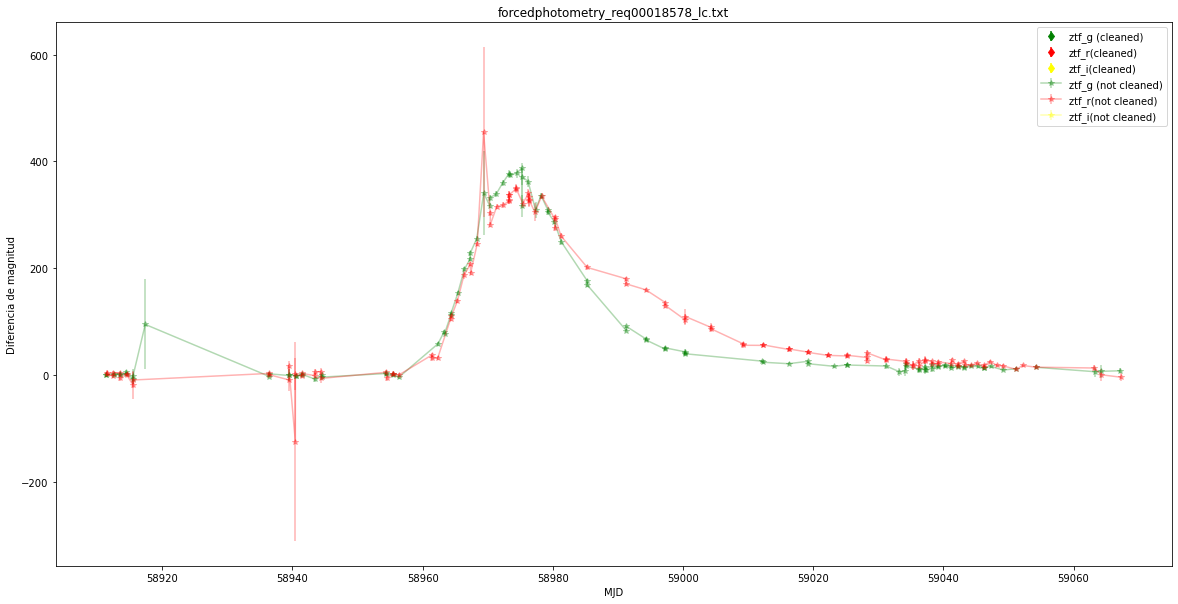

dirección: LCs/forcedphotometry_req00019090_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 19


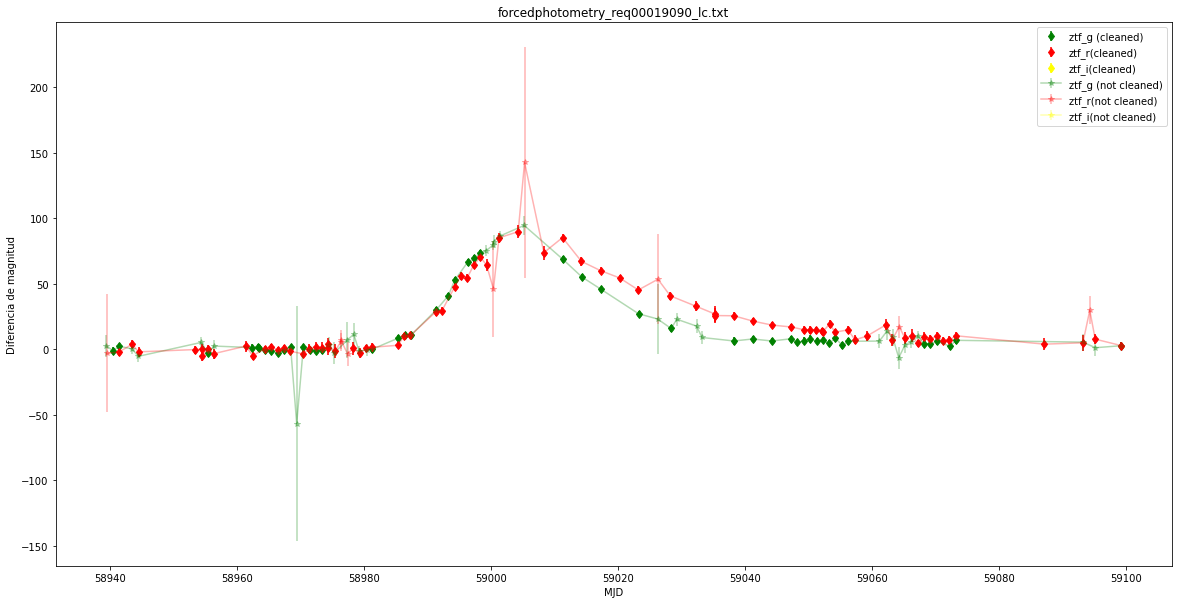

dirección: LCs/forcedphotometry_req00019110_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 20


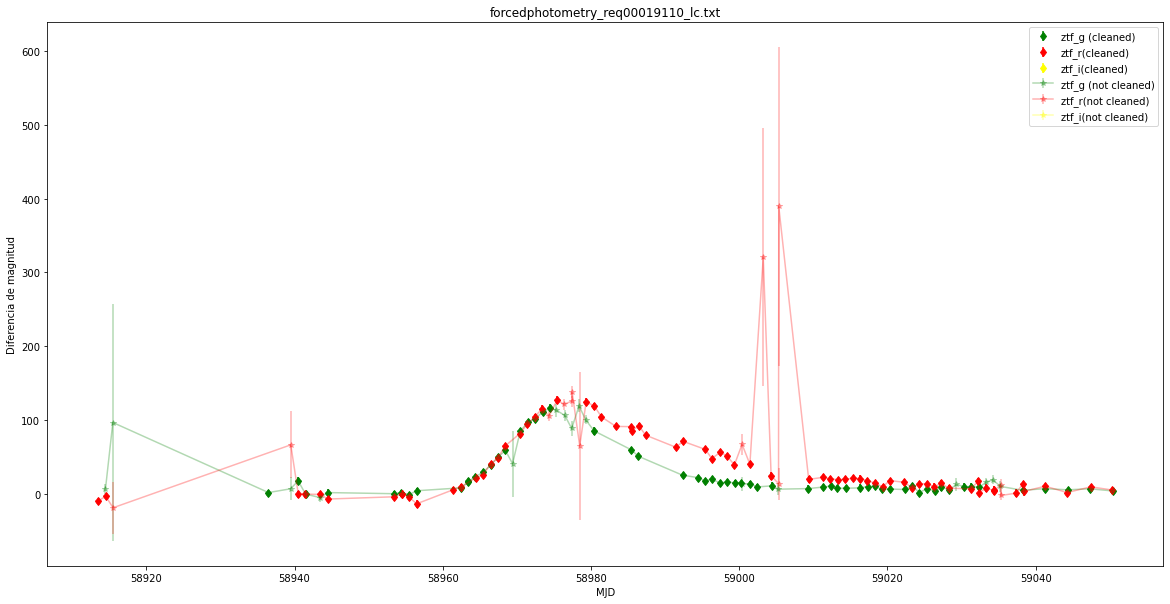

dirección: LCs/forcedphotometry_req00019114_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 21


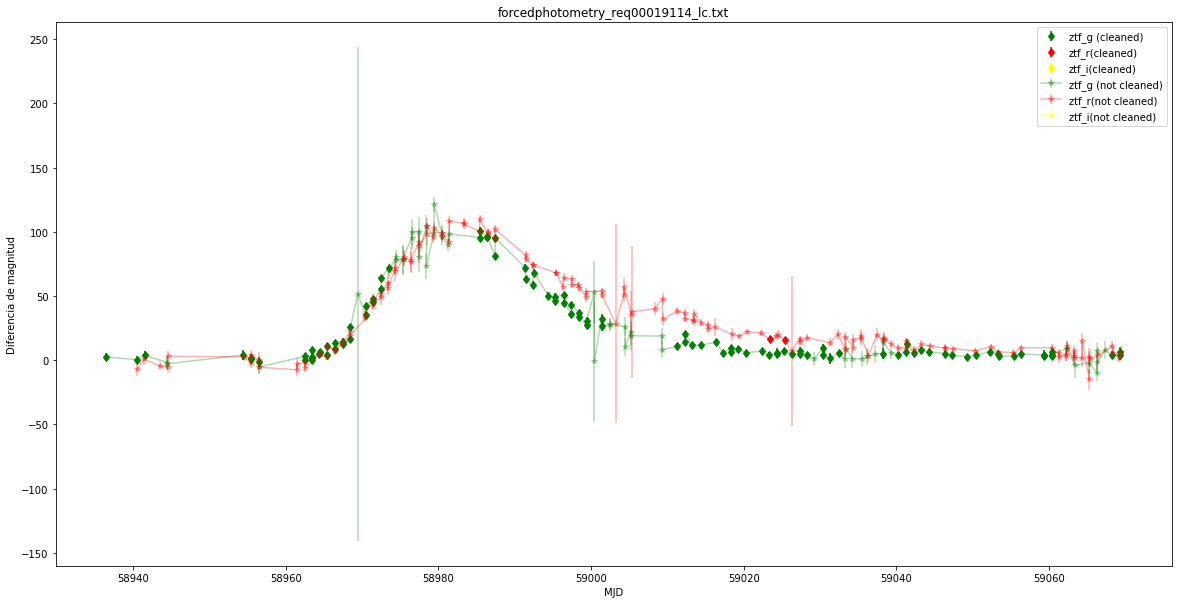

dirección: LCs/forcedphotometry_req00019126_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 22


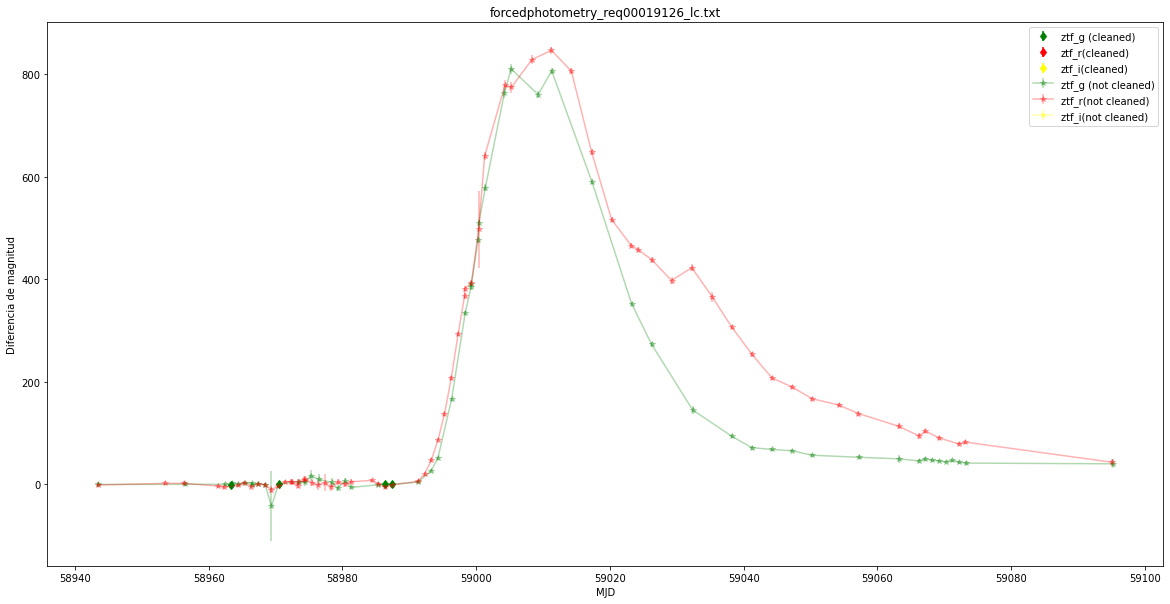

dirección: LCs/forcedphotometry_req00019148_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 23


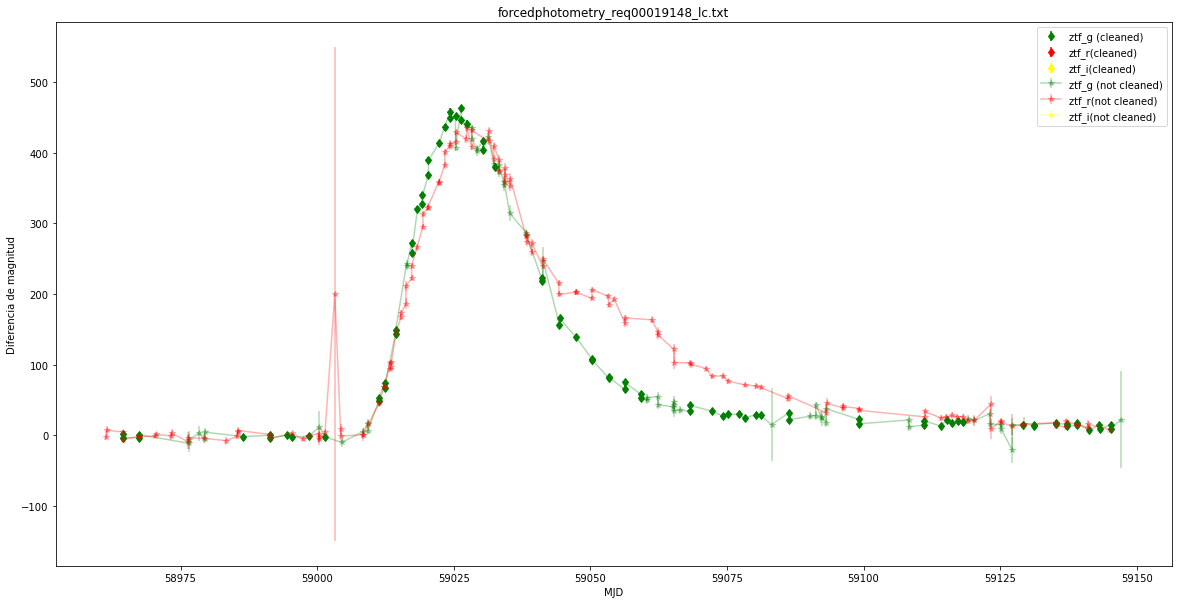

dirección: LCs/forcedphotometry_req00019151_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 24


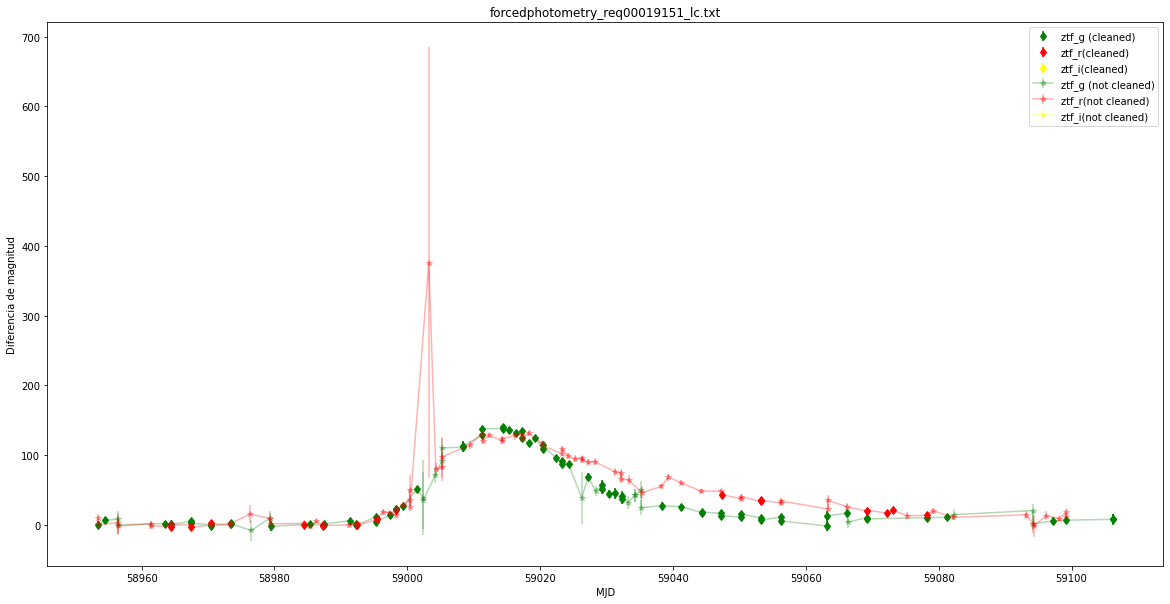

dirección: LCs/forcedphotometry_req00019165_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 25


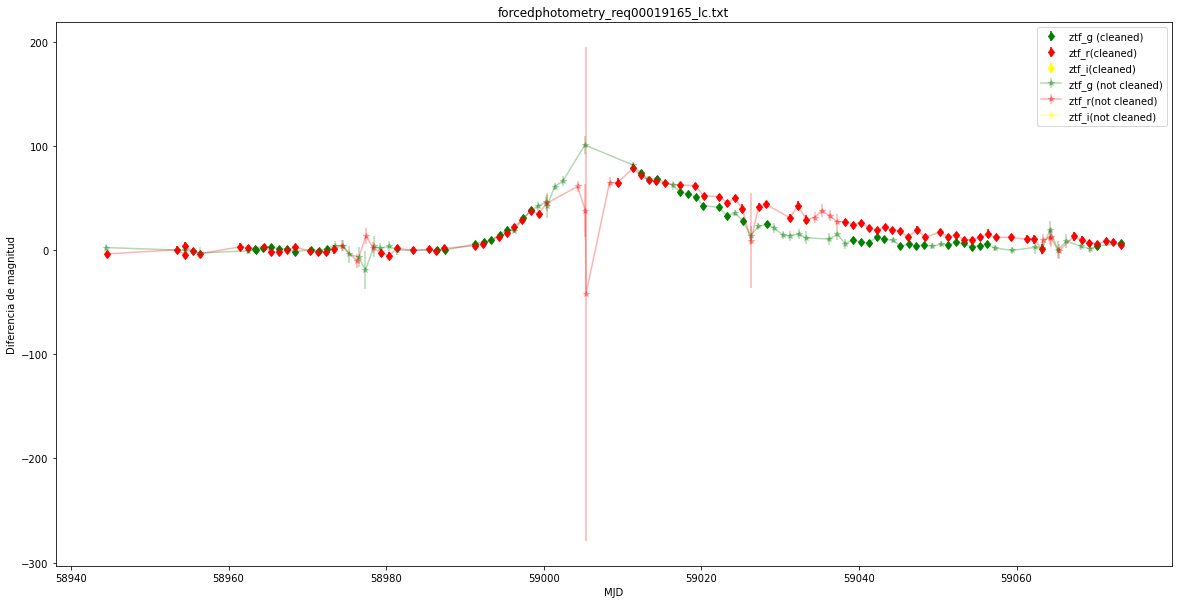

dirección: LCs/forcedphotometry_req00031769_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 26


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


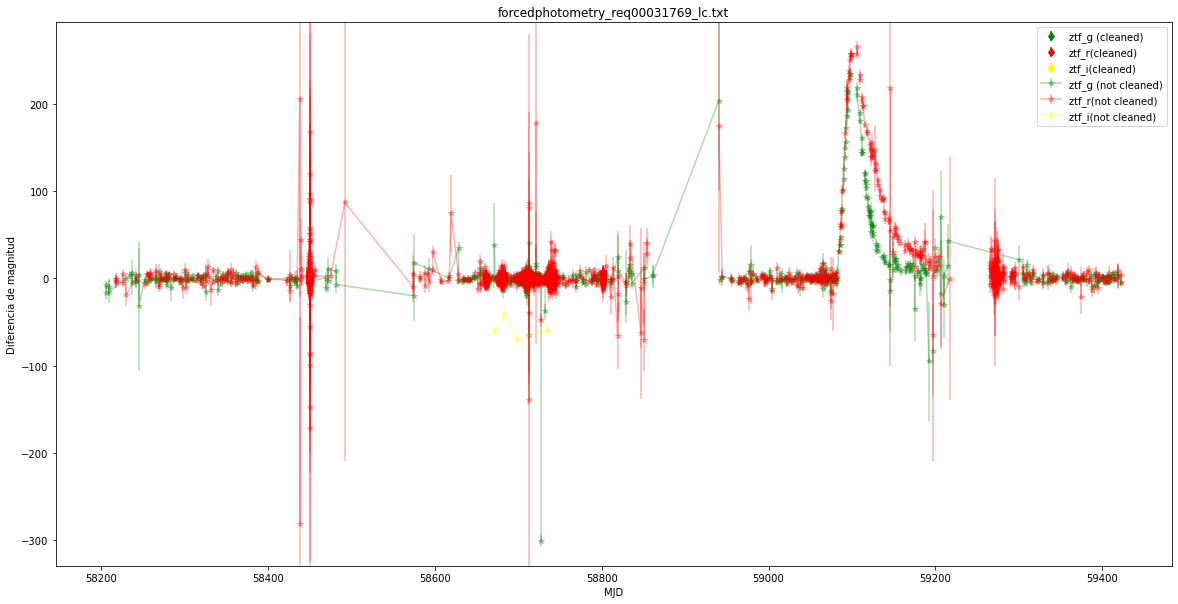

dirección: LCs/forcedphotometry_req00031807_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 27


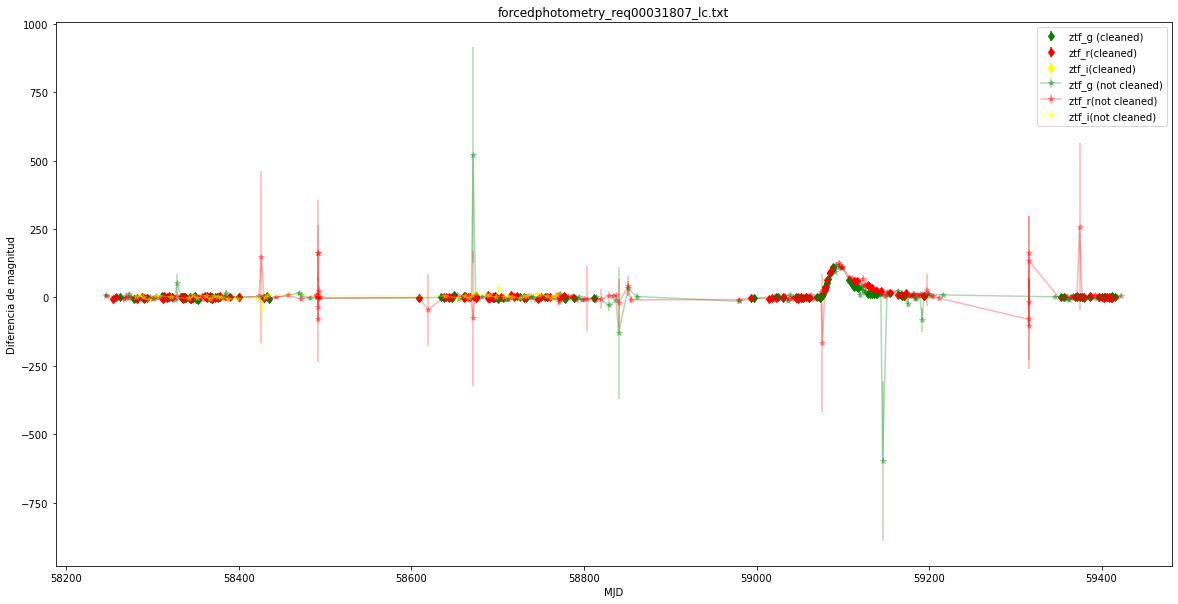

dirección: LCs/forcedphotometry_req00035665_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 28


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


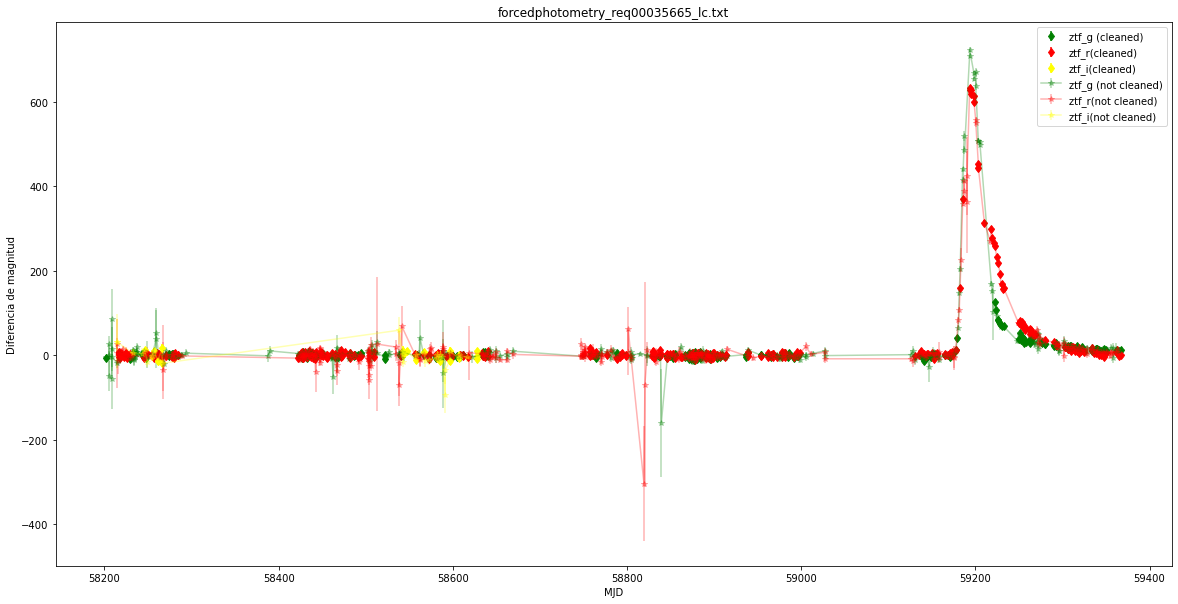

dirección: LCs/forcedphotometry_req00035675_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 29


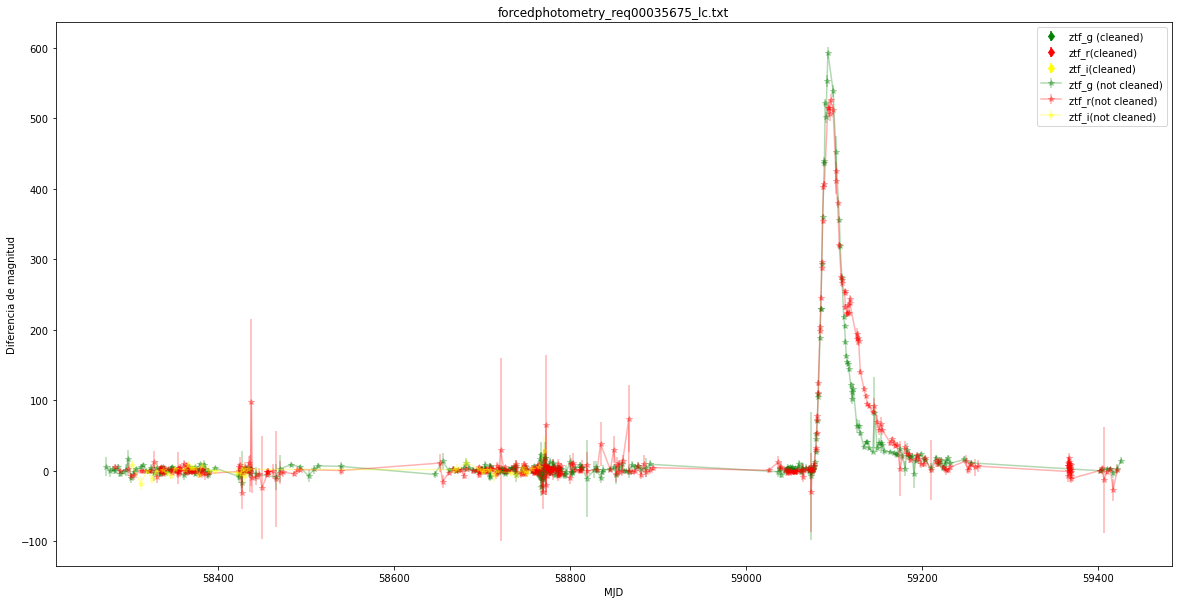

dirección: LCs/forcedphotometry_req00037577_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 30


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_

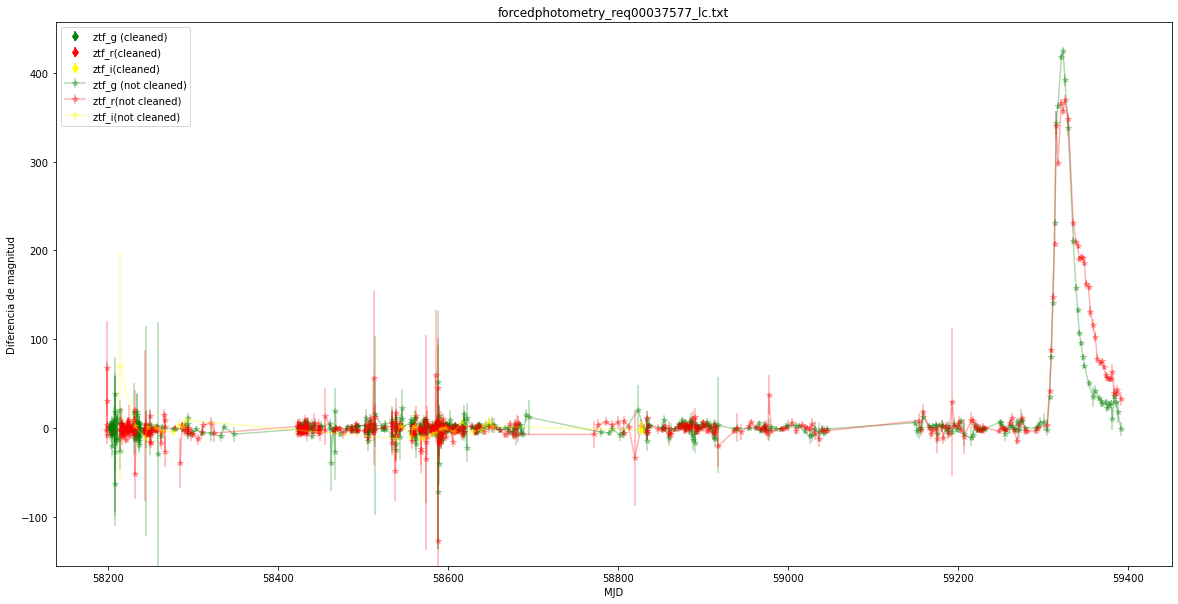

dirección: LCs/forcedphotometry_req00037597_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 31


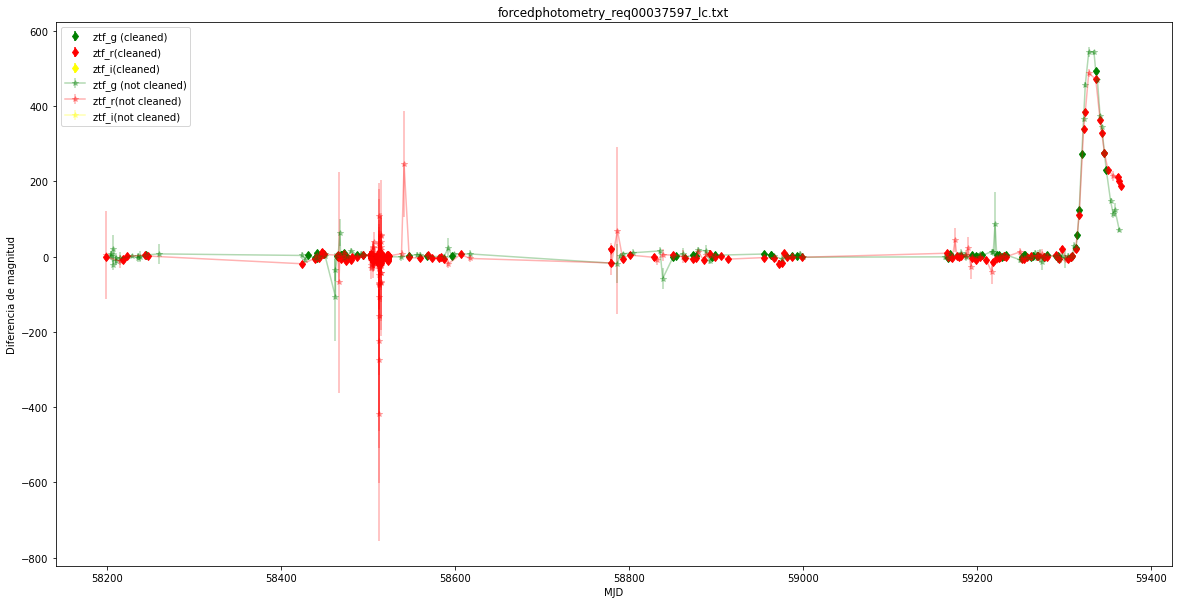

dirección: LCs/forcedphotometry_req00038952_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 32


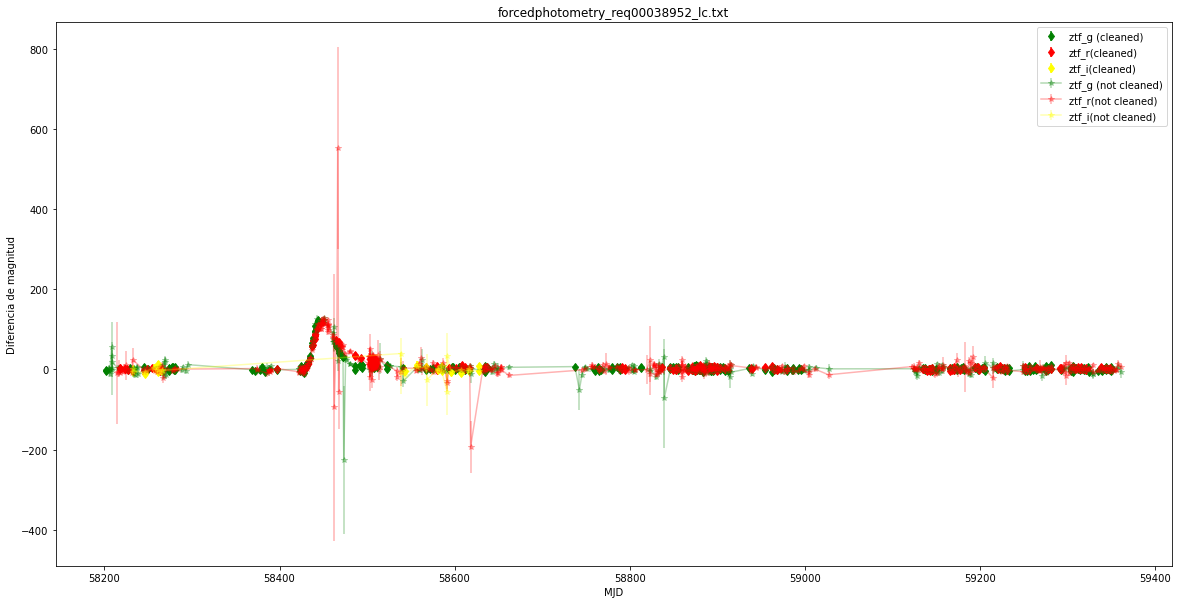

dirección: LCs/forcedphotometry_req00039022_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 33


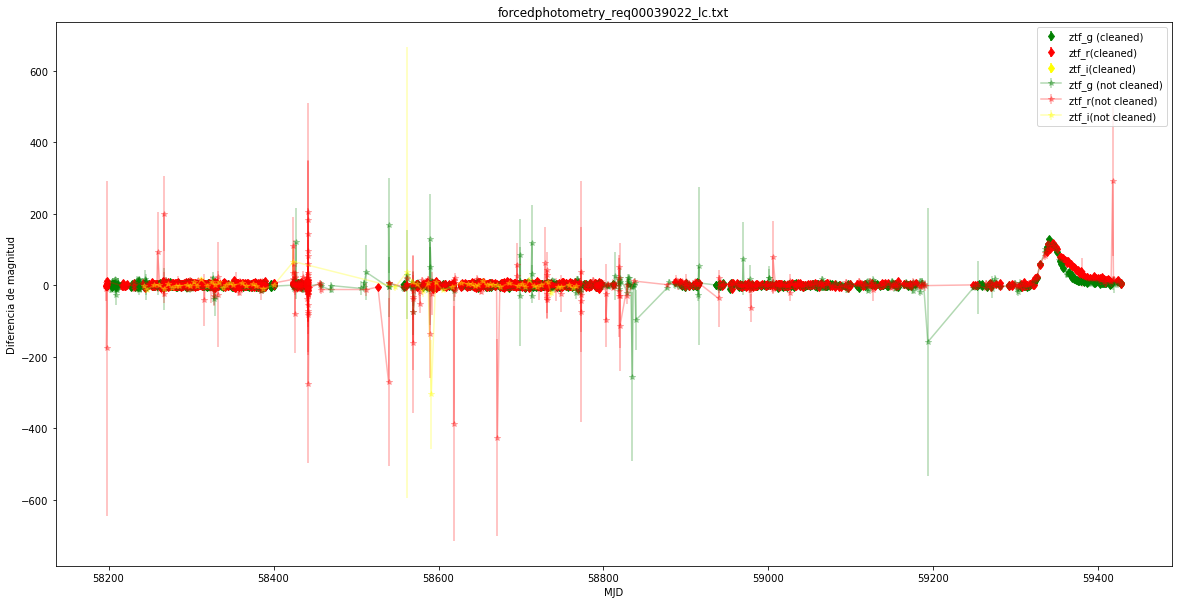

dirección: LCs/forcedphotometry_req00040332_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 34


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


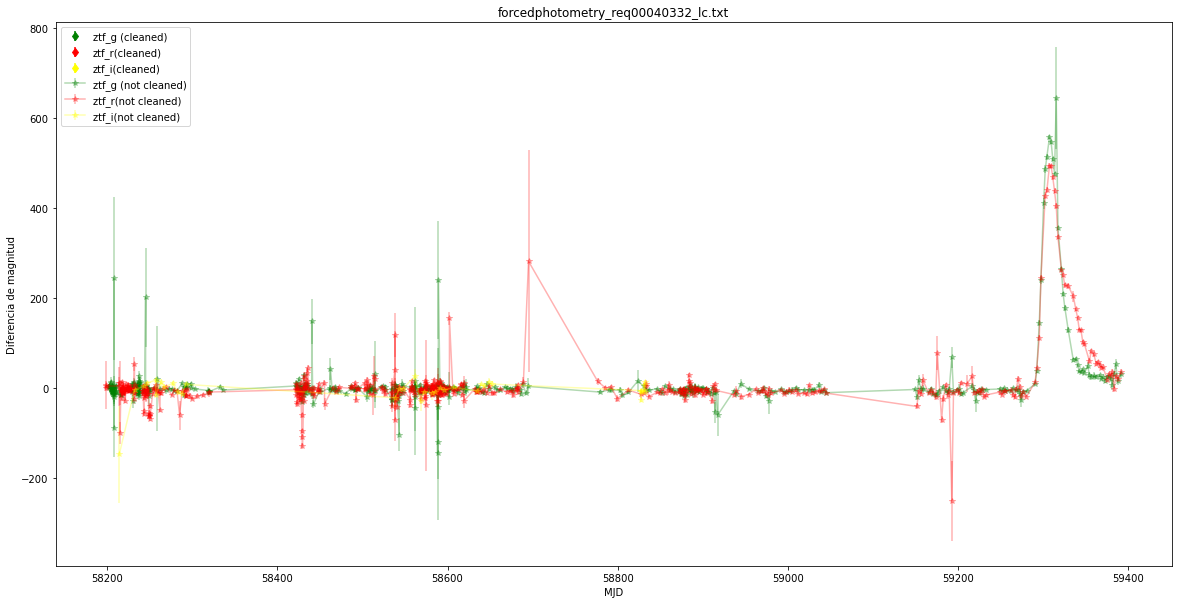

dirección: LCs/forcedphotometry_req00040714_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 35


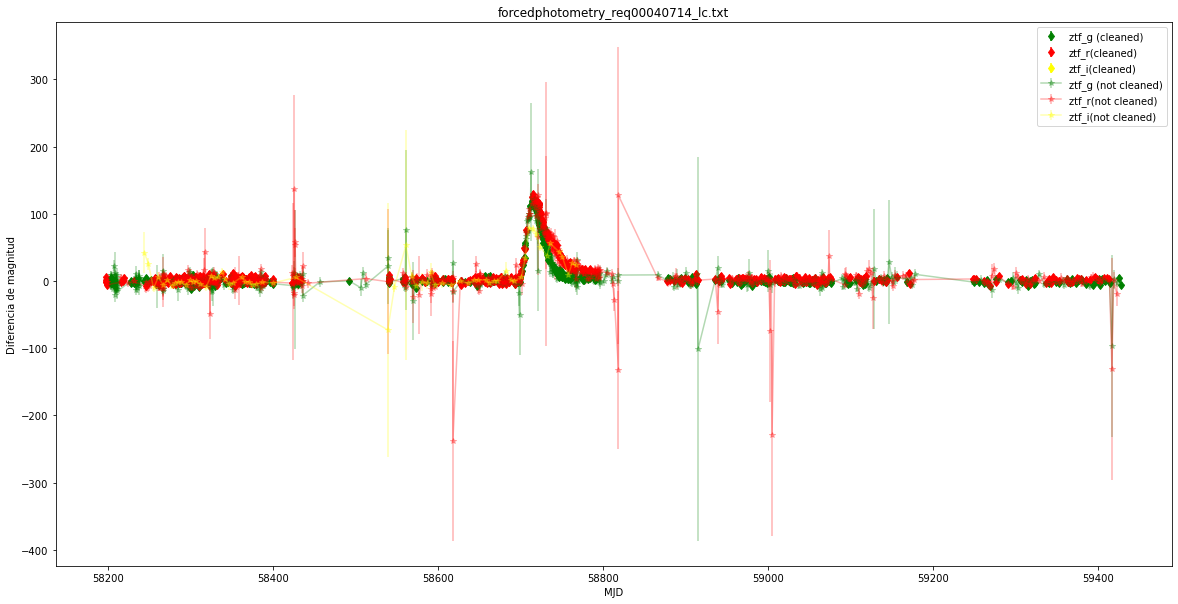

dirección: LCs/forcedphotometry_req00040735_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 36


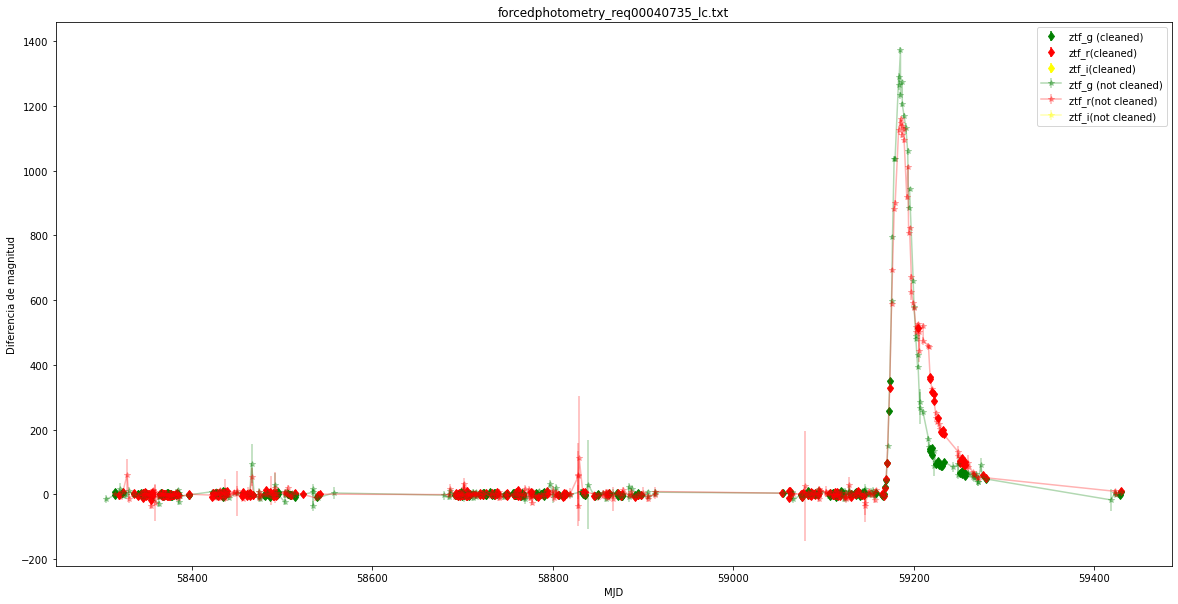

dirección: LCs/forcedphotometry_req00040743_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 37


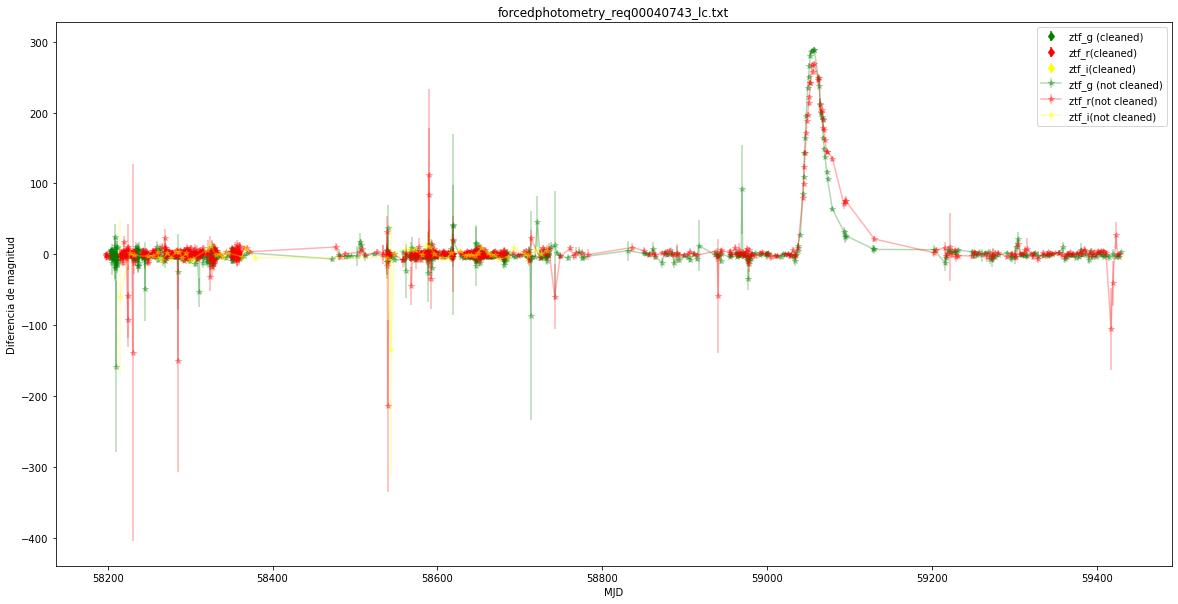

dirección: LCs/forcedphotometry_req00040762_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 38


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


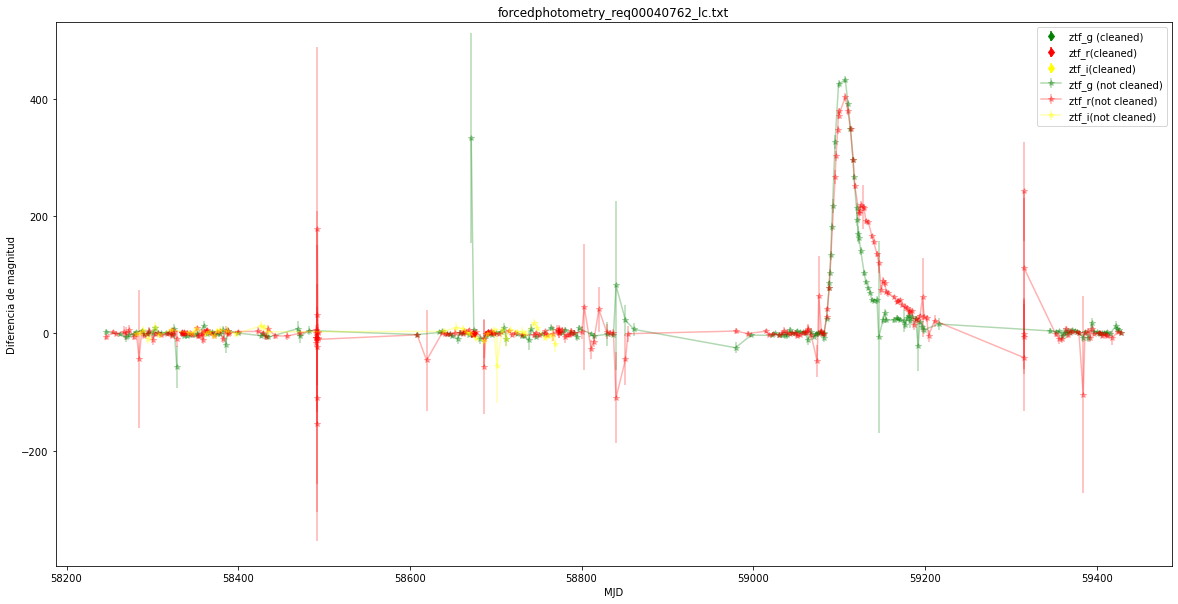

dirección: LCs/forcedphotometry_req00040785_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 39


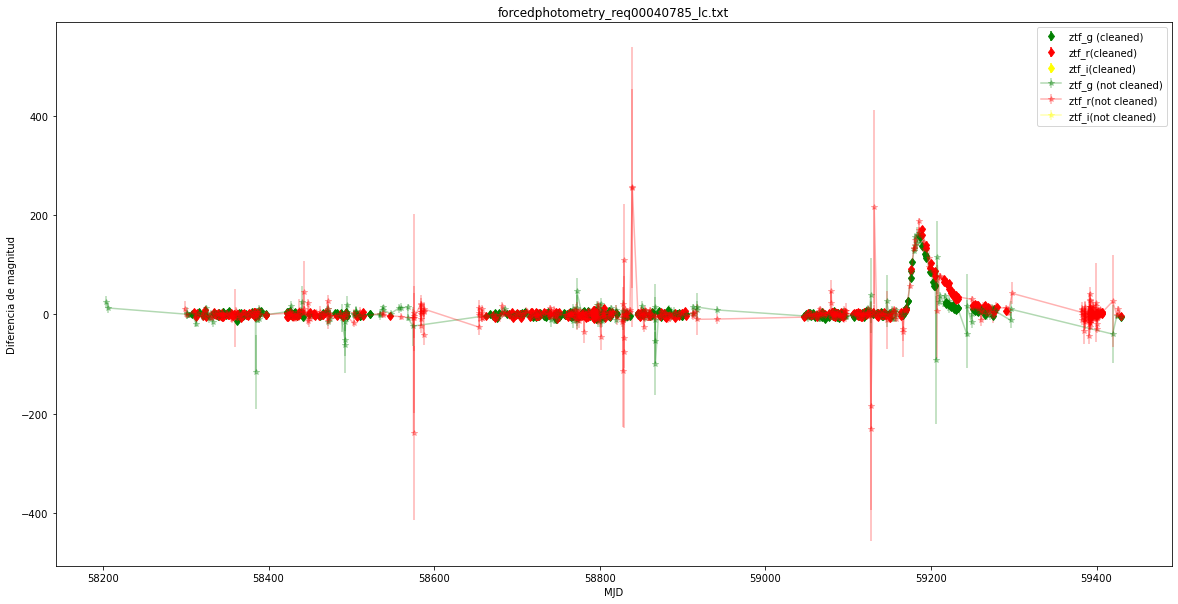

dirección: LCs/forcedphotometry_req00041342_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 40


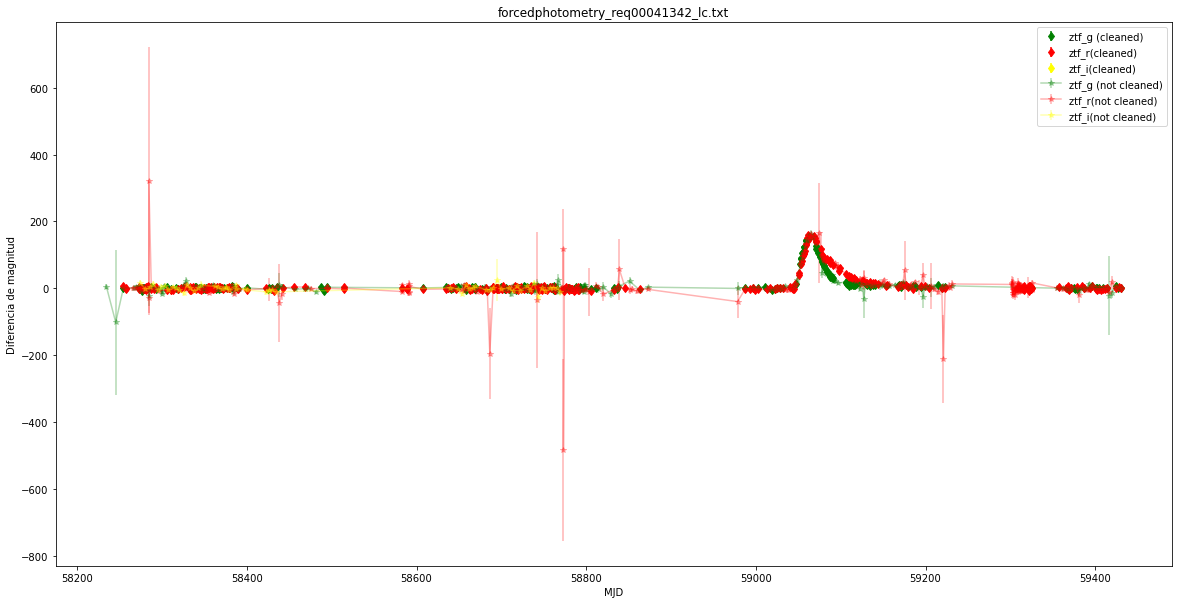

dirección: LCs/forcedphotometry_req00042024_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 41


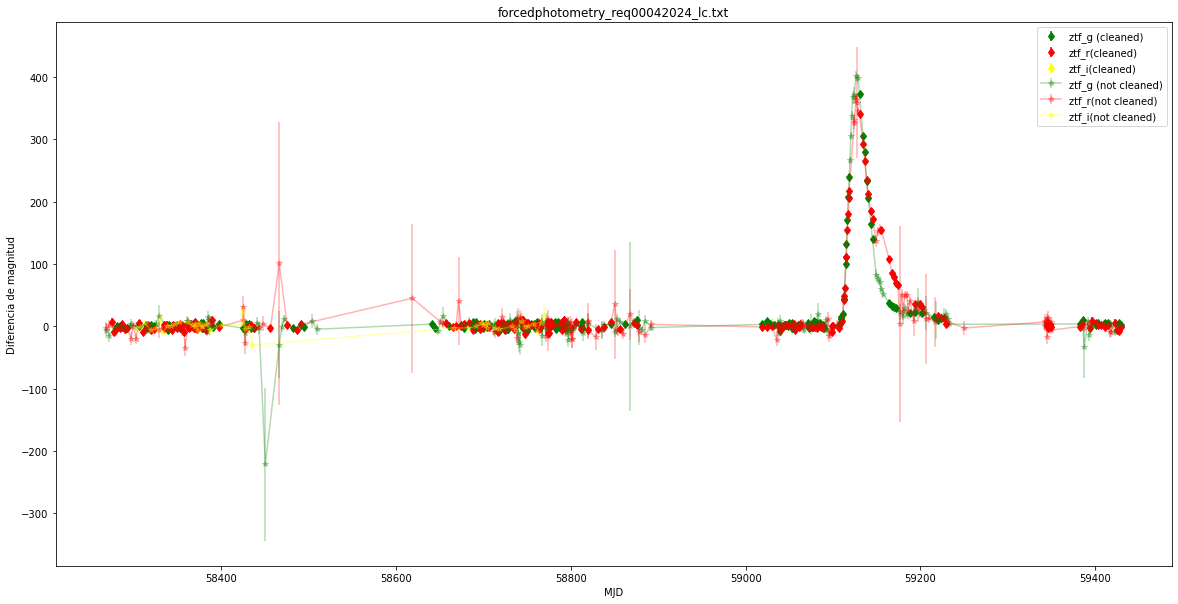

dirección: LCs/forcedphotometry_req00042211_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 42


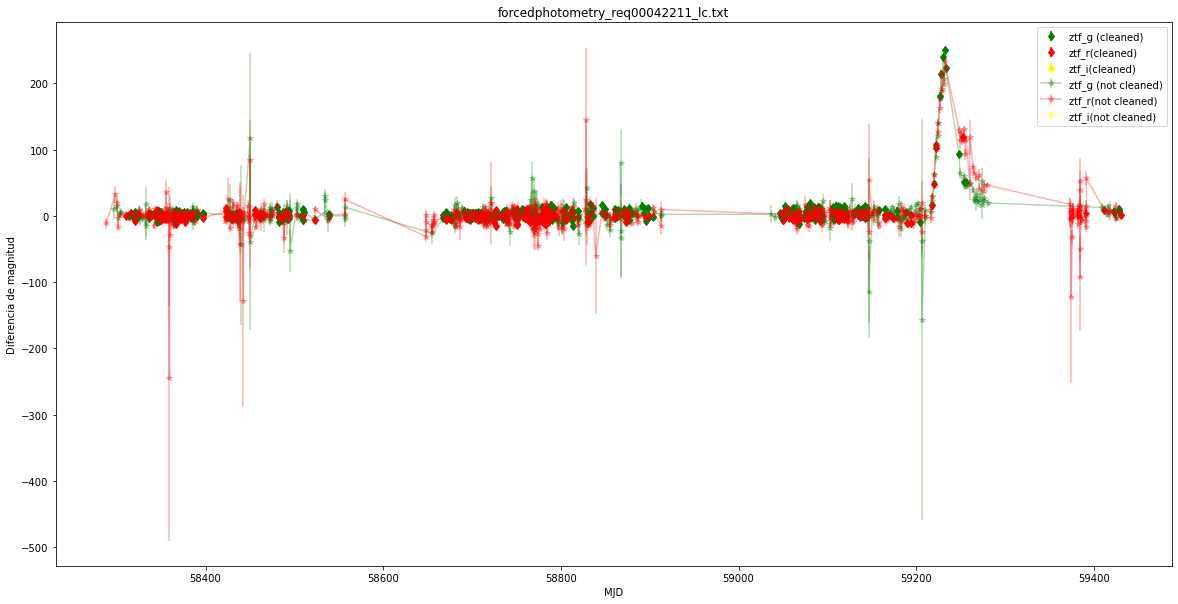

dirección: LCs/forcedphotometry_req00042383_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 43


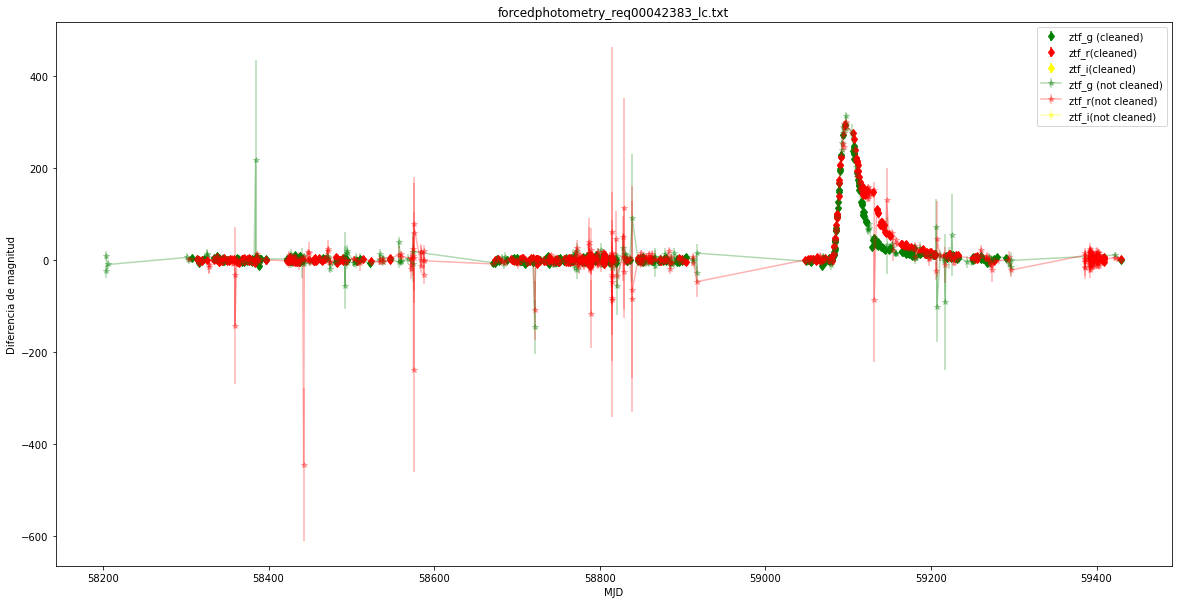

dirección: LCs/forcedphotometry_req00042427_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 44


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


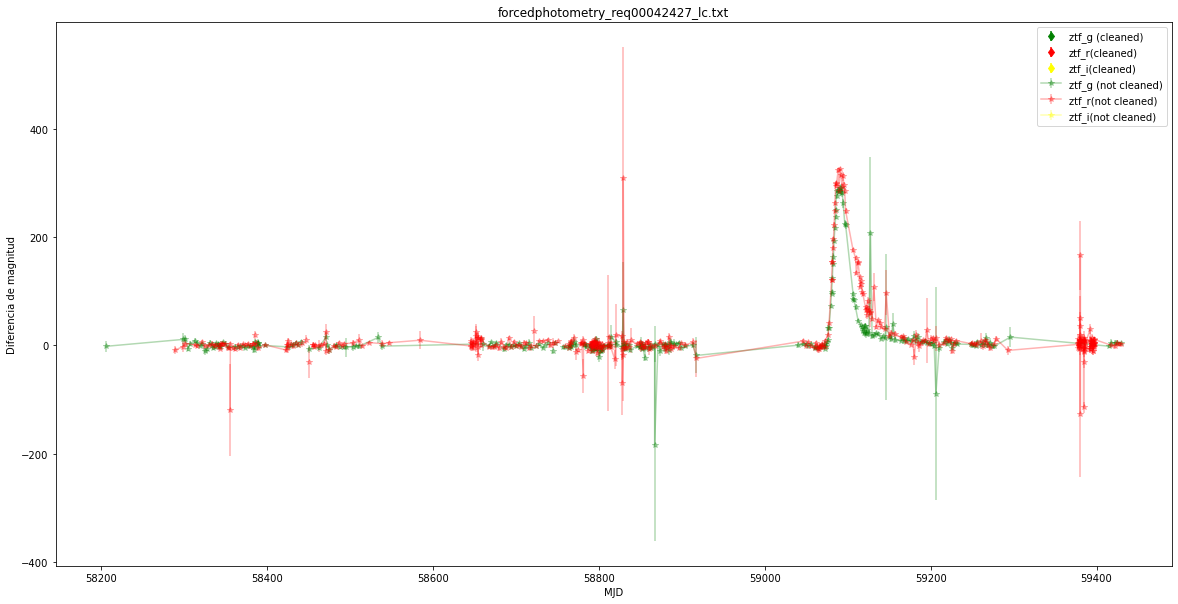

dirección: LCs/forcedphotometry_req00043327_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 45


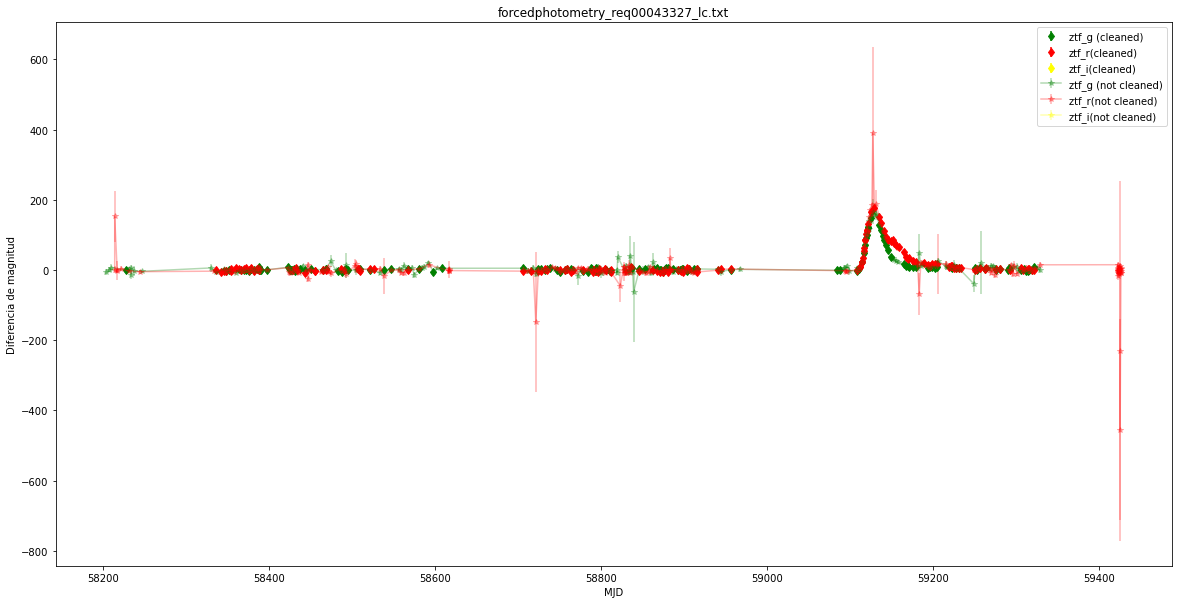

dirección: LCs/forcedphotometry_req00044923_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 46


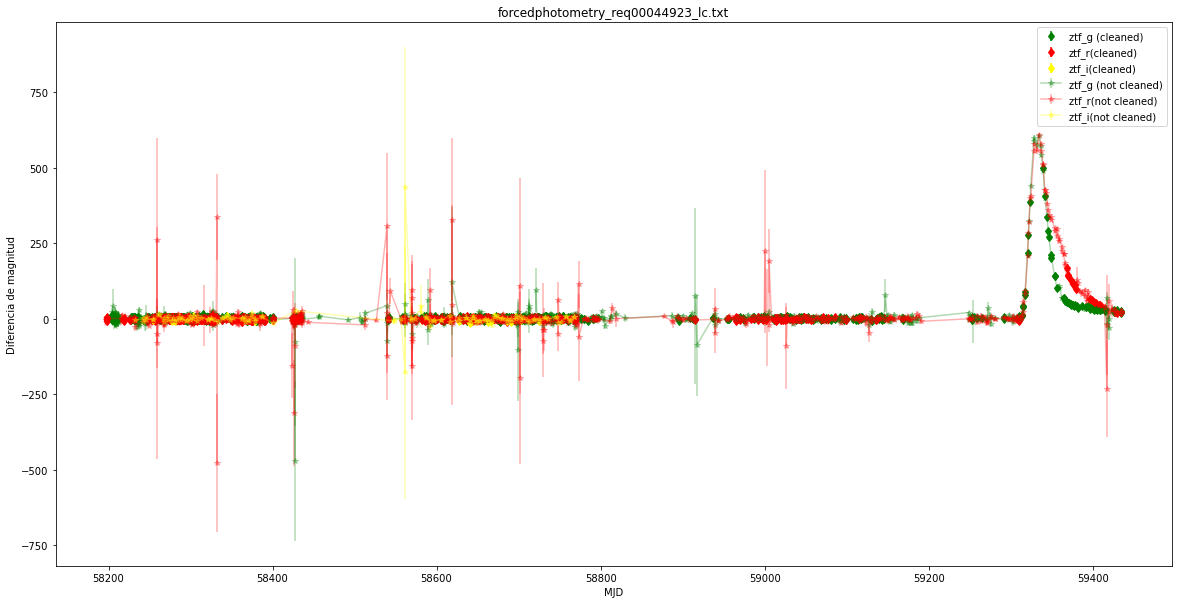

dirección: LCs/forcedphotometry_req00044972_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 47


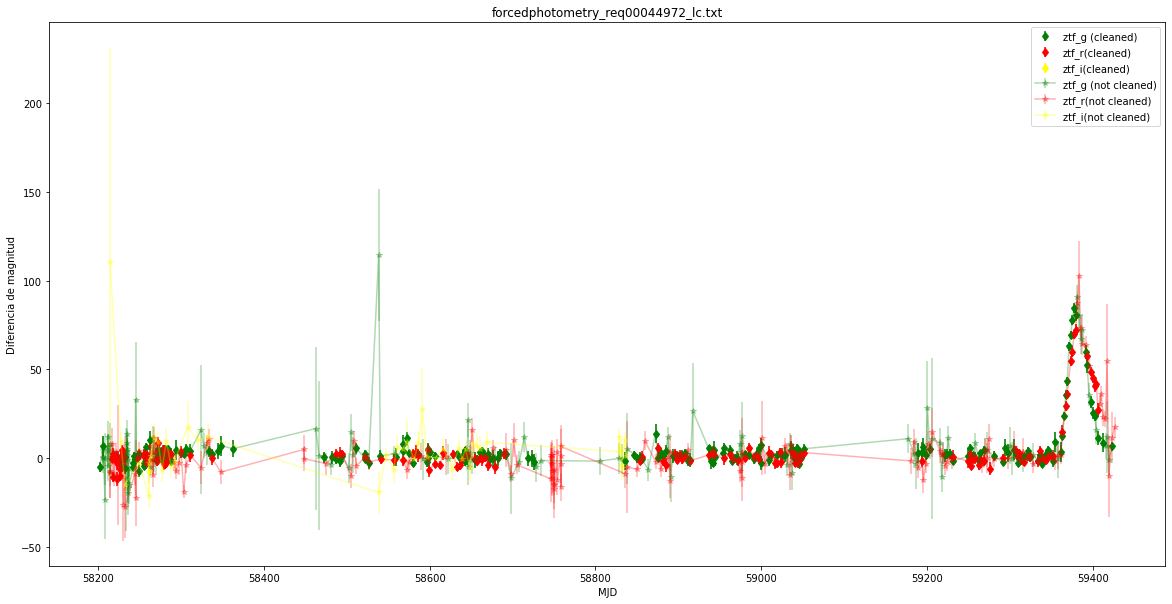

dirección: LCs/forcedphotometry_req00106783_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 48


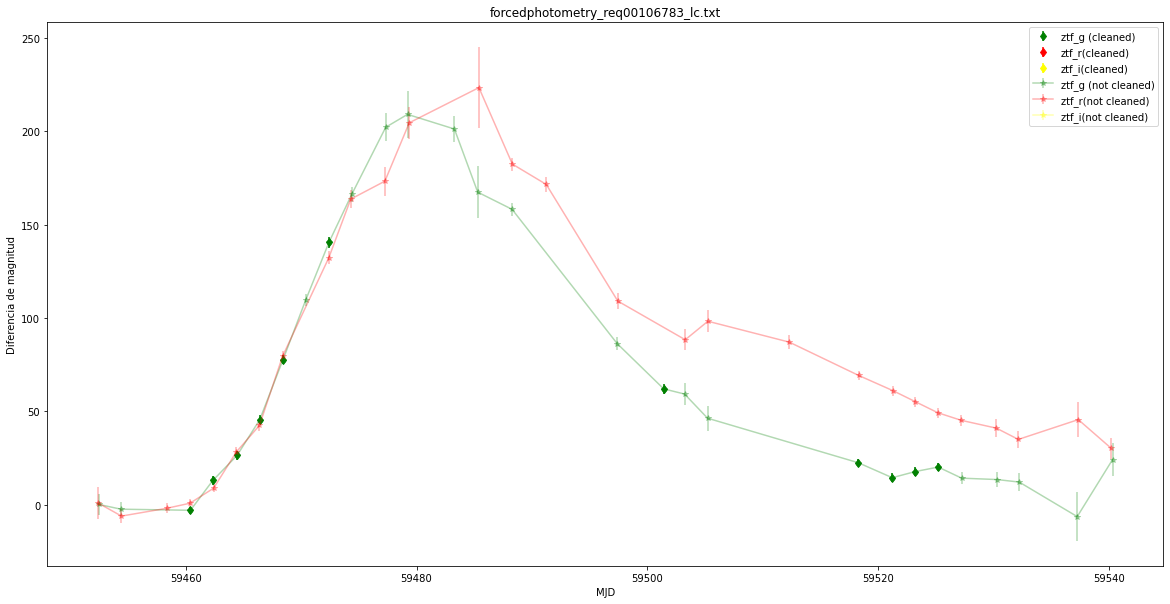

dirección: LCs/forcedphotometry_req00213985_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 49


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


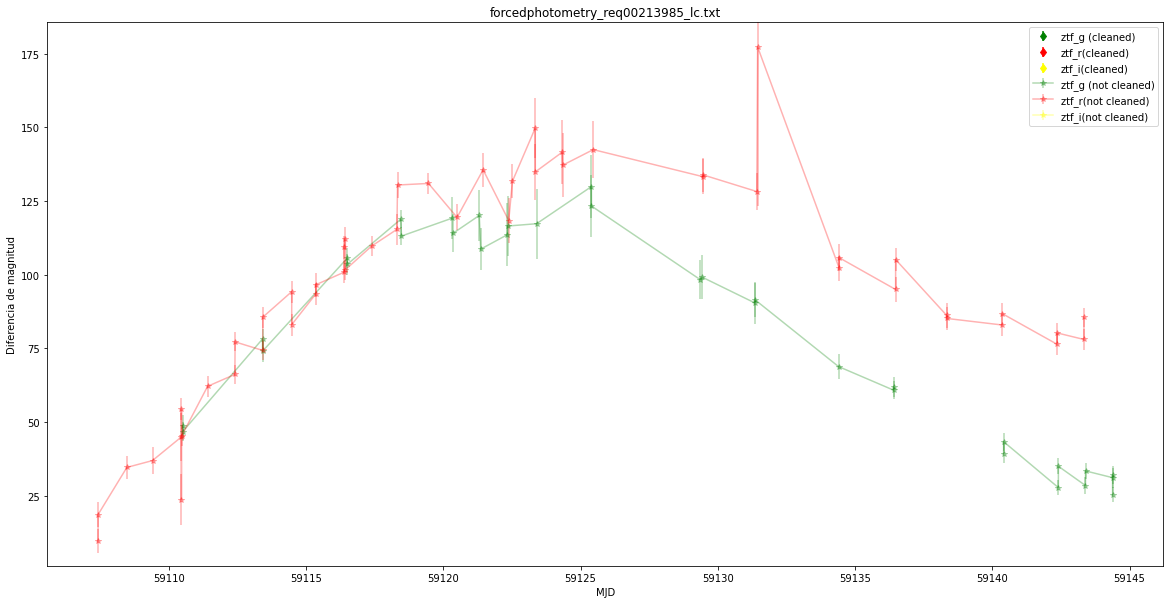

dirección: LCs/forcedphotometry_req00213986_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 50


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


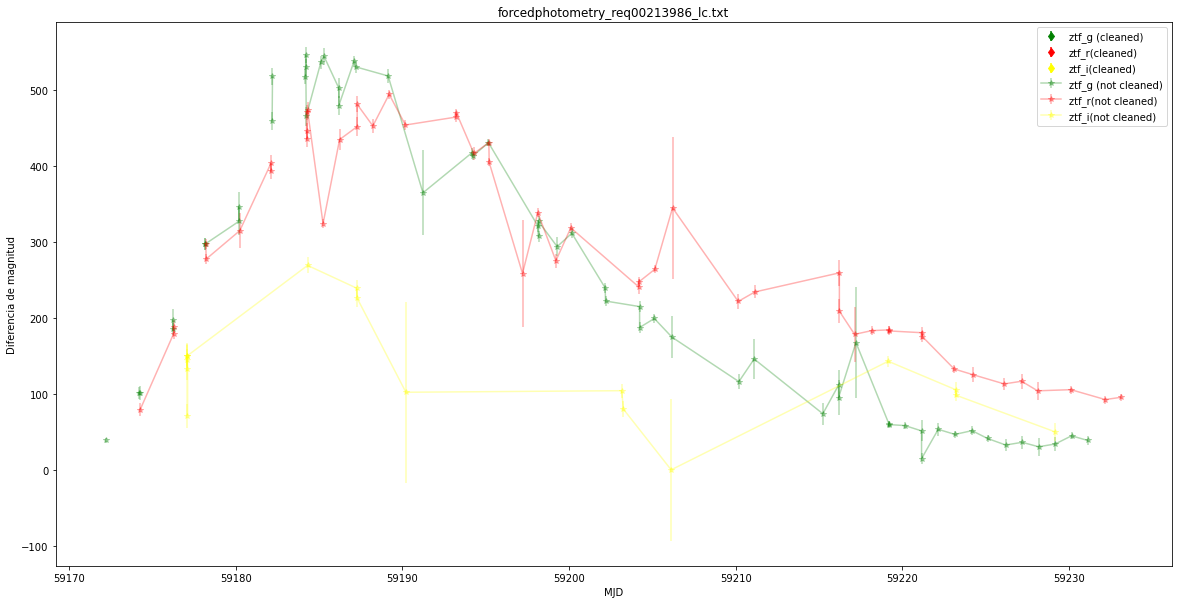

dirección: LCs/forcedphotometry_req00213987_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 51


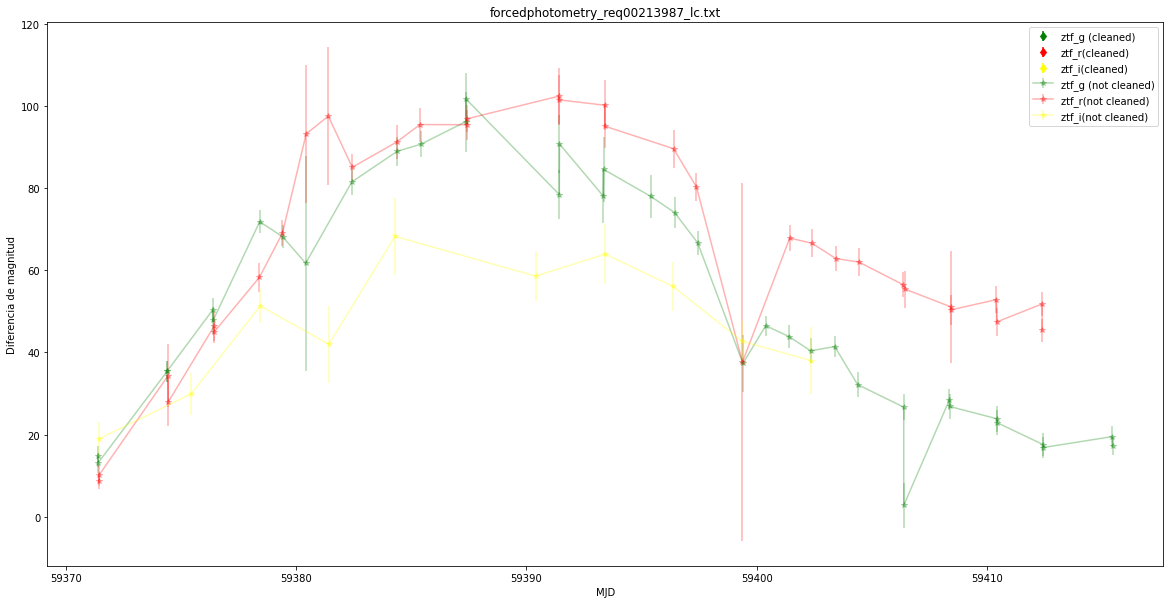

dirección: LCs/forcedphotometry_req00213988_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 52


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


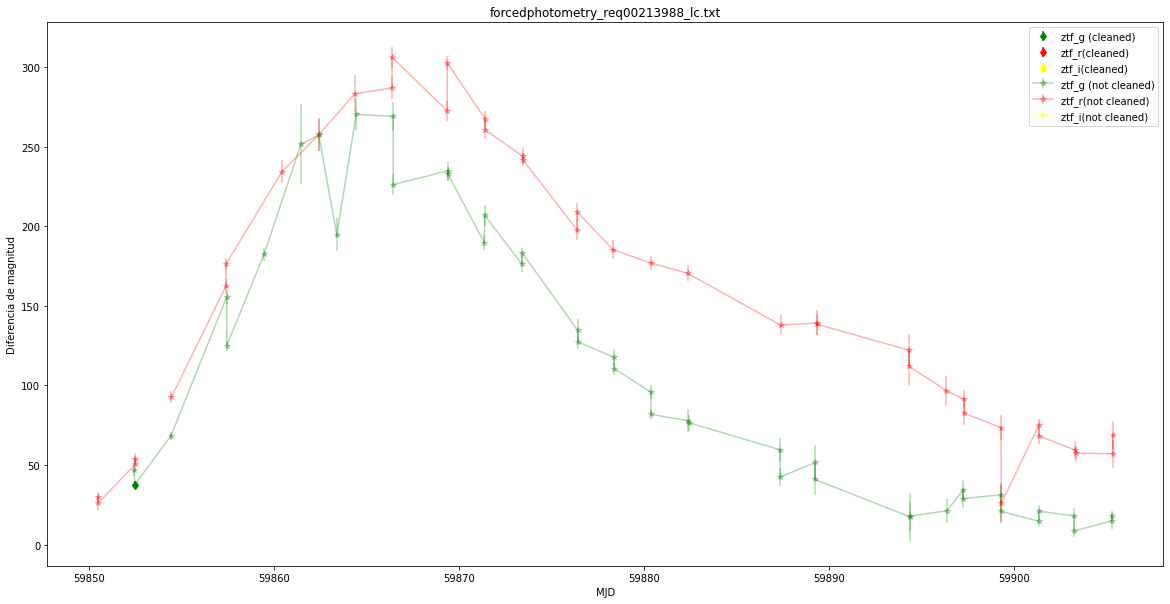

dirección: LCs/forcedphotometry_req00213989_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 53


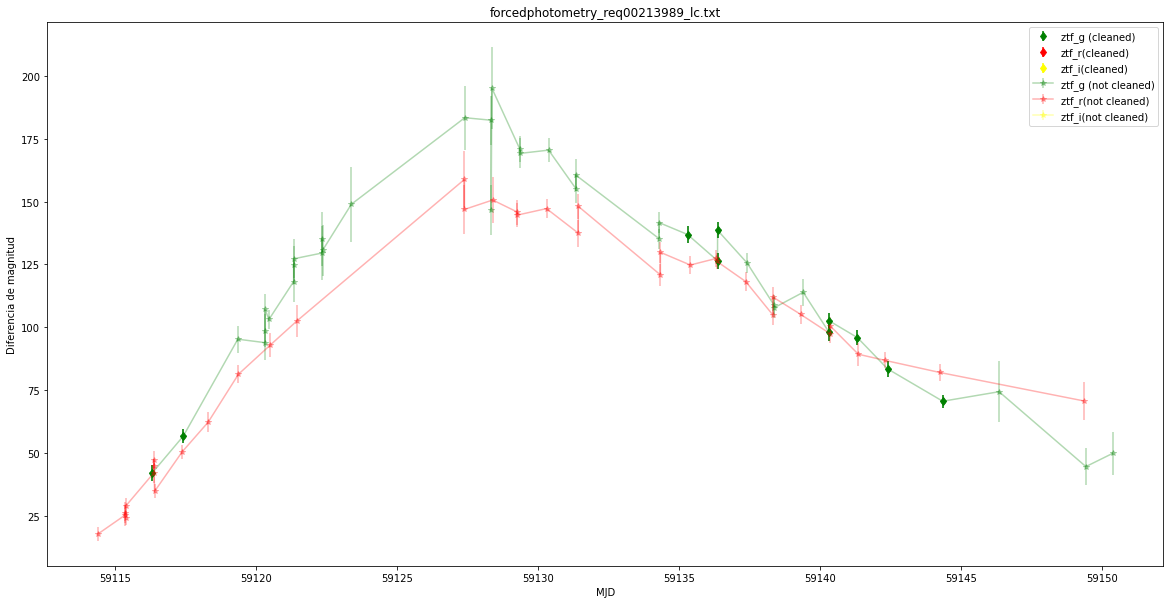

dirección: LCs/forcedphotometry_req00213990_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 54


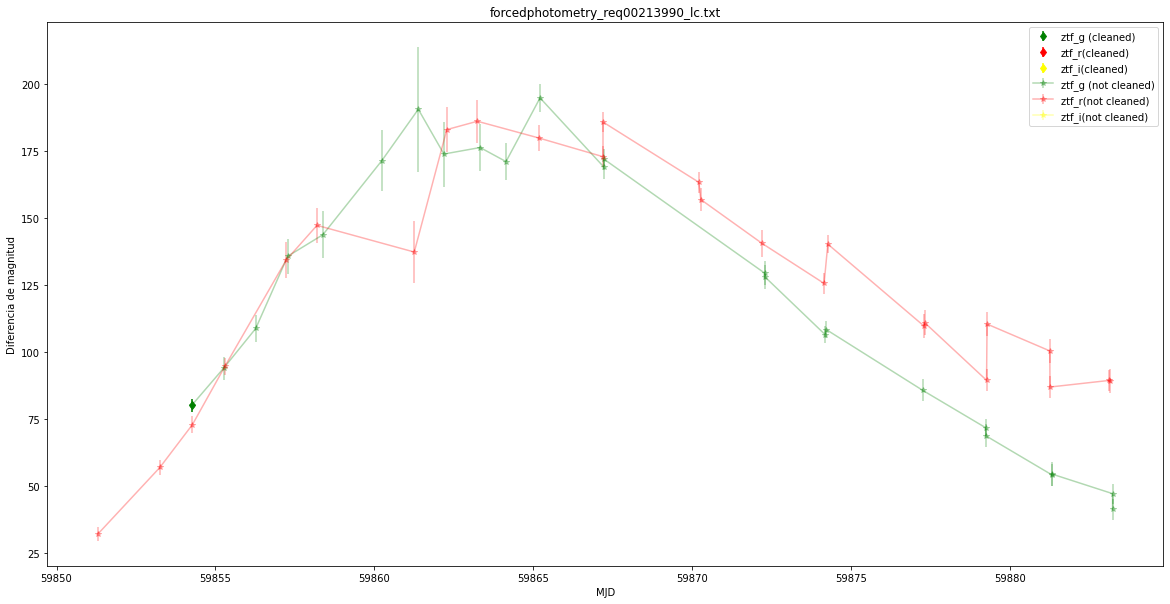

dirección: LCs/forcedphotometry_req00213991_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 55


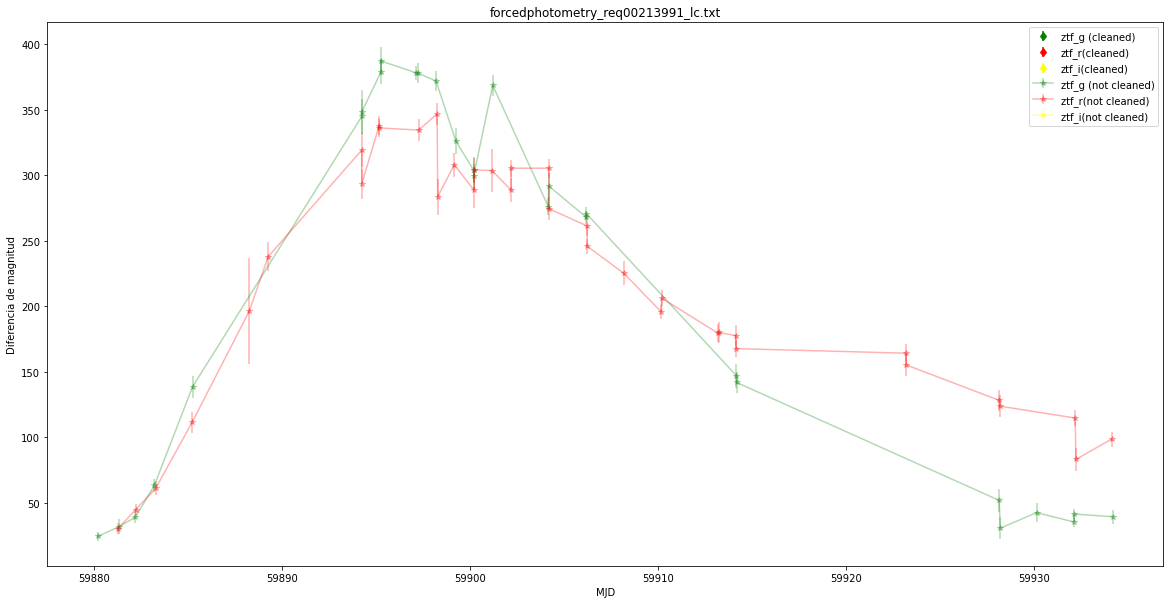

dirección: LCs/forcedphotometry_req00213992_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 56


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


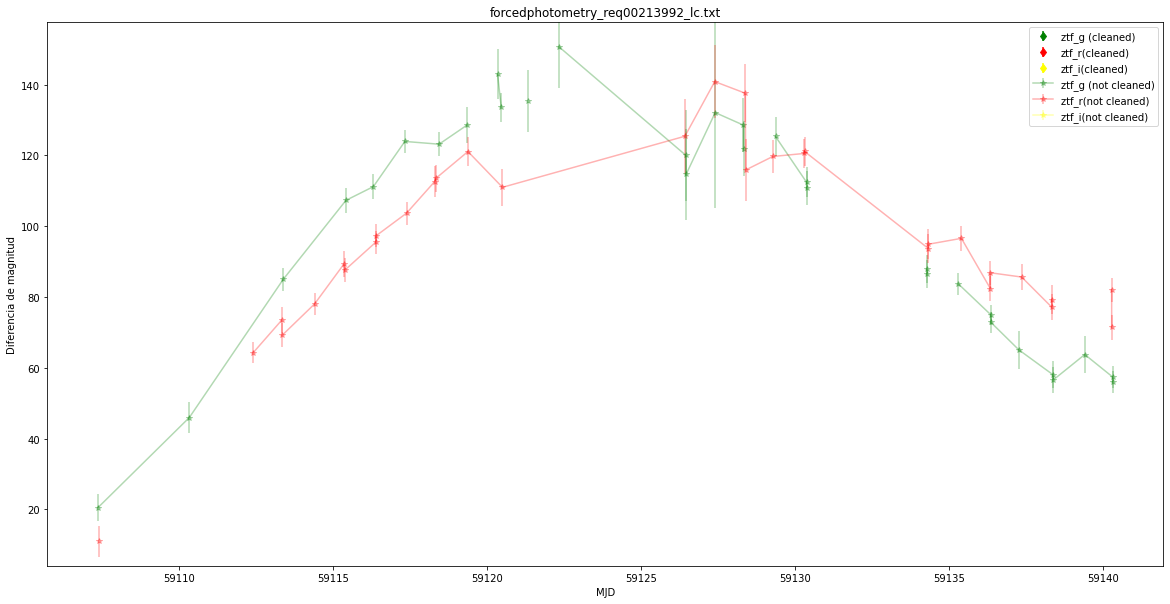

dirección: LCs/forcedphotometry_req00213993_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 57


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


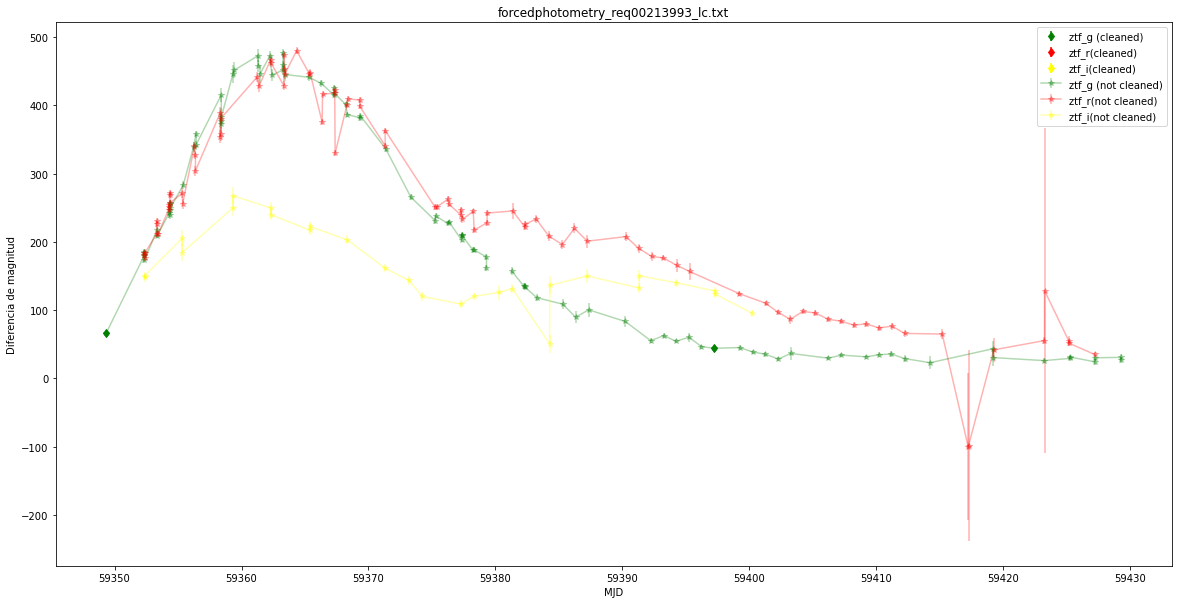

dirección: LCs/forcedphotometry_req00213994_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 58


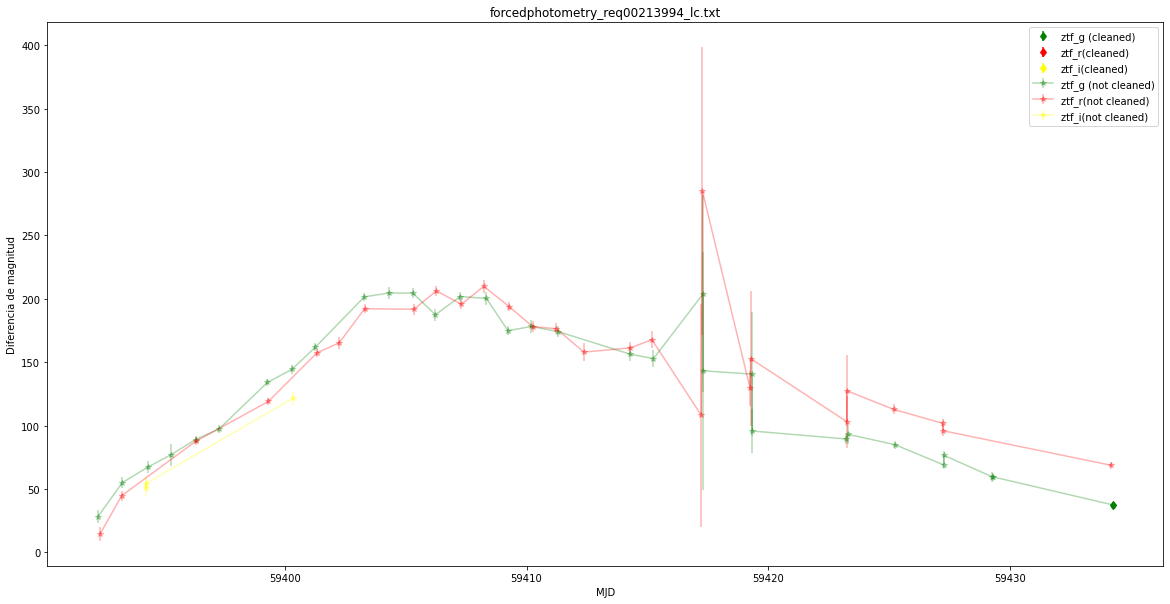

dirección: LCs/forcedphotometry_req00213995_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 59


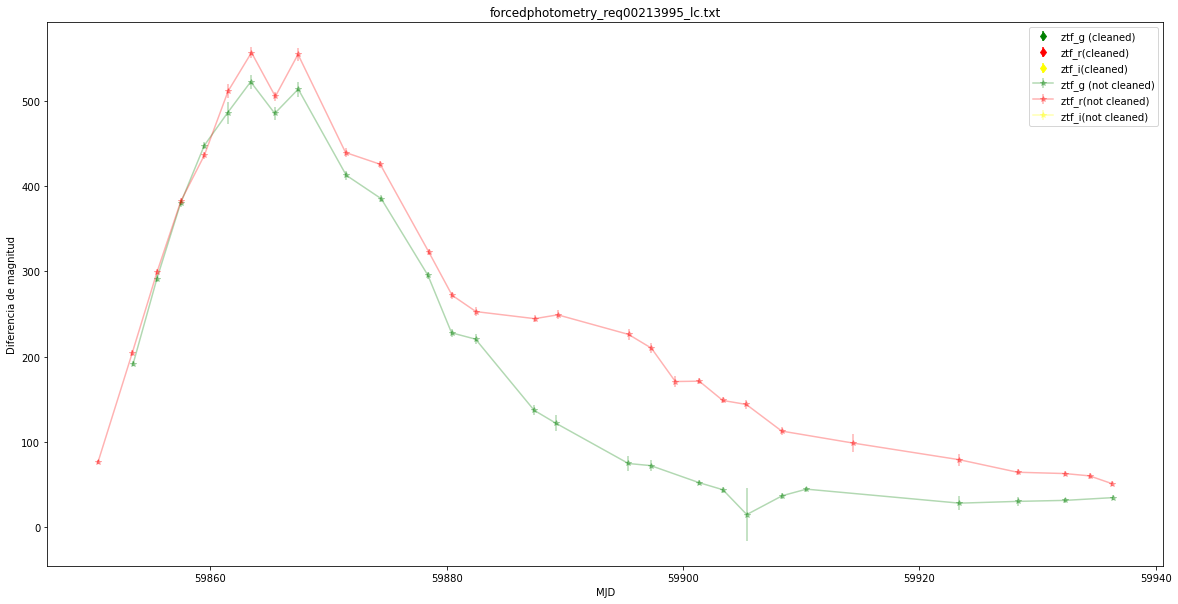

dirección: LCs/forcedphotometry_req00213996_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 60


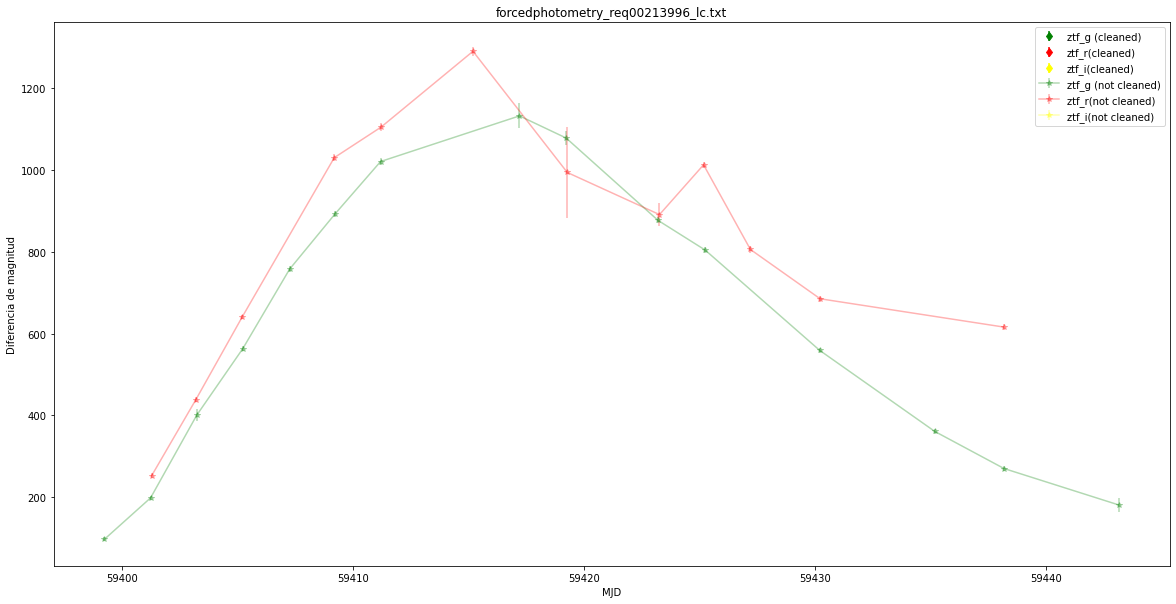

dirección: LCs/forcedphotometry_req00213997_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 61


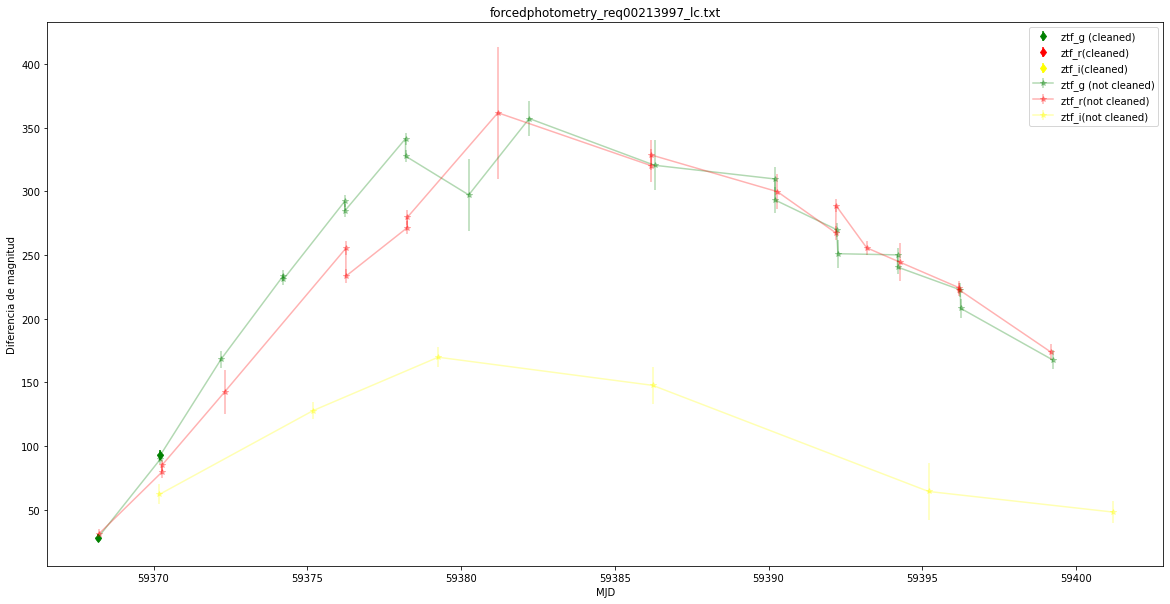

dirección: LCs/forcedphotometry_req00213998_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 62


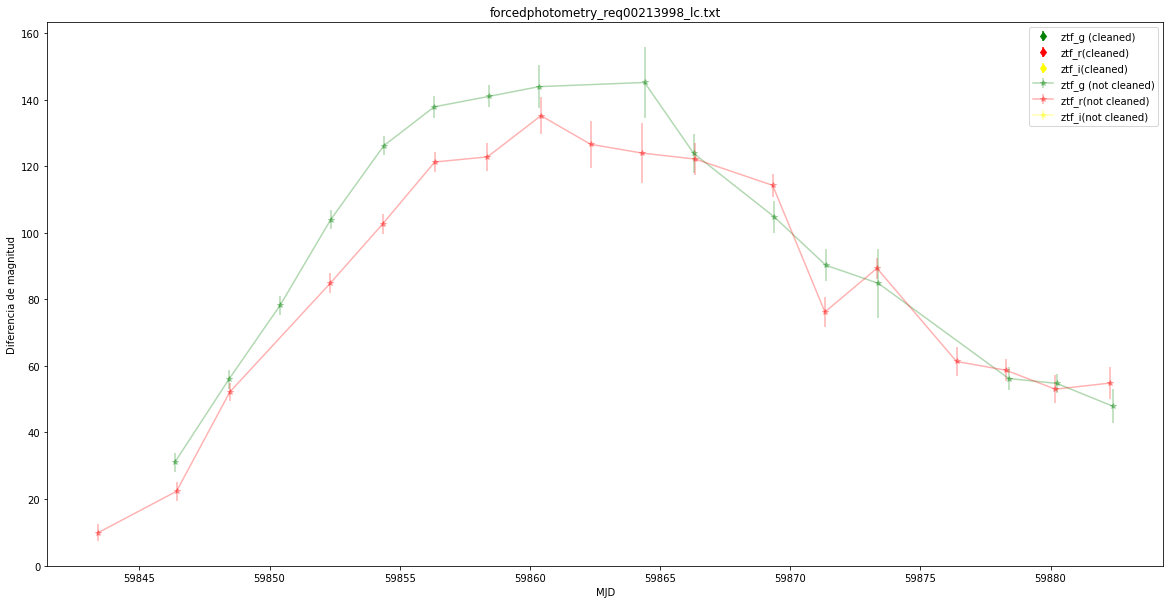

dirección: LCs/forcedphotometry_req00213999_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 63


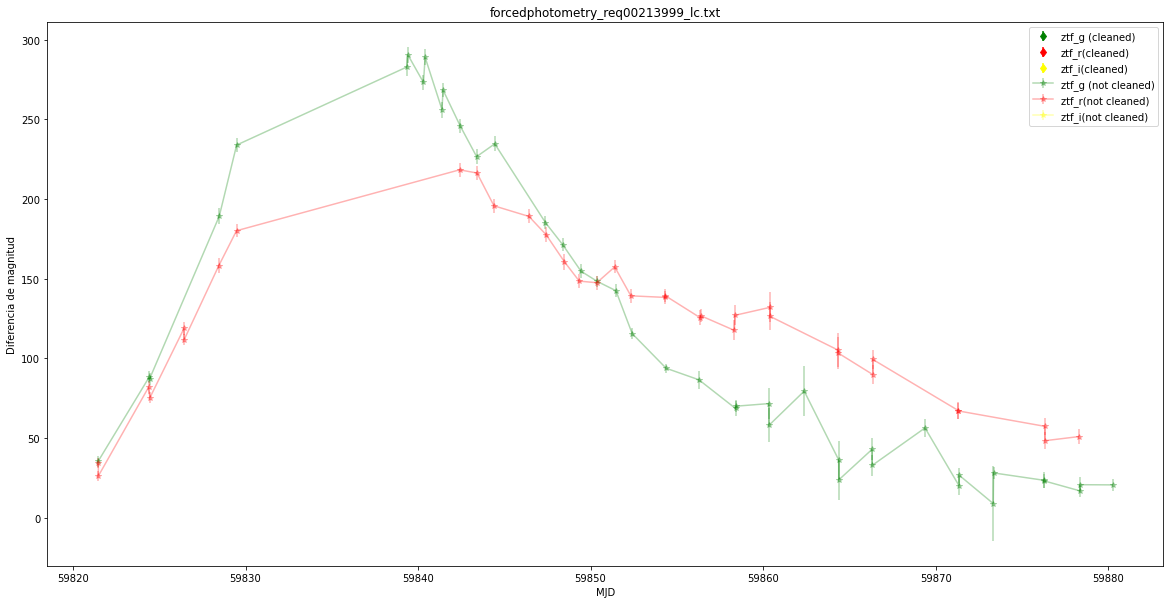

dirección: LCs/forcedphotometry_req00214000_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 64


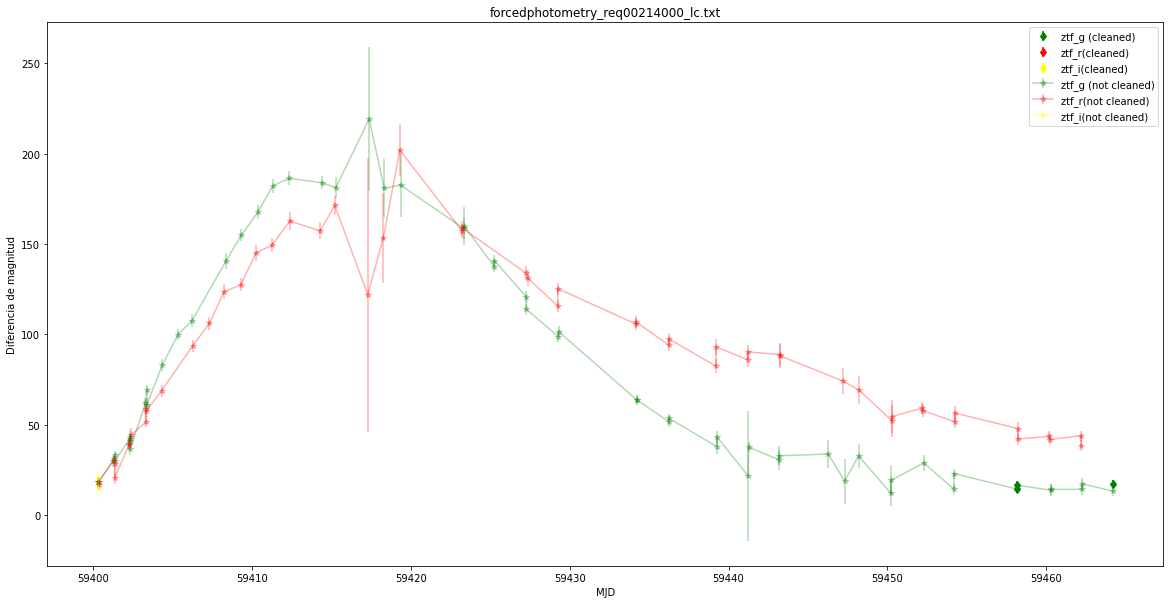

dirección: LCs/forcedphotometry_req00214001_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 65


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


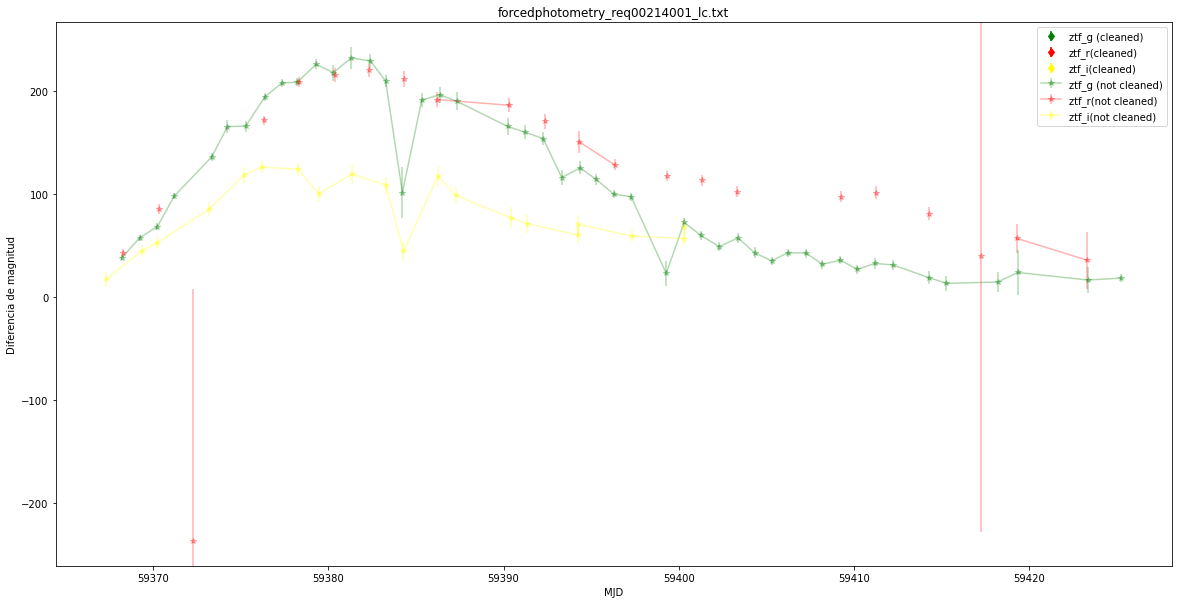

dirección: LCs/forcedphotometry_req00214002_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 66


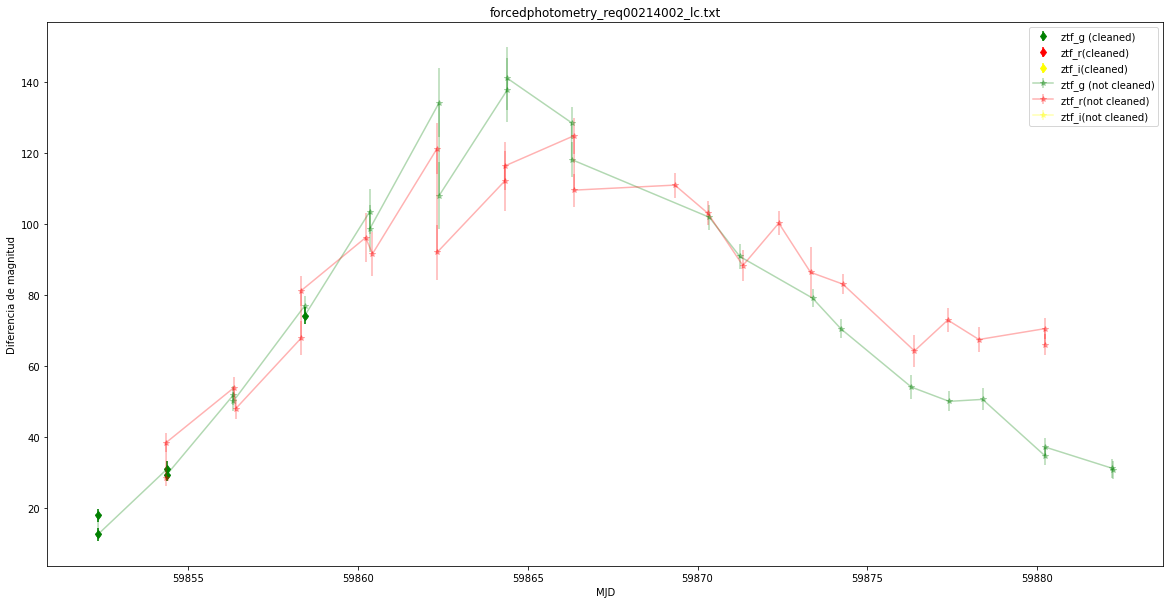

dirección: LCs/forcedphotometry_req00214003_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 67


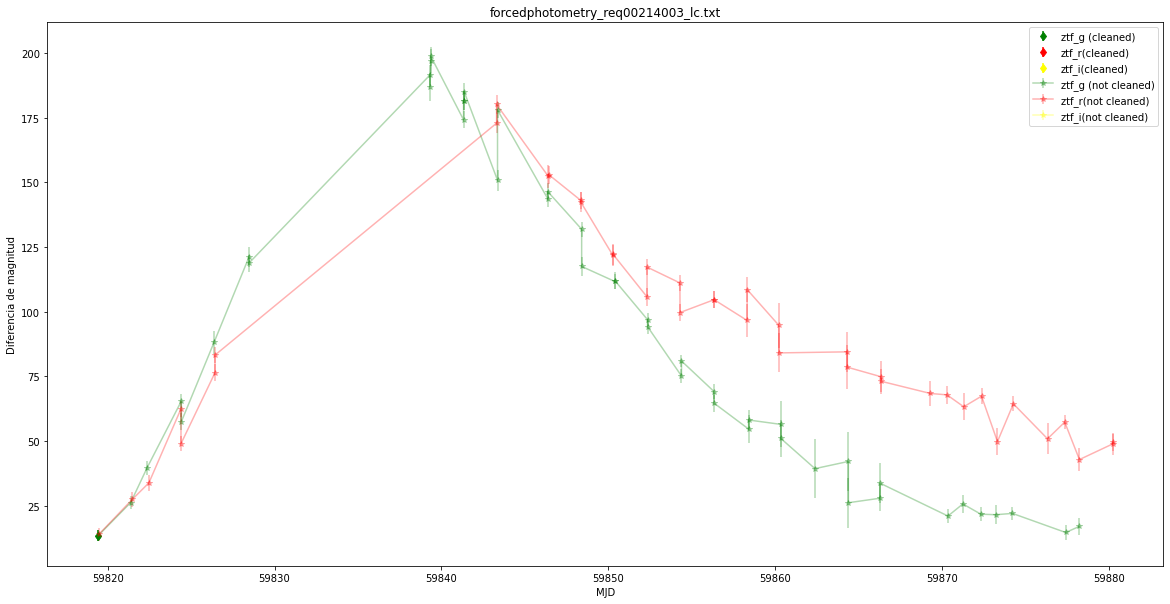

dirección: LCs/forcedphotometry_req00214004_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 68


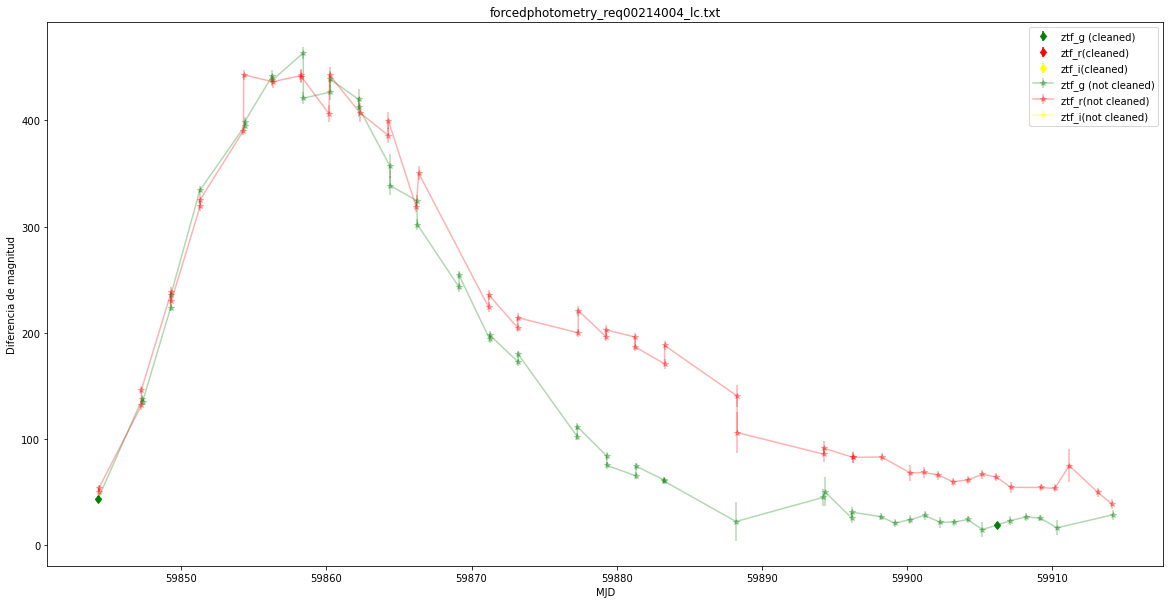

dirección: LCs/forcedphotometry_req00214005_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 69


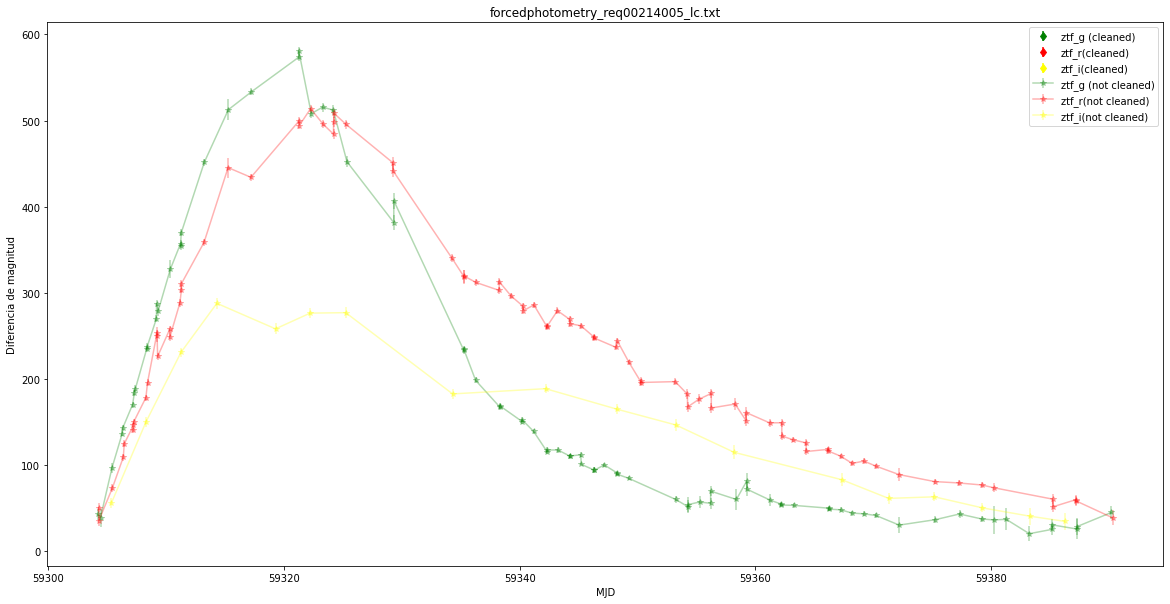

dirección: LCs/forcedphotometry_req00214006_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 70


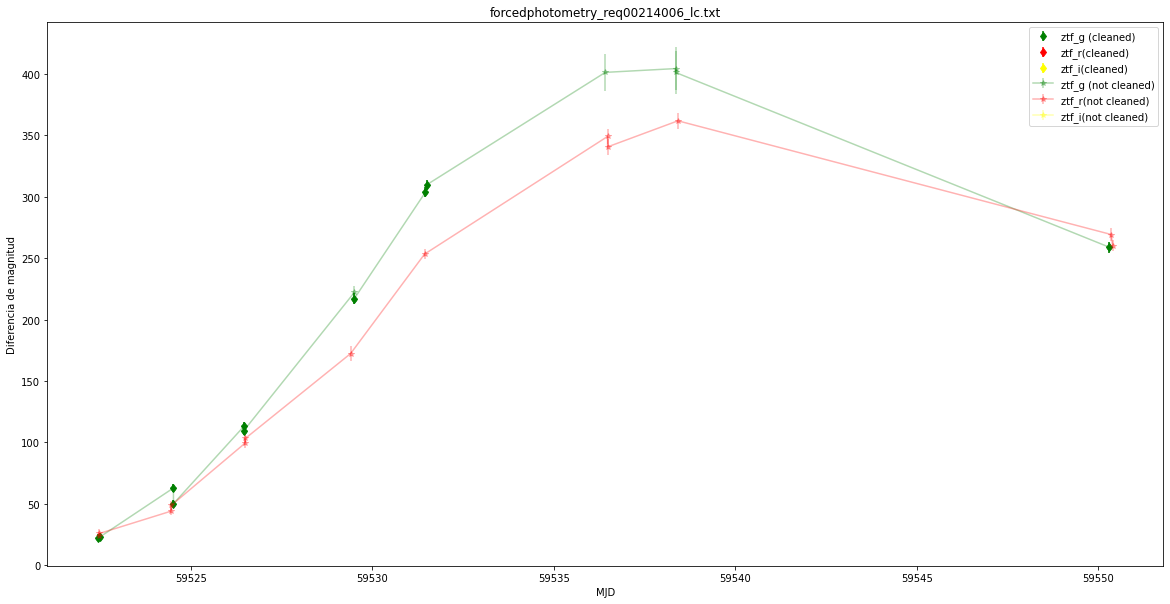

dirección: LCs/forcedphotometry_req00214007_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 71


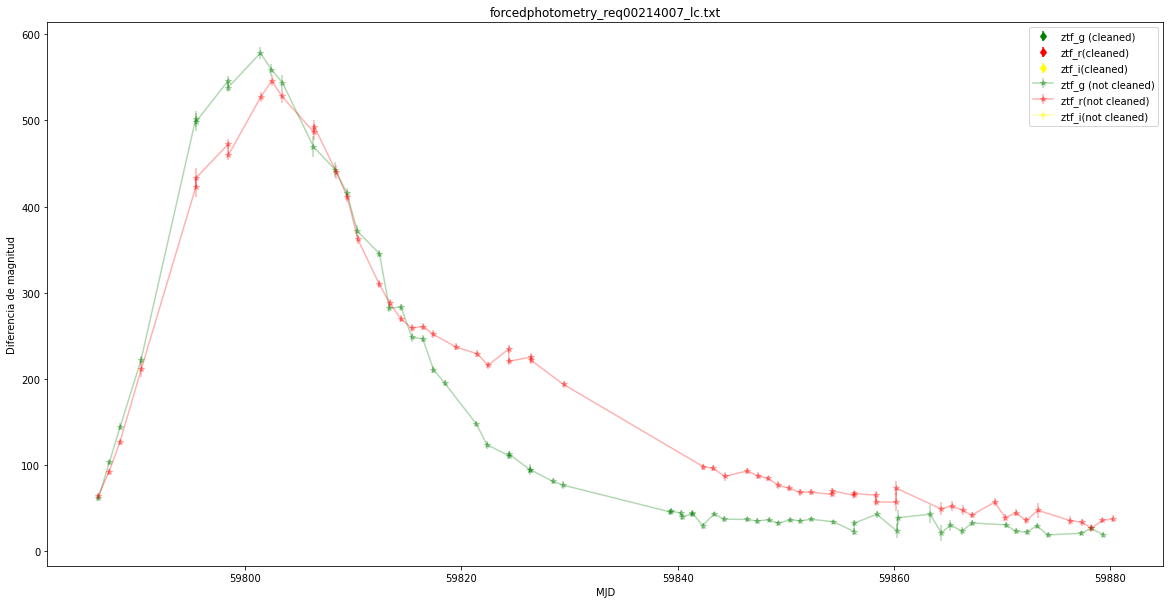

dirección: LCs/forcedphotometry_req00214008_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 72


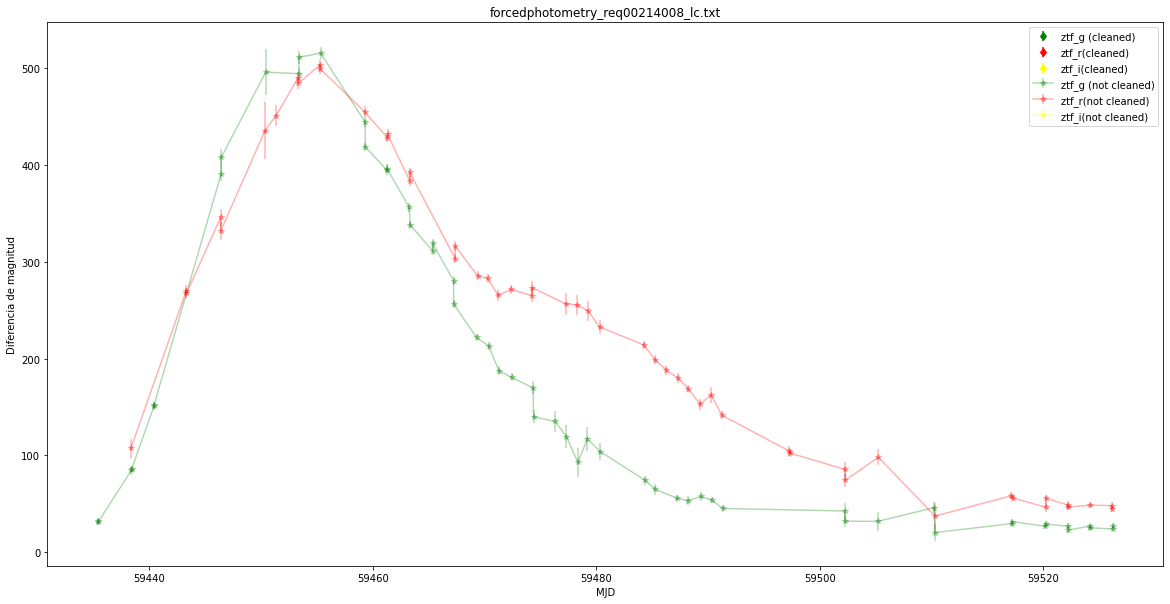

dirección: LCs/forcedphotometry_req00214009_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 73


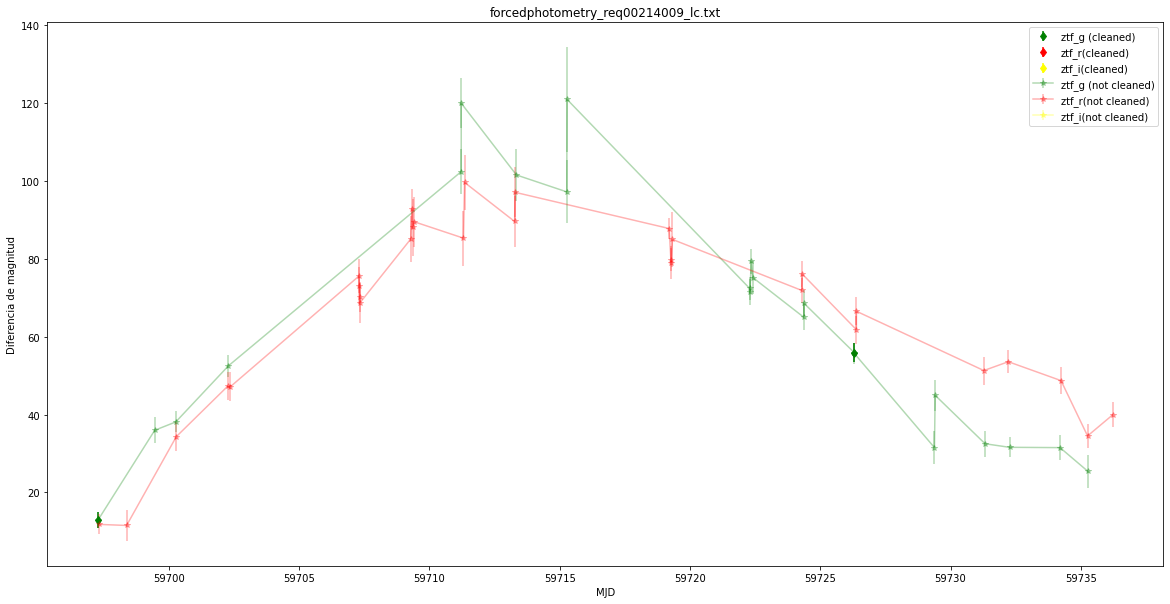

dirección: LCs/forcedphotometry_req00214010_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 74


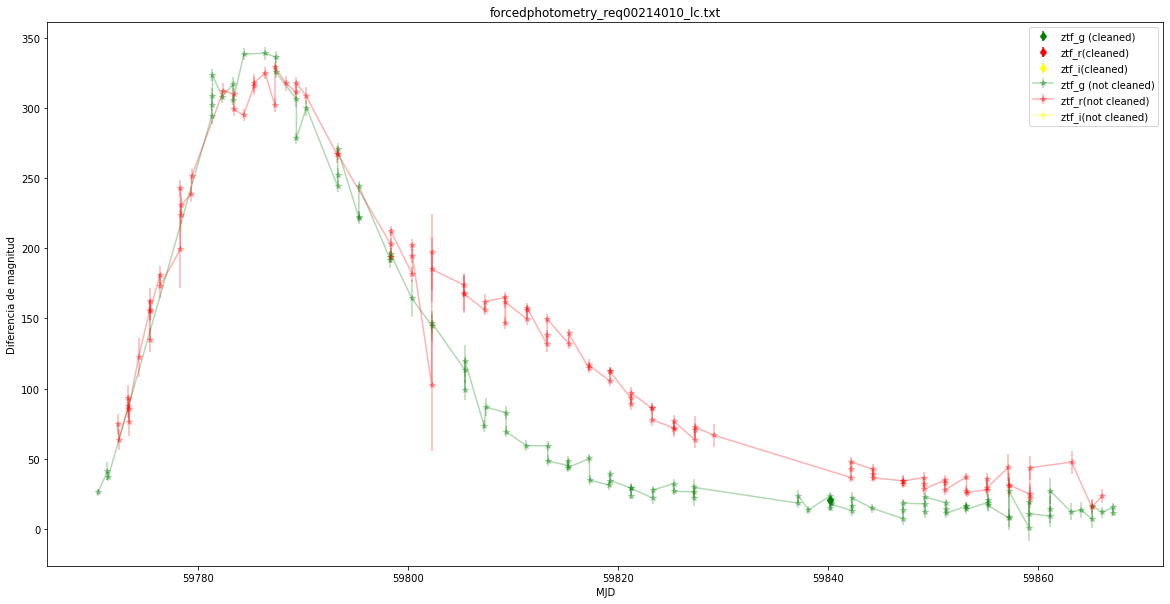

dirección: LCs/forcedphotometry_req00214011_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 75


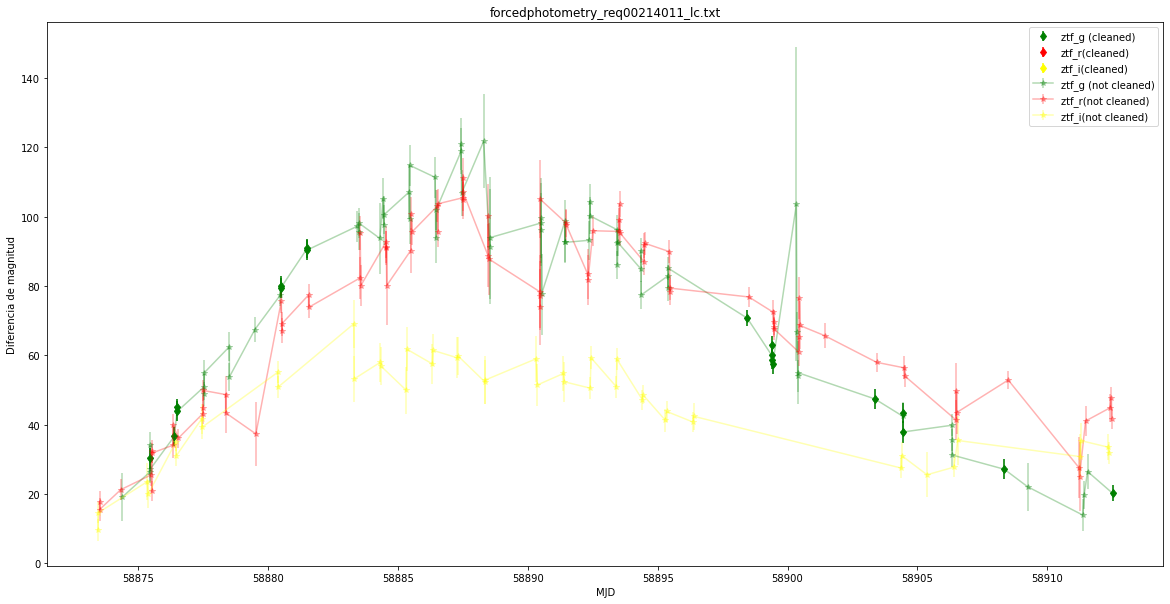

dirección: LCs/forcedphotometry_req00214012_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 76


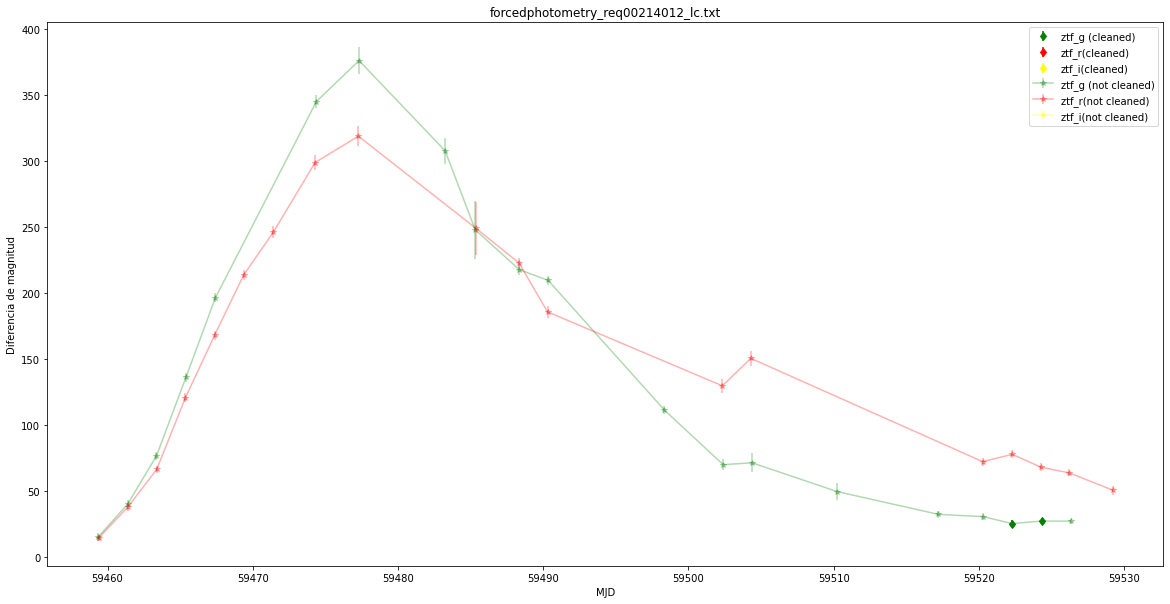

dirección: LCs/forcedphotometry_req00214013_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 77


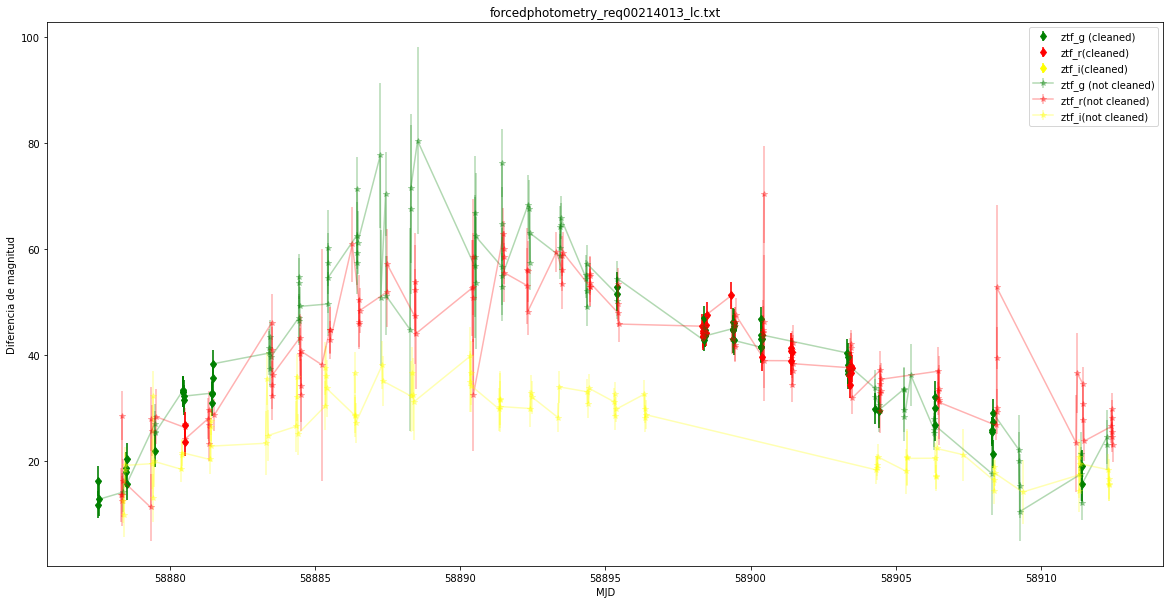

dirección: LCs/forcedphotometry_req00214014_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 78


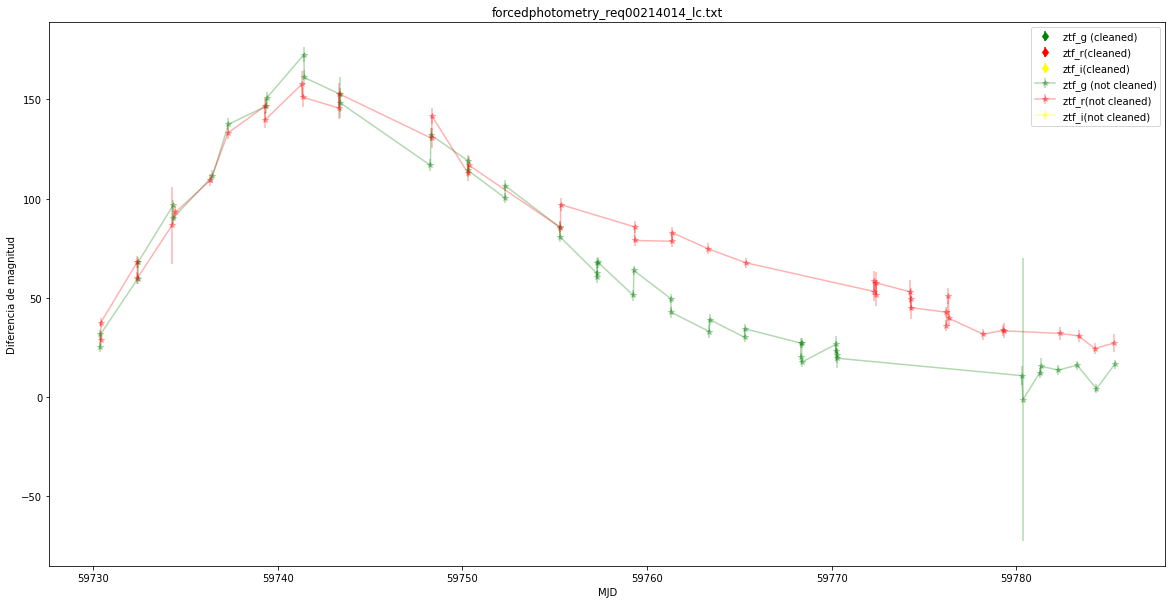

dirección: LCs/forcedphotometry_req00214015_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 79


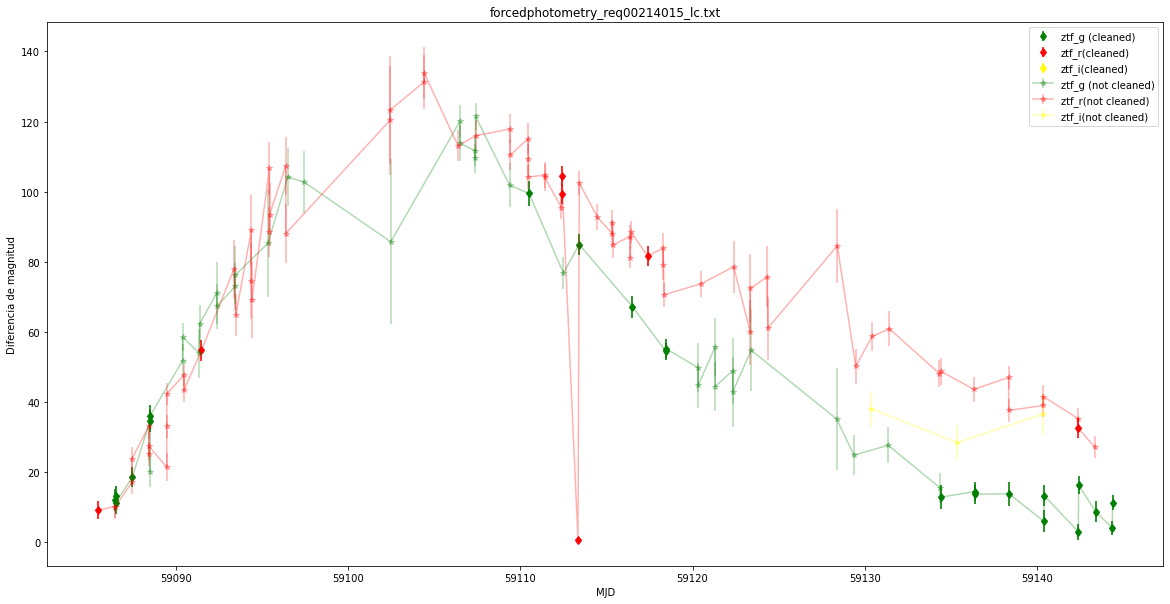

dirección: LCs/forcedphotometry_req00214016_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 80


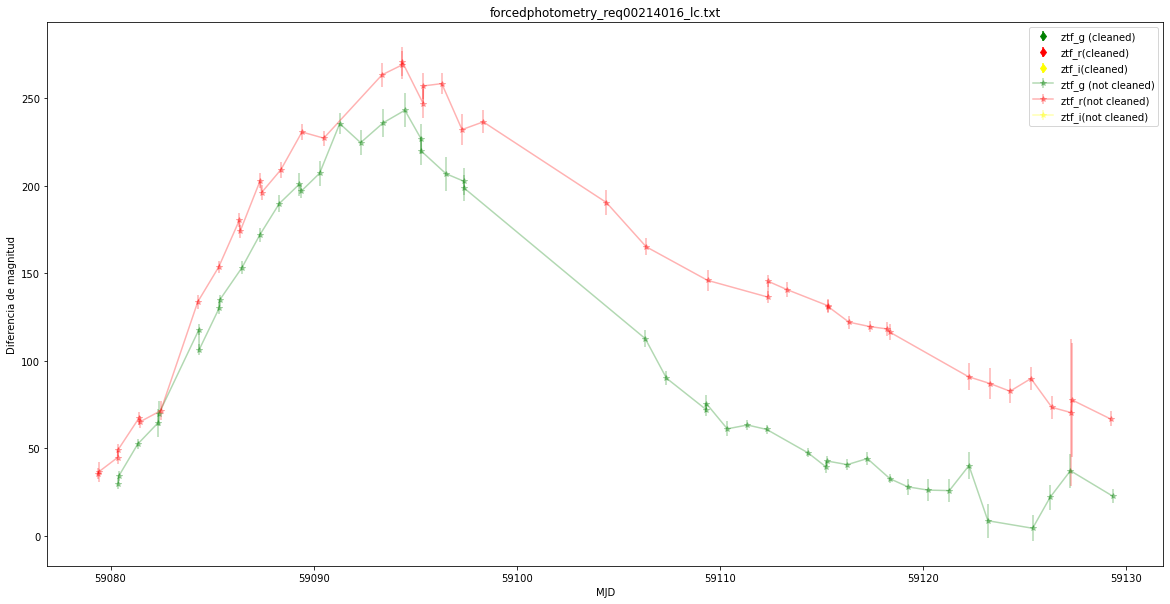

dirección: LCs/forcedphotometry_req00214017_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 81


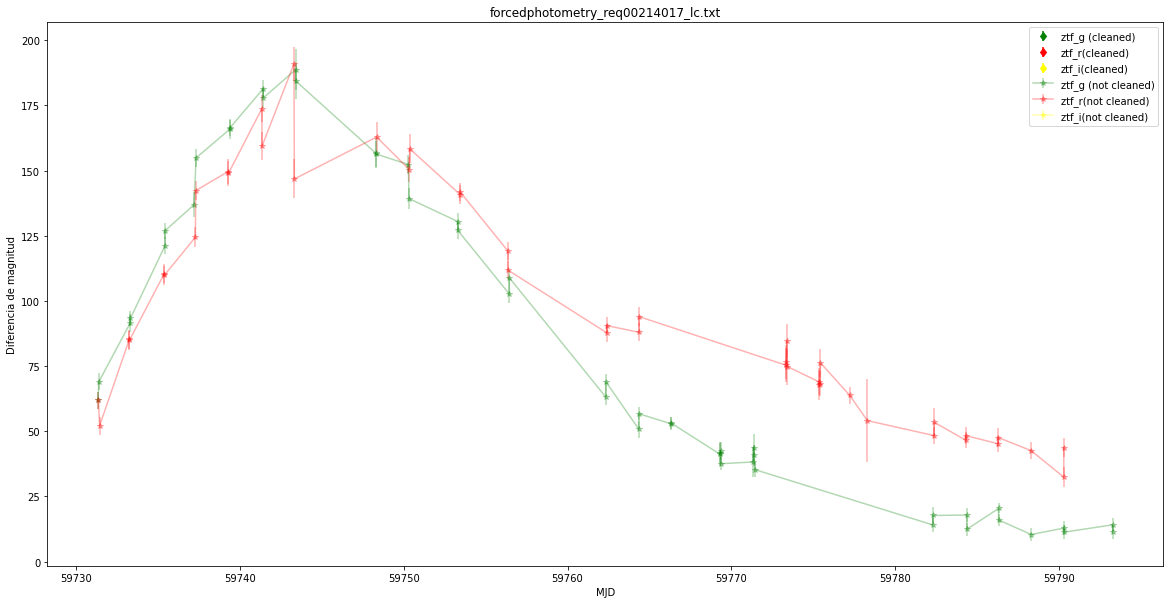

dirección: LCs/forcedphotometry_req00214018_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 82


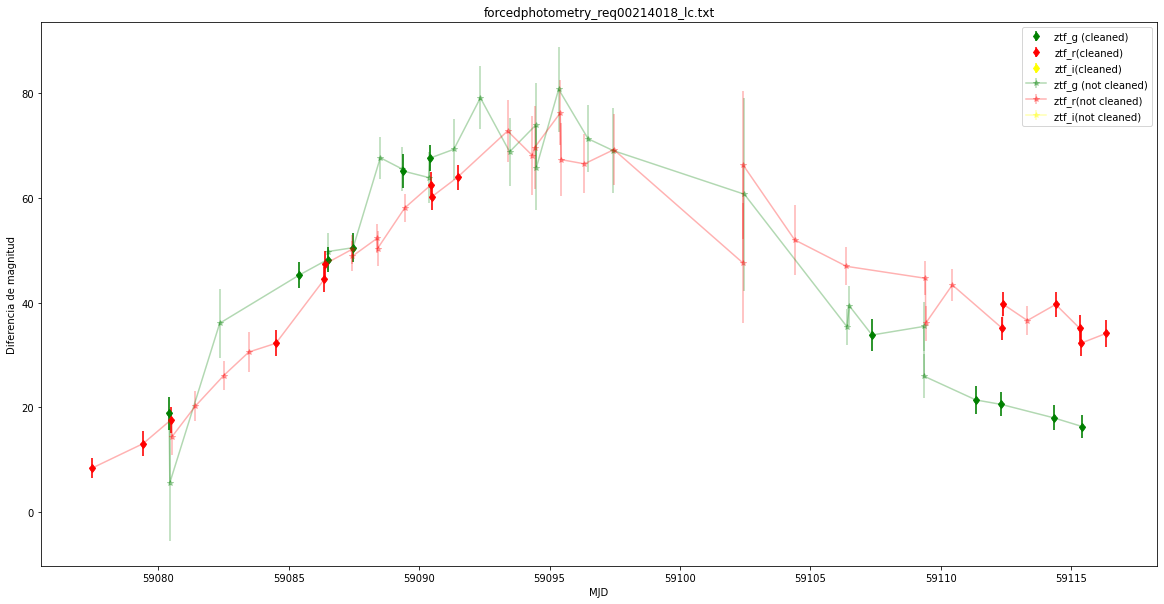

dirección: LCs/forcedphotometry_req00214019_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 83


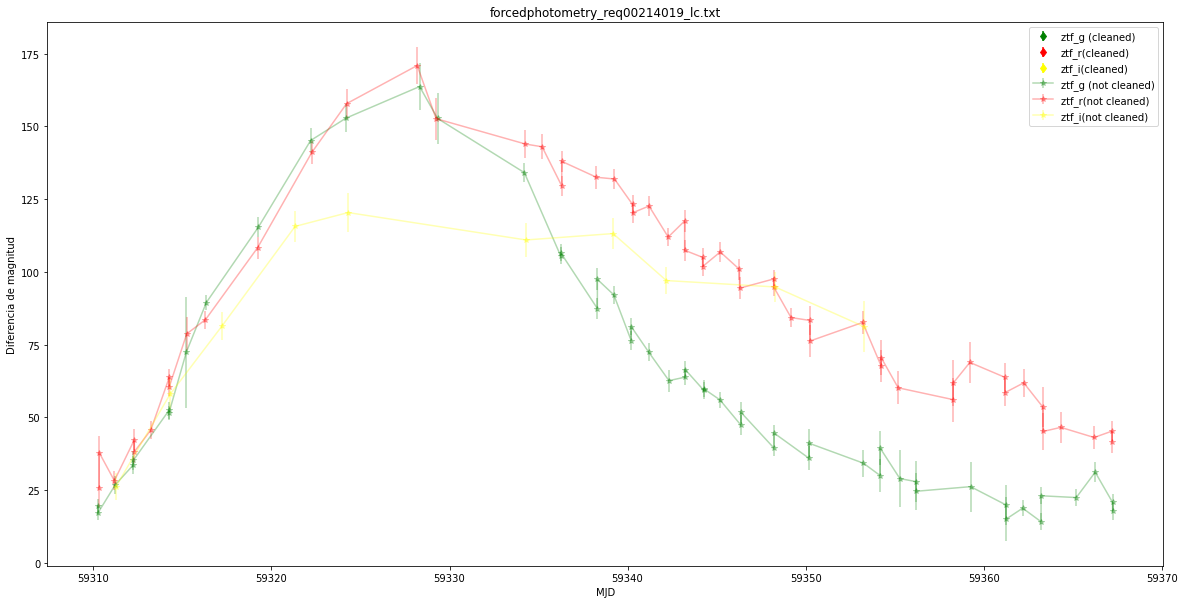

dirección: LCs/forcedphotometry_req00214020_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 84


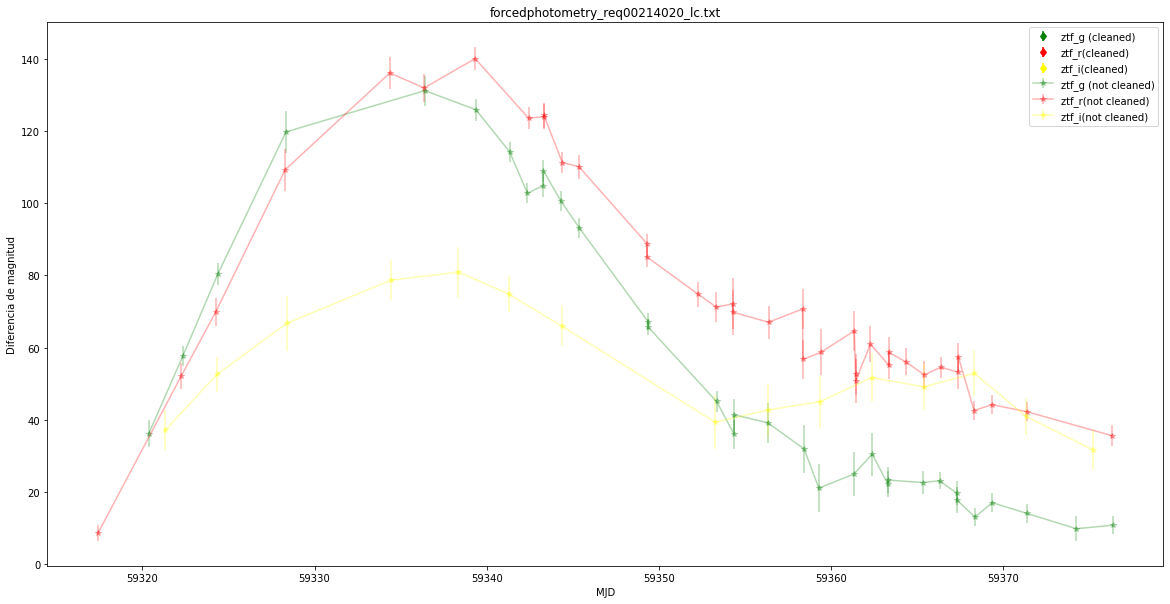

dirección: LCs/forcedphotometry_req00214021_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 85


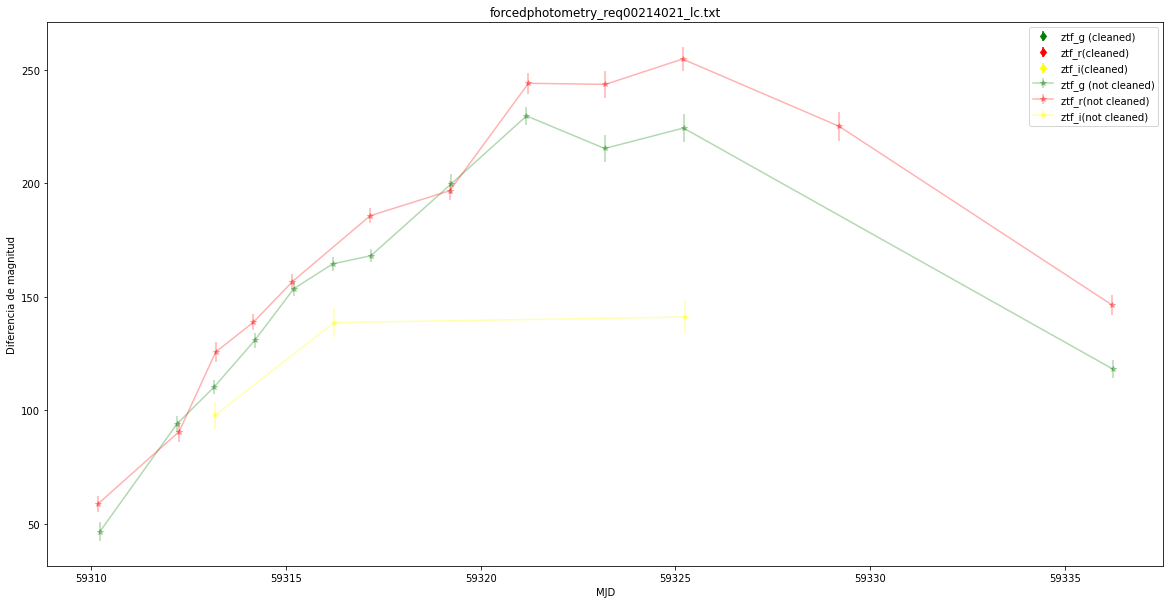

dirección: LCs/forcedphotometry_req00214022_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 86


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


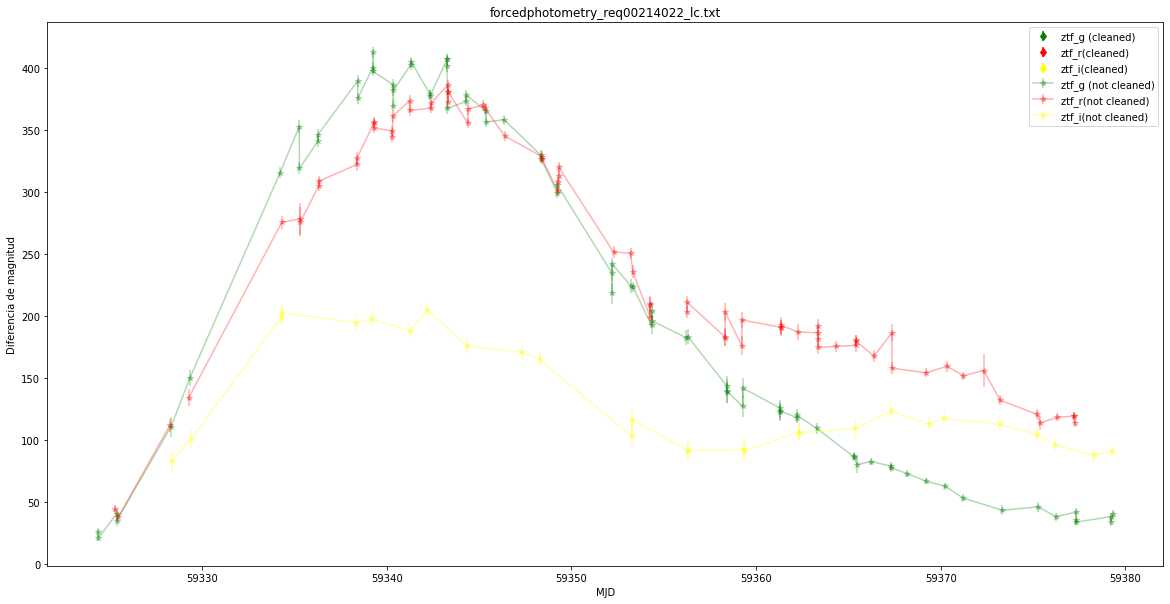

dirección: LCs/forcedphotometry_req00214023_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 87


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


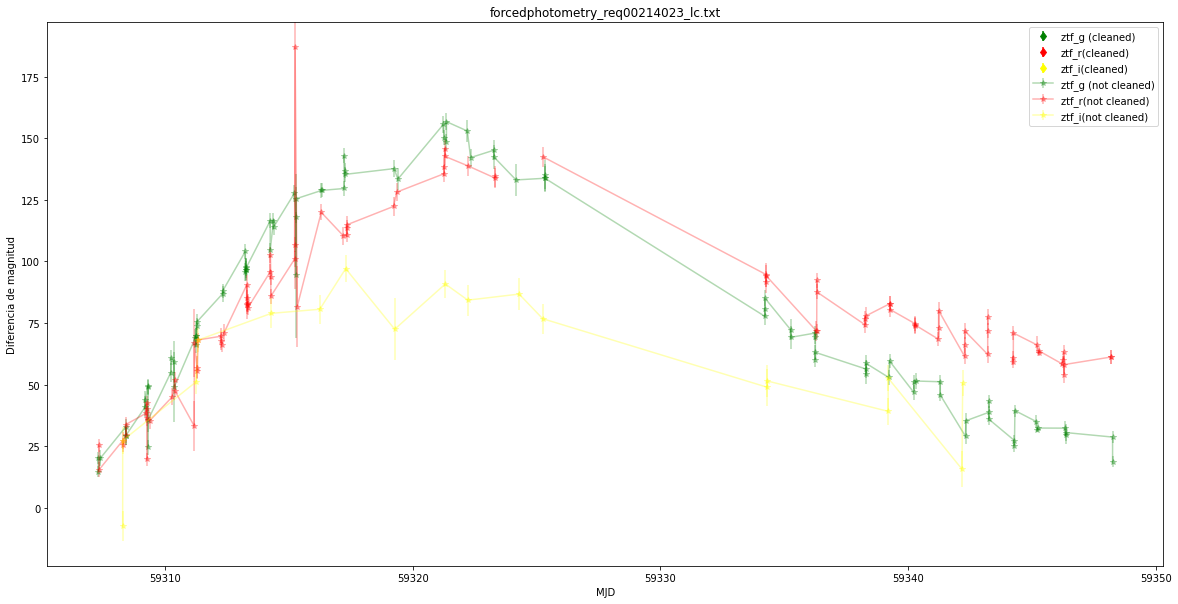

dirección: LCs/forcedphotometry_req00214024_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 88


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


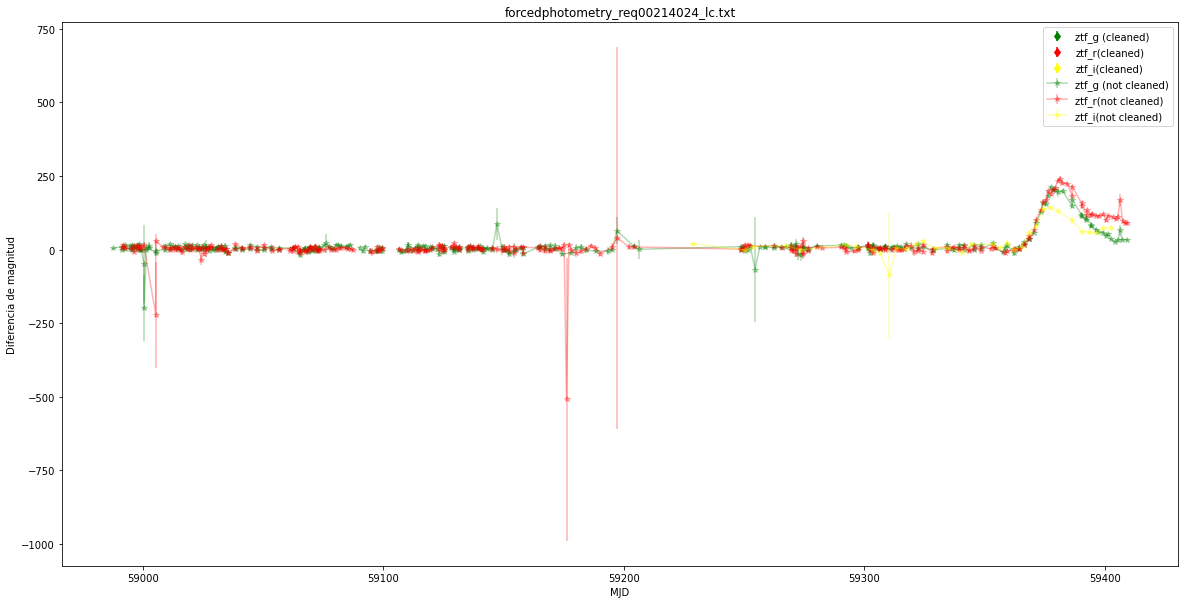

dirección: LCs/forcedphotometry_req00214025_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 89


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


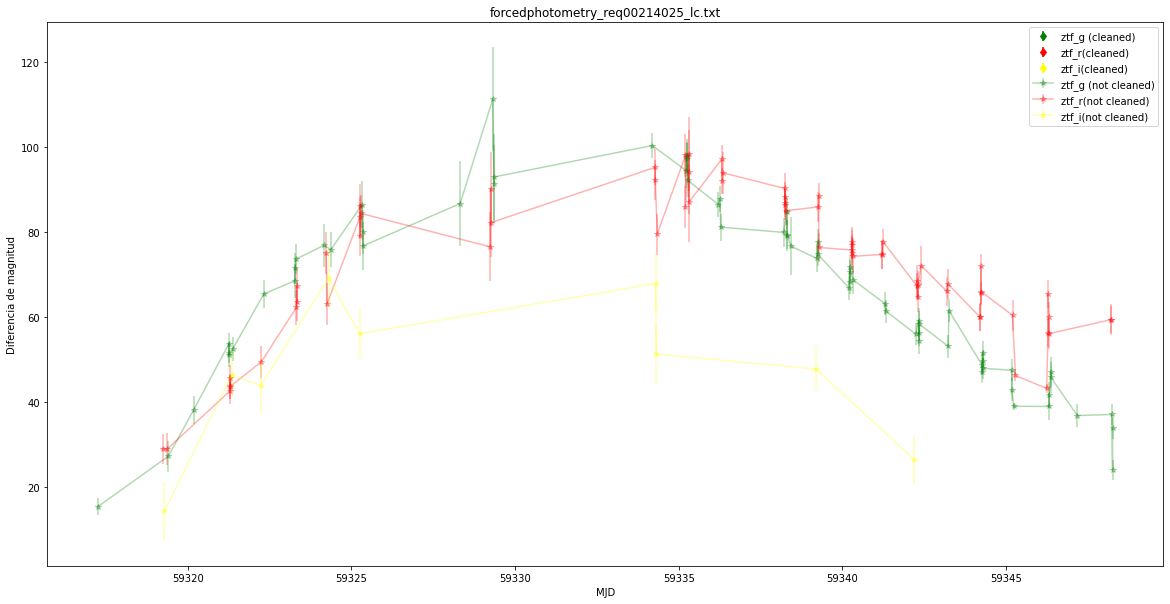

dirección: LCs/forcedphotometry_req00214026_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 90


c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\elcar\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


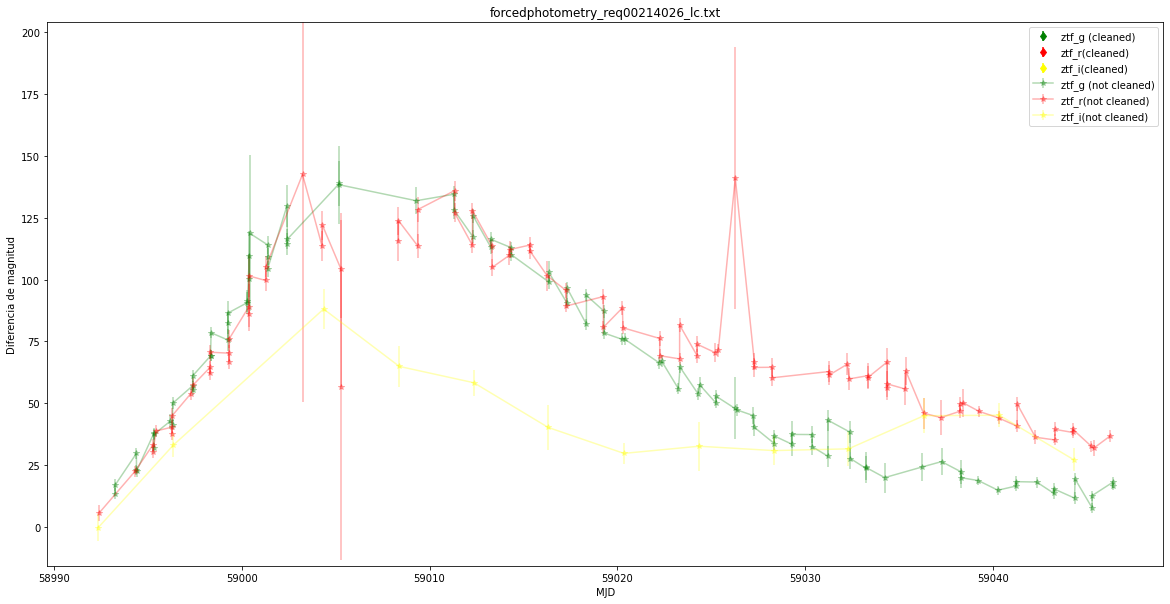

dirección: LCs/forcedphotometry_req00214027_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 91


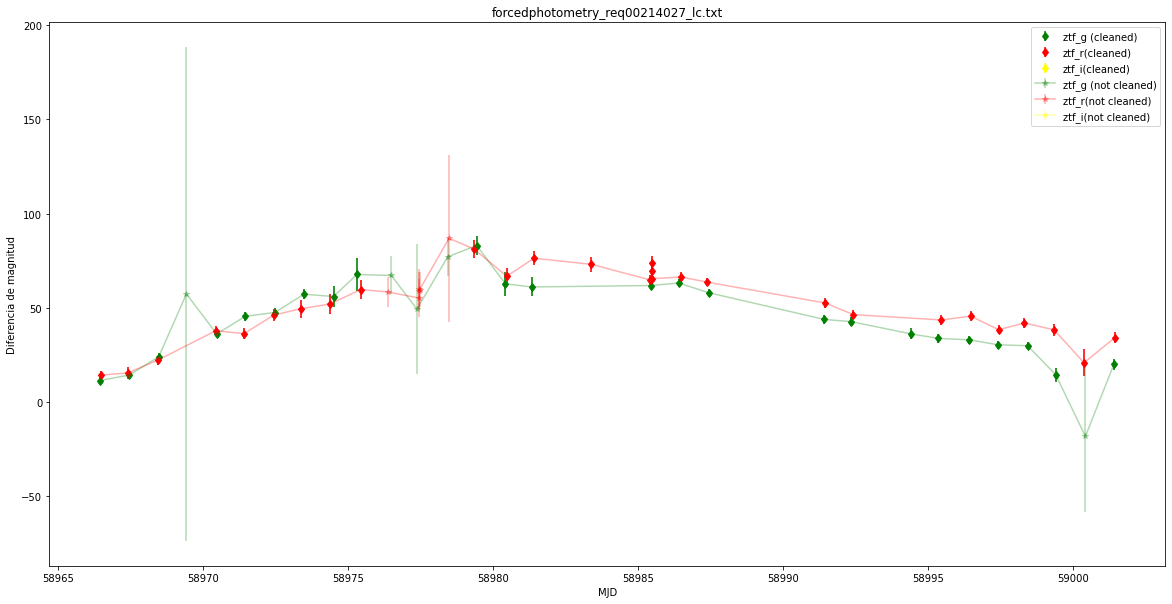

dirección: LCs/forcedphotometry_req00214028_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 92


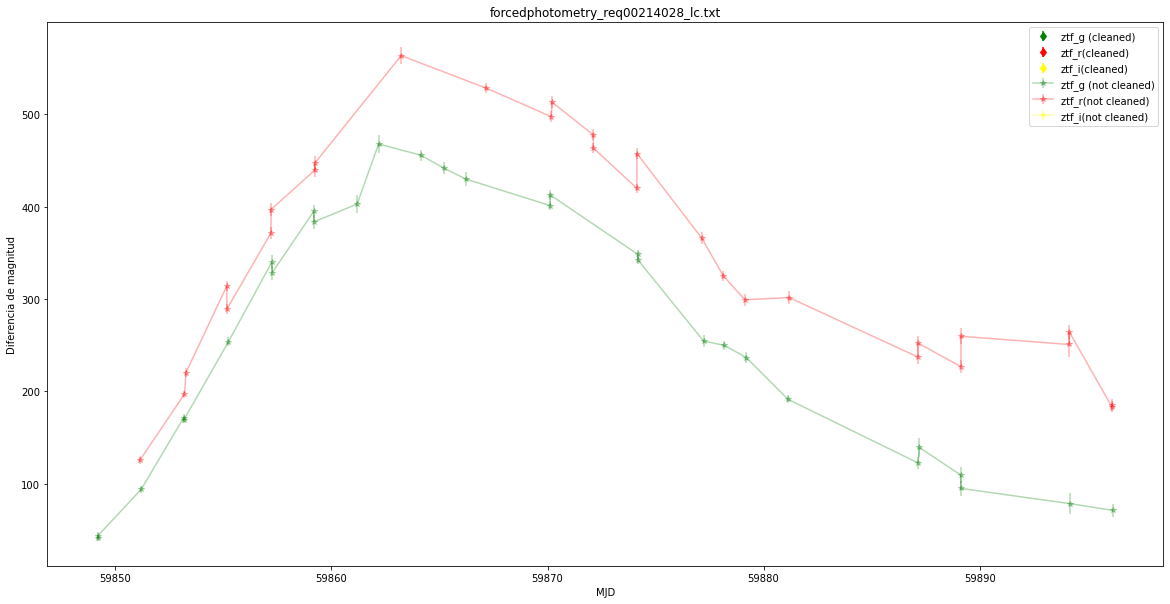

dirección: LCs/forcedphotometry_req00214029_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 93


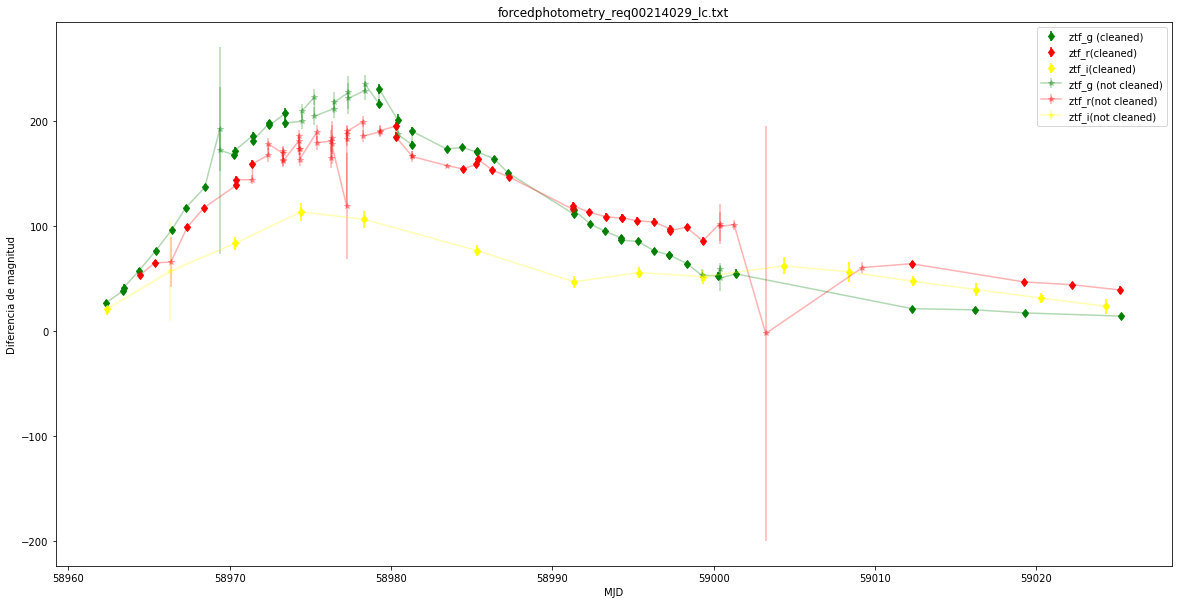

dirección: LCs/forcedphotometry_req00214030_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 94


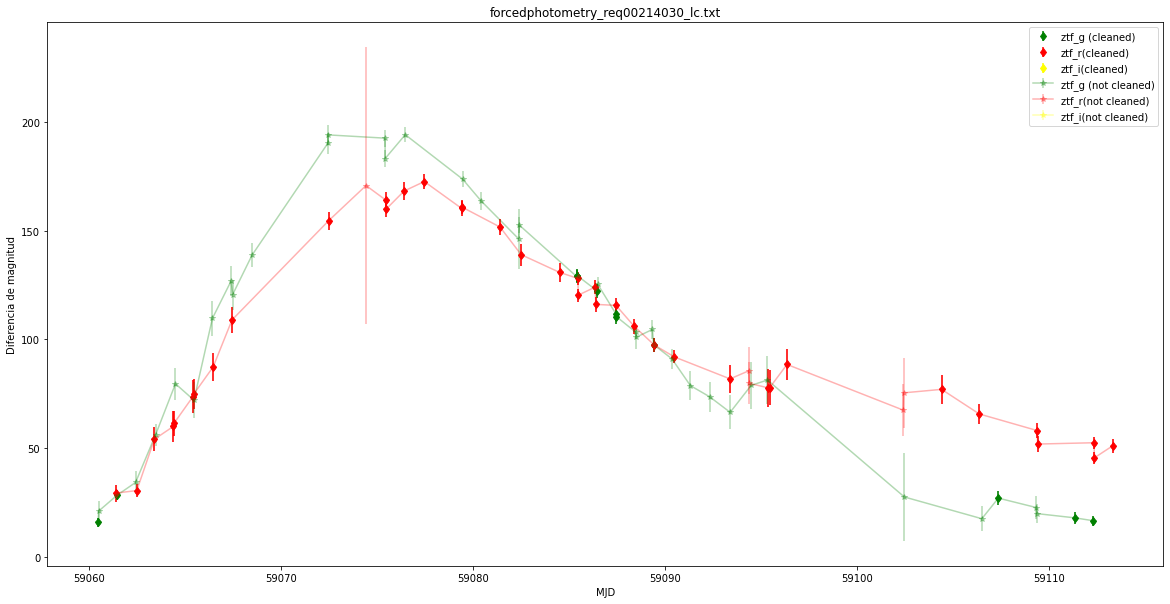

dirección: LCs/forcedphotometry_req00214031_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 95


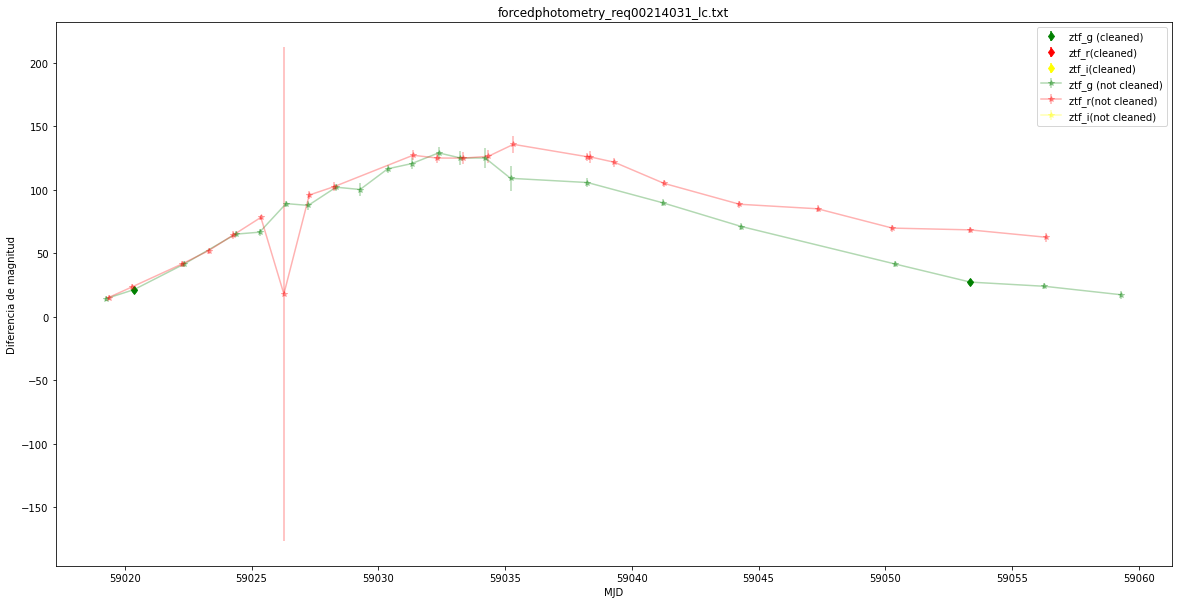

dirección: LCs/forcedphotometry_req00214032_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 96


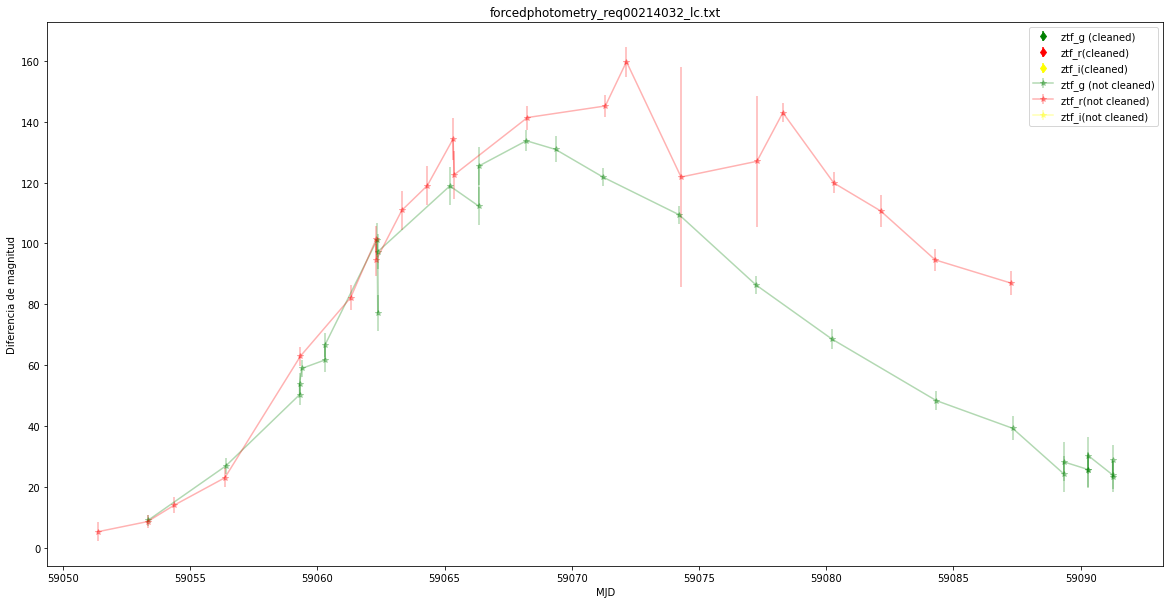

dirección: LCs/forcedphotometry_req00214033_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 97


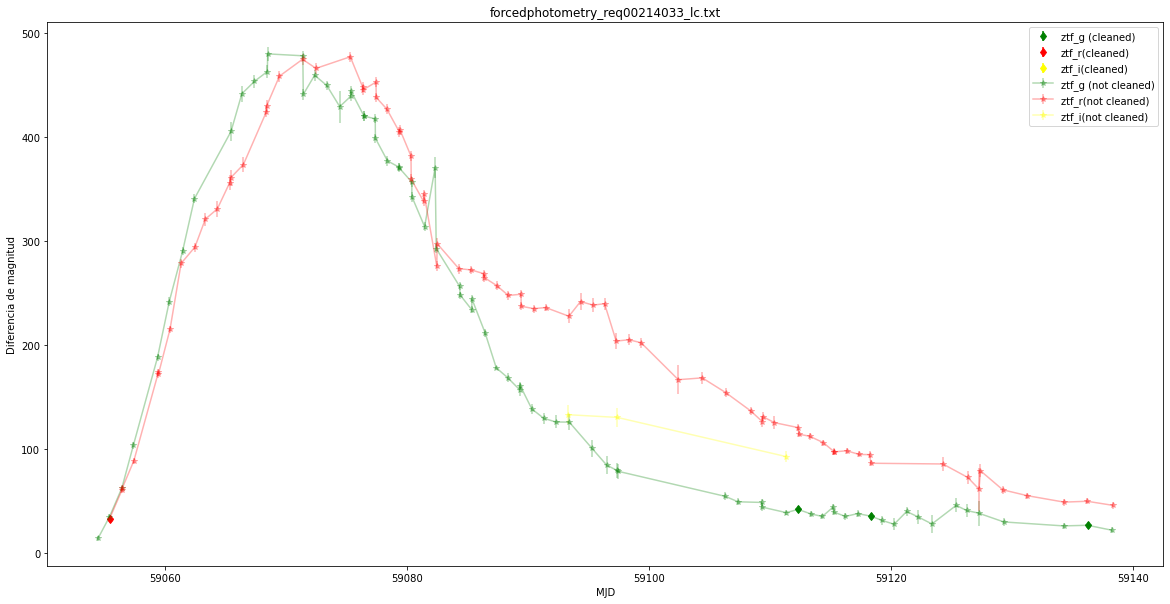

dirección: LCs/forcedphotometry_req00214034_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 98


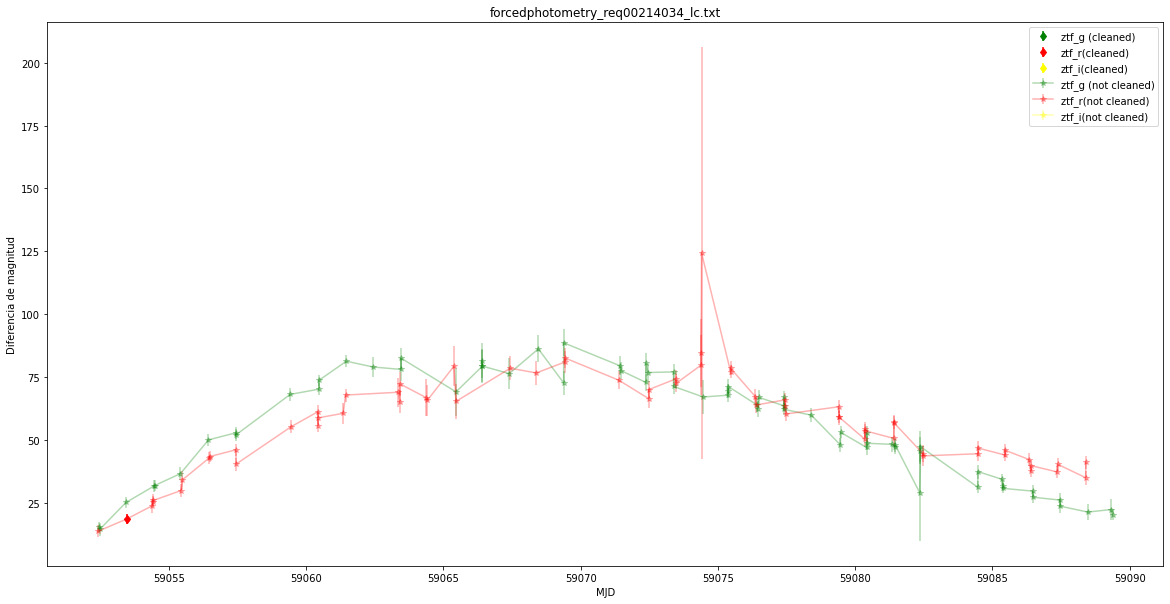

dirección: LCs/forcedphotometry_req00214035_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 99


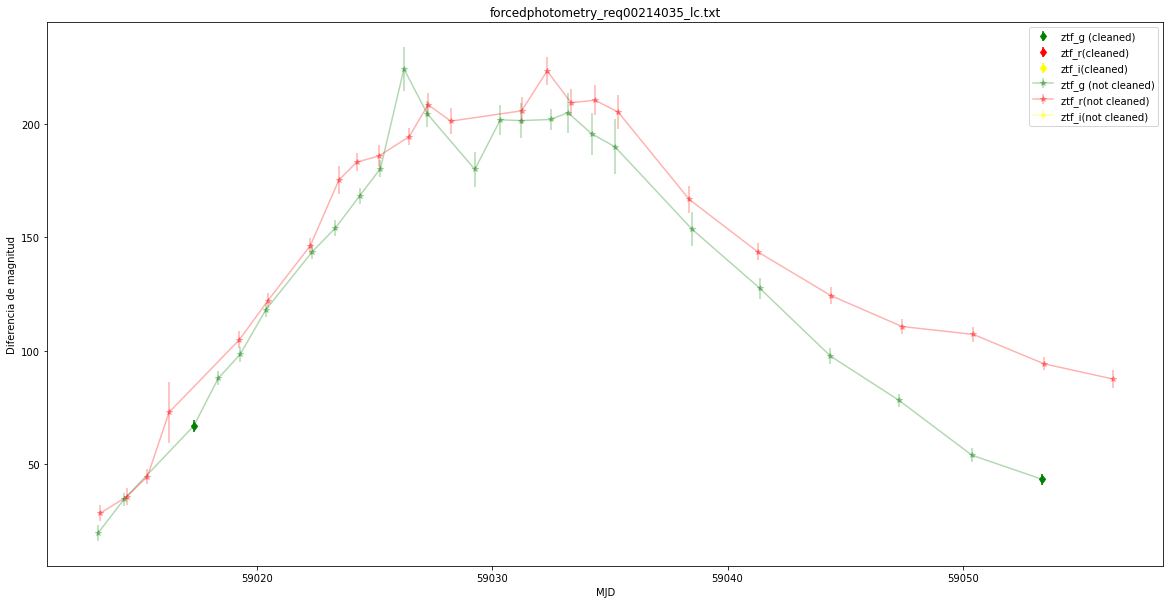

dirección: LCs/forcedphotometry_req00214036_lc.txt
Flag bad data
Clean data
Keeping only epochs with valid difference fluxes
Keeping only epochs with infobitsci=0
Graficando supernova número 100


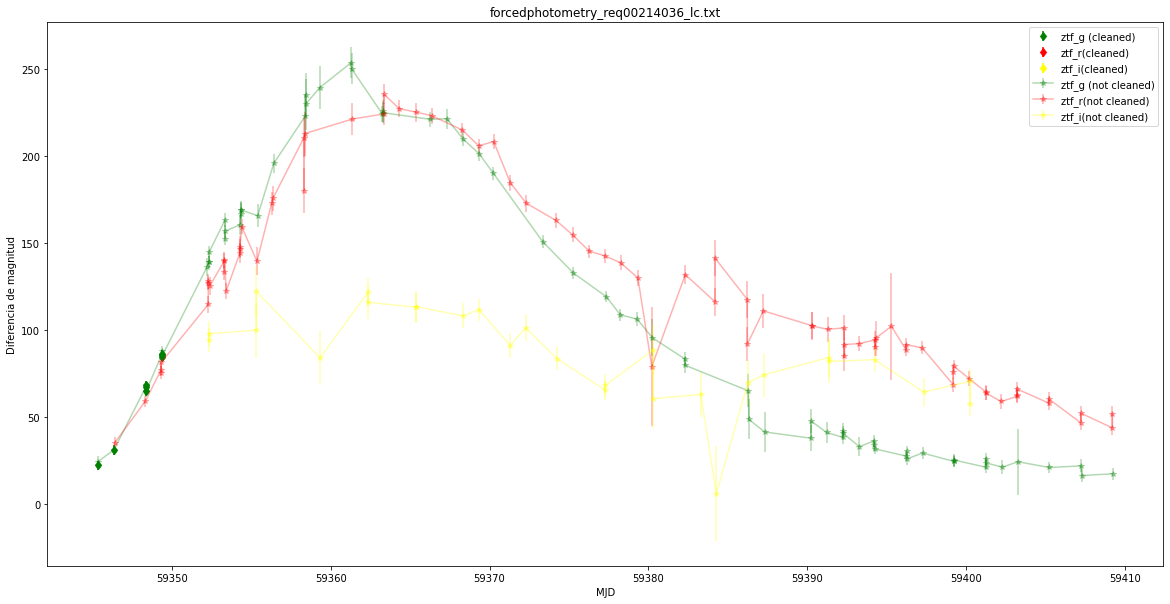

In [40]:
#Definimos algunas funciones para poder graficar
def mag2uJy(mag):
    return 10**((8.9 - mag) / 2.5) * 1e6
def emag2euJy(mag, emag):
    return (mag2uJy(mag - emag) - mag2uJy(mag))
count=0

sys.path.append('lib')
import alerce_ztffp_tools as fp
zp_fil = 'zp_thresholds_quadID.txt'

for LC in archivos:
    plt.figure(figsize=(20,10))
    
    print('dirección:' , 'LCs/' + LC)
    count=count+1
    dir='LCs/'+LC
    ztf=pd.read_csv('LCs/'+LC,sep=' ',comment='#',skipinitialspace=True)
    

    columns = [name.rstrip(',') for name in ztf.columns.values]
    ztf.columns = columns
    ztf.set_index('index', inplace=True)

    # add mjd column
    ztf["mjd"] = ztf.jd - 2400000.5

    lc=ztf.copy(deep=True)

    lc = fp.flag_bad_data(df=lc, path=dir, zp_fil=zp_fil, verbose=True)
    df = fp.clean_data_nanflux_infobits_flagbad(df=lc,infobits=True,nanflux=True,flagbad=False ,verbose=True )
    #Aplicamos máscara a la copia. Así podemos graficar la curva de luz sin limpiar y la limpia.

    mask=(df['procstatus']==0) | (df['procstatus']==56) | (df['procstatus']==57)
    df=df[mask]


    #Columnas para fotometría.
    flux2uJy = 10**((8.9 - df.zpdiff) / 2.5) * 1e6
    df['flux_diff_uJy'] = df.forcediffimflux * flux2uJy
    df['sigma_flux_diff_uJy'] = df.forcediffimfluxunc * flux2uJy
    filtermapping = {"ZTF_g": int(1), "ZTF_r": int(2), "ZTF_i": int(3)}
    df["fid"] = df["filter"].apply(lambda x: filtermapping[x])
    
    
    mask_green=df['fid']==1
    mask_red=df['fid']==2
    mask_infrared=df['fid']==3

    df_g=df[mask_green]
    df_r=df[mask_red]
    df_i=df[mask_infrared]

    
    #Ahora graficamos la curva de luz usando la diferencia de magnitud y su error, además de obviamente los mjd
    print('Graficando supernova número',count)
    #Limpiamos los datos que tienen mucho error
    mask_g=df_g['sigma_flux_diff_uJy']<df_g['sigma_flux_diff_uJy'].std()
    mask_r=df_r['sigma_flux_diff_uJy']<df_r['sigma_flux_diff_uJy'].std()
    mask_i=df_i['sigma_flux_diff_uJy']<df_i['sigma_flux_diff_uJy'].std()

    df_g=df_g[mask_g]
    df_r=df_r[mask_r]
    df_i=df_i[mask_i]


    plt.errorbar(df_g['mjd'],df_g['flux_diff_uJy'],yerr=df_g['sigma_flux_diff_uJy'],fmt='d',color='g',label='ztf_g (cleaned)')
    plt.errorbar(df_r['mjd'],df_r['flux_diff_uJy'],yerr=df_r['sigma_flux_diff_uJy'],fmt='d',color='r',label='ztf_r(cleaned)')
    plt.errorbar(df_i['mjd'],df_i['flux_diff_uJy'],yerr=df_i['sigma_flux_diff_uJy'],fmt='d',color='yellow',label='ztf_i(cleaned)')



    ############################ AHORA HAREMOS ESTO PARA LA CURVA NO FILTRADA, ASÍ VEMOS LAS DIFERENCIAS


    #Columnas para fotometría.
    flux2uJy = 10**((8.9 - ztf.zpdiff) / 2.5) * 1e6
    ztf['flux_diff_uJy'] = ztf.forcediffimflux * flux2uJy
    ztf['sigma_flux_diff_uJy'] = ztf.forcediffimfluxunc * flux2uJy
    filtermapping = {"ZTF_g": int(1), "ZTF_r": int(2), "ZTF_i": int(3)}
    ztf["fid"] = ztf["filter"].apply(lambda x: filtermapping[x])
    
    
    mask_green=ztf['fid']==1
    mask_red=ztf['fid']==2
    mask_infrared=ztf['fid']==3

    ZTF_g=ztf[mask_green]
    ZTF_r=ztf[mask_red]
    ZTF_i=ztf[mask_infrared]
    

    plt.errorbar(ZTF_g['mjd'],ZTF_g['flux_diff_uJy'],yerr=ZTF_g['sigma_flux_diff_uJy'],fmt='-*',color='g',label='ztf_g (not cleaned)',alpha=0.3)
    plt.errorbar(ZTF_r['mjd'],ZTF_r['flux_diff_uJy'],yerr=ZTF_r['sigma_flux_diff_uJy'],fmt='-*',color='r',label='ztf_r(not cleaned)',alpha=0.3)
    plt.errorbar(ZTF_i['mjd'],ZTF_i['flux_diff_uJy'],yerr=ZTF_i['sigma_flux_diff_uJy'],fmt='-*',color='yellow',label='ztf_i(not cleaned)',alpha=0.3)
    plt.xlabel('MJD')
    plt.ylabel('Diferencia de magnitud')
    plt.title(LC)
    plt.legend()
    plt.show()
    


#procstatus 0, 56 o 57 
#ZSDS Advisories & Cautionary notes from ztf DR5 DOCUMENTATION


Comparémosla con la curva de luz usando ALeRCE

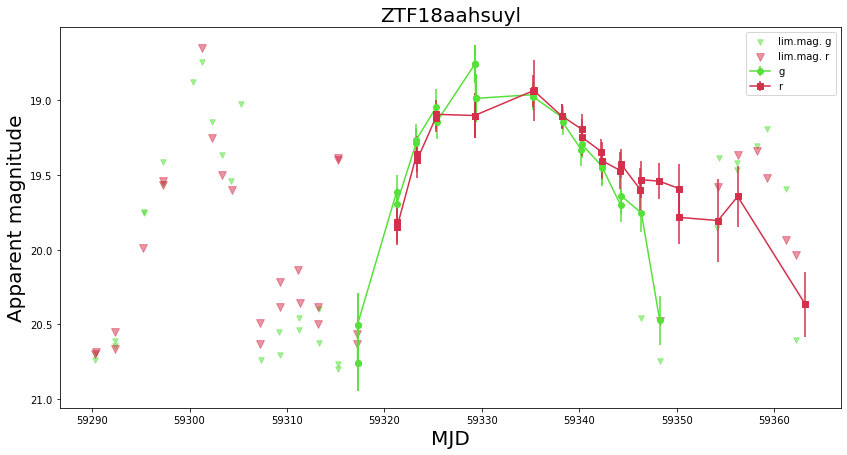

In [41]:
def plotLC(oid, SN_det, SN_nondet):
    
    fig, ax = plt.subplots(figsize = (14, 7))
    labels = {1: 'g', 2: 'r'}
    markers = {1: 'o', 2: 's'}
    sizes = {1: 30, 2: 60}
    
    # loop the passbands
    for fid in [1, 2]:
        
        # plot detections if available
        mask = SN_det.fid == fid
        if np.sum(mask) > 0:
            # note that the detections index is candid and that we are plotting the psf corrected magnitudes
            ax.errorbar(SN_det[mask].mjd, SN_det[mask].magpsf, 
                yerr = SN_det[mask].sigmapsf, c=colors[fid], label=labels[fid], marker=markers[fid])
        
        # plot non detections if available
        mask = (SN_nondet.fid == fid) & (SN_nondet.diffmaglim > -900)
        if np.sum(mask) > 0:     
            # non detections index is mjd
            ax.scatter(SN_nondet[mask].mjd, SN_nondet[mask].diffmaglim, c=colors[fid], alpha = 0.5,
                marker='v', label="lim.mag. %s" % labels[fid], s=sizes[fid])
            
    ax.set_title(oid, fontsize=20)
    ax.set_xlabel("MJD", fontsize=20)
    ax.set_ylabel("Apparent magnitude", fontsize=20)
    ax.legend()
    ax.set_ylim(ax.get_ylim()[::-1])

def getSNdata(oid, doLC=False):

    results = {"oid": oid}
        
    # query detections
    SN_det = client.query_detections(oid, format='pandas')
    SN_det = SN_det.sort_values("mjd")
    results["lc_det"] = SN_det
        
    # query non detections
    SN_nondet = client.query_non_detections(oid, format='pandas')
    SN_nondet = SN_nondet.sort_values("mjd")
    results["lc_nondet"] = SN_nondet
    
    # plot the LC
    if doLC:
        plotLC(oid, SN_det, SN_nondet)
        
    # return data
    return results

results = getSNdata('ZTF18aahsuyl', doLC=True)